In [2]:
# My packages from previous projects
import numpy as np
import pandas as pd
import matplotlib 
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from statsmodels.stats import multitest
import statsmodels.api as sm
import pickle
import time
import pyfaidx
from pyfaidx import Fasta
import random
import math
from math import floor
import scipy.stats as stats
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.api as sm
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from scipy.interpolate import make_interp_spline, BSpline

#Emily's Packages
import keras
from keras import Input
from keras.preprocessing import sequence
from keras.optimizers import Adam, SGD, RMSprop, Adagrad, Nadam
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda, Bidirectional
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, LSTM, ConvLSTM2D, BatchNormalization, AveragePooling1D
from keras.layers import concatenate, Reshape, Add
from keras.regularizers import Regularizer, l1, l2
from keras.activations import sigmoid, tanh
from keras.layers import LeakyReLU, ReLU, PReLU
from sklearn.metrics import auc, precision_recall_curve

from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from keras import backend as K
from keras import ops as O

#Packages from BME395
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from keras.utils import set_random_seed
from keras.losses import MeanSquaredError, mean_squared_error, KLDivergence, Huber, BinaryCrossentropy
from keras.initializers import RandomUniform
from sklearn.utils import class_weight
from sklearn.metrics import roc_curve, roc_auc_score
import logomaker
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [3]:
import argparse, os, re, sys, itertools, logging, random, time, math

In [7]:
population_dfs = pd.read_pickle('population_splits.pkl')

In [8]:
population_dfs['Train']['Positive']

Transcript Gene Name  Chrom Strand Location on Transcript  \
134899  XM_005258465.6  HNRNPUL1  chr19      +                  5 UTR   
134898  XM_011526394.4  HNRNPUL1  chr19      +                   aTIS   
146677     NM_005765.3   ATP6AP2   chrX      +                  5 UTR   
146684     NM_005765.3   ATP6AP2   chrX      +                   aTIS   
146641  XM_017029594.3     POLA1   chrX      +                   aTIS   
...                ...       ...    ...    ...                    ...   
2501       NM_015871.5    ZNF593   chr1      +                   aTIS   
131288     NM_007065.4     CDC37  chr19      -                  5 UTR   
131293     NM_007065.4     CDC37  chr19      -                   aTIS   
130850     NM_025241.3     UBXN6  chr19      -                   aTIS   
131176  XM_005272478.4    HNRNPM  chr19      +                   aTIS   

       Start Codon  Transcript Index  Coordinate     Label  \
134899         ATG              41.0  41268222.0  2.025298   
134898         ATG              23.0  41268227.0  2.787866   
146677         CTG              26.0  40580995.0  3.780357   
146684         ATG              96.0  40581065.0  4.582149   
146641         ATG              44.0  24693961.0  6.745933   
...            ...               ...         ...       ...   
2501           ATG              76.0  26169983.0  4.622481   
131288         CTG              11.0  10403530.0  1.973127   
131293         ATG              63.0  10403478.0  3.475646   
130850         ATG              97.0   4457696.0  5.115516   
131176         ATG              24.0   8444998.0  4.572171   

                                              Genomic idx  \
134899  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
134898  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
146677  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
146684  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
146641  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                   ...   
2501    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
131288  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
131293  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
130850  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
131176  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                                 Sequence  \
134899  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
134898  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
146677  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
146684  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
146641  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                   ...   
2501    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
131288  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
131293  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
130850  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
131176  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                         One Hot Encoding  \
134899  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
134898  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
146677  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
146684  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
146641  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                   ...   
2501    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
131288  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
131293  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
130850  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
131176  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

       Input Sequence Center Codon  Binary Label  
134899                         ATG             1  
134898                         ATG             1  
146677                         CTG    

In [9]:
window_size = 100
print('Sequence_Window: ' + str(window_size))
dfs = ['Train', 'Test', 'Validation']
sets = ['Positive', 'Negative']
model_dfs = dict({'Train': dict({'Positive': [], 'Negative': []}), 'Validation': dict({'Positive': [], 'Negative': []}), 'Test': dict({'Positive': [], 'Negative': []})})
for i in dfs:
    for j in sets:
        ind_df = population_dfs[i][j].copy()
        ind_df['Windowed Encoding'] = ind_df.apply(lambda x: x['One Hot Encoding'][350-int(window_size/2):353+int(window_size/2)], axis=1)
        ind_df['Windowed Seq'] = ind_df.apply(lambda x: x['Sequence'][350-int(window_size/2):353+int(window_size/2)], axis=1)
        model_dfs[i][j] = ind_df

Sequence_Window: 100


In [10]:
negative_test_pop = model_dfs['Test']['Negative']
positive_test_pop = model_dfs['Test']['Positive']
negative_val_pop = model_dfs['Validation']['Negative']
positive_val_pop = model_dfs['Validation']['Positive']
negative_train_pop = model_dfs['Train']['Negative']
positive_train_pop = model_dfs['Train']['Positive']
        
        
X_train_pos = positive_train_pop['Windowed Encoding']
X_test_pos = positive_test_pop['Windowed Encoding']
X_val_pos = positive_val_pop['Windowed Encoding']
y_train_pos = positive_train_pop['Binary Label']
y_test_pos = positive_test_pop['Binary Label']
y_val_pos = positive_val_pop['Binary Label']
train_pos_idx = pd.Series(np.array(positive_train_pop.index))
test_pos_idx = pd.Series(np.array(positive_test_pop.index))
val_pos_idx = pd.Series(np.array(positive_val_pop.index))

train_df = pd.concat([positive_train_pop, negative_train_pop])
test_df = pd.concat([positive_test_pop, negative_test_pop])
val_df = pd.concat([positive_val_pop, negative_val_pop])

In [11]:
positive_train_pop

Transcript Gene Name  Chrom Strand Location on Transcript  \
134899  XM_005258465.6  HNRNPUL1  chr19      +                  5 UTR   
134898  XM_011526394.4  HNRNPUL1  chr19      +                   aTIS   
146677     NM_005765.3   ATP6AP2   chrX      +                  5 UTR   
146684     NM_005765.3   ATP6AP2   chrX      +                   aTIS   
146641  XM_017029594.3     POLA1   chrX      +                   aTIS   
...                ...       ...    ...    ...                    ...   
2501       NM_015871.5    ZNF593   chr1      +                   aTIS   
131288     NM_007065.4     CDC37  chr19      -                  5 UTR   
131293     NM_007065.4     CDC37  chr19      -                   aTIS   
130850     NM_025241.3     UBXN6  chr19      -                   aTIS   
131176  XM_005272478.4    HNRNPM  chr19      +                   aTIS   

       Start Codon  Transcript Index  Coordinate     Label  \
134899         ATG              41.0  41268222.0  2.025298   
134898         ATG              23.0  41268227.0  2.787866   
146677         CTG              26.0  40580995.0  3.780357   
146684         ATG              96.0  40581065.0  4.582149   
146641         ATG              44.0  24693961.0  6.745933   
...            ...               ...         ...       ...   
2501           ATG              76.0  26169983.0  4.622481   
131288         CTG              11.0  10403530.0  1.973127   
131293         ATG              63.0  10403478.0  3.475646   
130850         ATG              97.0   4457696.0  5.115516   
131176         ATG              24.0   8444998.0  4.572171   

                                              Genomic idx  \
134899  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
134898  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
146677  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
146684  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
146641  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                   ...   
2501    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
131288  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
131293  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
130850  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
131176  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                                 Sequence  \
134899  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
134898  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
146677  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
146684  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
146641  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                   ...   
2501    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
131288  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
131293  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
130850  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
131176  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                         One Hot Encoding  \
134899  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
134898  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
146677  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
146684  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
146641  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                   ...   
2501    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
131288  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
131293  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
130850  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
131176  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

       Input Sequence Center Codon  Binary Label  \
134899                         ATG             1   
134898                         ATG             1   
146677                         CTG 

In [12]:
random.seed(42)
set_random_seed(5)
for i in range(5):
    negative_set_train = negative_train_pop.copy().sample(n=len(train_pos_idx), replace=True)
    negative_set_test = negative_test_pop.copy().sample(n=len(test_pos_idx), replace=True)
    negative_set_val = negative_val_pop.copy().sample(n=len(val_pos_idx), replace=True)

    train_df1 = pd.concat([positive_train_pop, negative_set_train], ignore_index=True)
    train_df1 = train_df1.sample(frac=1)
    val_df = pd.concat([positive_val_pop, negative_set_val], ignore_index=True)
    val_df = val_df.sample(frac=1)
    test_df = pd.concat([positive_test_pop, negative_set_test], ignore_index=True)
    test_df = test_df.sample(frac=1)

    train_df = pd.concat([train_df1, val_df])

    X_train = np.array(train_df['Windowed Encoding'].tolist())
    y_train = np.array(train_df['Binary Label'].tolist())#y is unchanged

    X_test = np.array(test_df['Windowed Encoding'].tolist())
    y_test = np.array(test_df['Binary Label'].tolist())

    y_train = y_train.reshape(y_train.shape[0], 1)
    y_test = y_test.reshape(y_test.shape[0], 1)
    
    #Classification Output Only
    window_size=100
    model_input_seq = Input(shape = [window_size+3, 4])

    x = ReLU()(Conv1D(512, 8, padding = 'valid', strides=1, name='seq_conv')(model_input_seq))
    x = MaxPooling1D(pool_size=3, strides=3, name='bin_pool')(x)
    x = Dropout(0.3)(x)
    x = Bidirectional(LSTM(units=16, return_sequences=True, name='bin_lstm'))(x)
    x = Flatten(name = 'conv_flatten')(x)

    bin_x = ReLU()(Dense(512, kernel_initializer = 'glorot_uniform', name='bin_dense0')(x))
    bin_x = Dropout(0.5)(bin_x)
    bin_x = ReLU()(Dense(256, kernel_initializer = 'glorot_uniform', name='bin_dense1')(bin_x))
    bin_x = Dropout(0.5)(bin_x)
    bin_x = ReLU()(Dense(256, kernel_initializer = 'glorot_uniform', name = 'bin_dense2')(bin_x))
    bin_x = Dropout(0.5)(bin_x)
    bin_x = ReLU()(Dense(64, name = 'bin_dense4')(bin_x))
    bin_x = Dense(1, activation = "sigmoid", name = 'class_predictions')(bin_x)

    model_init = Model(inputs = model_input_seq, outputs = bin_x, name='model')

    model_init.compile(optimizer= Nadam(learning_rate = 0.001), loss = BinaryCrossentropy(reduction="sum_over_batch_size", name="binary_crossentropy"))
    model_init.summary()

    early = EarlyStopping(monitor='val_loss', patience=5)
    checkpoint_filepath = 'checkpoints/checkpoint_model.sample_' + str(i)+'.keras'

    model_checkpoint_callback = ModelCheckpoint(filepath = checkpoint_filepath, monitor='val_loss', save_best_only=True, save_freq="epoch")

    csv_logger = CSVLogger(filename = 'model.history.sample_'+str(i)+'.csv', append = True)

    model_init.fit(X_train, y_train, batch_size=32, epochs=15, validation_split=0.1, callbacks=[model_checkpoint_callback, csv_logger])

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 103, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ seq_conv (Conv1D)               │ (None, 96, 512)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 96, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_pool (MaxPooling1D)         │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 32, 32)         │        67,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_flatten (Flatten)          │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense0 (Dense)              │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense1 (Dense)              │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense2 (Dense)              │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense4 (Dense)              │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ class_predictions (Dense)       │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823,041 (3.14 MB)

 Trainable params: 823,041 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.6946 - val_loss: 0.5854
Epoch 2/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.5174 - val_loss: 0.4141
Epoch 3/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3779 - val_loss: 0.3844
Epoch 4/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3397 - val_loss: 0.3898
Epoch 5/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3174 - val_loss: 0.3776
Epoch 6/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2958 - val_loss: 0.3903
Epoch 7/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.2674 - val_loss: 0.3992
Epoch 8/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.2423 - val_loss: 0.4213
Epoch 9/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.2113 - val_loss: 0.4132
Epoch 10/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1846 - val_loss: 0.4572
Epoch 11/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1646 - val_loss: 0.4917
Epoch 12/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 103, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ seq_conv (Conv1D)               │ (None, 96, 512)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 96, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_pool (MaxPooling1D)         │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 32, 32)         │        67,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_flatten (Flatten)          │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense0 (Dense)              │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense1 (Dense)              │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense2 (Dense)              │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense4 (Dense)              │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_9 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ class_predictions (Dense)       │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823,041 (3.14 MB)

 Trainable params: 823,041 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.6939 - val_loss: 0.6302
Epoch 2/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.5434 - val_loss: 0.4105
Epoch 3/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3988 - val_loss: 0.3928
Epoch 4/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3603 - val_loss: 0.3798
Epoch 5/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3368 - val_loss: 0.3711
Epoch 6/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3050 - val_loss: 0.3890
Epoch 7/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.2992 - val_loss: 0.4147
Epoch 8/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.2625 - val_loss: 0.4373
Epoch 9/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.2303 - val_loss: 0.5083
Epoch 10/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1995 - val_loss: 0.5405
Epoch 11/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1696 - val_loss: 0.5429
Epoch 12/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 103, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ seq_conv (Conv1D)               │ (None, 96, 512)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_10 (ReLU)                 │ (None, 96, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_pool (MaxPooling1D)         │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 32, 32)         │        67,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_flatten (Flatten)          │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense0 (Dense)              │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_11 (ReLU)                 │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense1 (Dense)              │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_12 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense2 (Dense)              │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_13 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense4 (Dense)              │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_14 (ReLU)                 │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ class_predictions (Dense)       │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823,041 (3.14 MB)

 Trainable params: 823,041 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.6914 - val_loss: 0.5529
Epoch 2/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.5012 - val_loss: 0.3882
Epoch 3/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.3946 - val_loss: 0.3844
Epoch 4/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3530 - val_loss: 0.3930
Epoch 5/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3310 - val_loss: 0.4117
Epoch 6/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3075 - val_loss: 0.4077
Epoch 7/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.2766 - val_loss: 0.5016
Epoch 8/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.2489 - val_loss: 0.4583
Epoch 9/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.2314 - val_loss: 0.4892
Epoch 10/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1979 - val_loss: 0.5159
Epoch 11/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1817 - val_loss: 0.5790
Epoch 12/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 103, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ seq_conv (Conv1D)               │ (None, 96, 512)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_15 (ReLU)                 │ (None, 96, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_pool (MaxPooling1D)         │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 32, 32)         │        67,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_flatten (Flatten)          │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense0 (Dense)              │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_16 (ReLU)                 │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense1 (Dense)              │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_17 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense2 (Dense)              │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_18 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense4 (Dense)              │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_19 (ReLU)                 │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ class_predictions (Dense)       │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823,041 (3.14 MB)

 Trainable params: 823,041 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.6947 - val_loss: 0.6002
Epoch 2/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.5516 - val_loss: 0.3766
Epoch 3/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.3993 - val_loss: 0.3622
Epoch 4/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3625 - val_loss: 0.3655
Epoch 5/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3351 - val_loss: 0.3659
Epoch 6/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.3130 - val_loss: 0.3865
Epoch 7/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.2844 - val_loss: 0.3882
Epoch 8/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.2451 - val_loss: 0.3974
Epoch 9/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.2258 - val_loss: 0.4406
Epoch 10/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.2003 - val_loss: 0.4594
Epoch 11/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1635 - val_loss: 0.4982
Epoch 12/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 103, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ seq_conv (Conv1D)               │ (None, 96, 512)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_20 (ReLU)                 │ (None, 96, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_pool (MaxPooling1D)         │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 32, 32)         │        67,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_flatten (Flatten)          │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense0 (Dense)              │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_21 (ReLU)                 │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense1 (Dense)              │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_22 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense2 (Dense)              │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_23 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense4 (Dense)              │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_24 (ReLU)                 │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ class_predictions (Dense)       │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823,041 (3.14 MB)

 Trainable params: 823,041 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.6962 - val_loss: 0.6078
Epoch 2/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.5342 - val_loss: 0.4080
Epoch 3/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.4065 - val_loss: 0.3806
Epoch 4/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.3683 - val_loss: 0.3718
Epoch 5/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.3426 - val_loss: 0.3798
Epoch 6/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.3168 - val_loss: 0.3915
Epoch 7/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.2978 - val_loss: 0.3872
Epoch 8/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.2742 - val_loss: 0.3838
Epoch 9/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.2479 - val_loss: 0.4524
Epoch 10/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.2215 - val_loss: 0.5013
Epoch 11/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1830 - val_loss: 0.5812
Epoch 12/15
282/282 ━━━━━━━━━━━━━━━━━━━━ 

In [13]:
positive_train_pop[positive_train_pop['Label'] >= 3.5]

Transcript Gene Name  Chrom Strand Location on Transcript  \
146677     NM_005765.3   ATP6AP2   chrX      +                  5 UTR   
146684     NM_005765.3   ATP6AP2   chrX      +                   aTIS   
146641  XM_017029594.3     POLA1   chrX      +                   aTIS   
101563  NM_001400929.1    PARPBP  chr12      +                   aTIS   
46991      NM_004640.7    DDX39B   chr6      -                   aTIS   
...                ...       ...    ...    ...                    ...   
128731     NM_033546.4    MYL12B  chr18      +                  5 UTR   
128783  NM_001144945.1    MYL12B  chr18      +                   aTIS   
2501       NM_015871.5    ZNF593   chr1      +                   aTIS   
130850     NM_025241.3     UBXN6  chr19      -                   aTIS   
131176  XM_005272478.4    HNRNPM  chr19      +                   aTIS   

       Start Codon  Transcript Index   Coordinate     Label  \
146677         CTG              26.0   40580995.0  3.780357   
146684         ATG              96.0   40581065.0  4.582149   
146641         ATG              44.0   24693961.0  6.745933   
101563         ATG             107.0  102123888.0  4.696980   
46991          ATG             186.0   31540531.0  4.204956   
...            ...               ...          ...       ...   
128731         GTG              61.0    3262193.0  4.287250   
128783         ATG              81.0    3272898.0  5.196209   
2501           ATG              76.0   26169983.0  4.622481   
130850         ATG              97.0    4457696.0  5.115516   
131176         ATG              24.0    8444998.0  4.572171   

                                              Genomic idx  \
146677  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
146684  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
146641  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
101563  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
46991   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                   ...   
128731  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
128783  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2501    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
130850  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
131176  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                                 Sequence  \
146677  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
146684  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
146641  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
101563  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
46991   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                   ...   
128731  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
128783  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
2501    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
130850  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
131176  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                         One Hot Encoding  \
146677  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
146684  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
146641  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
101563  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
46991   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                   ...   
128731  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
128783  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
2501    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
130850  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
131176  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

       Input Sequence Center Codon  Binary Label  \
146677                         CTG             1   
146684                         ATG             1   
146641                 

In [ ]:
representative_df = pd.read_pickle('/projects/b1080/jc/riborf_tracks/codes/GTI_transcript_level_start_codon_reads_1_24.pkl')
#sc_df = pd.read_pickle('GTI_both_strands_start_codon_reads_1_24.pkl')

In [14]:
random.seed(42)
set_random_seed(5)
negative_set_train = negative_train_pop.copy().sample(n=len(train_pos_idx), replace=True)
negative_set_test = negative_test_pop.copy().sample(n=len(test_pos_idx), replace=True)
negative_set_val = negative_val_pop.copy().sample(n=len(val_pos_idx), replace=True)

train_df1 = pd.concat([positive_train_pop, negative_set_train], ignore_index=True)
train_df1 = train_df1.sample(frac=1)
val_df = pd.concat([positive_val_pop, negative_set_val], ignore_index=True)
val_df = val_df.sample(frac=1)
test_df = pd.concat([positive_test_pop, negative_set_test], ignore_index=True)
test_df = test_df.sample(frac=1)

train_df = pd.concat([train_df1, val_df])

X_train = np.array(train_df['Windowed Encoding'].tolist())
y_train = np.array(train_df['Binary Label'].tolist())#y is unchanged

X_test = np.array(test_df['Windowed Encoding'].tolist())
y_test = np.array(test_df['Binary Label'].tolist())

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

In [15]:
for i in range(5):
    mod = load_model('checkpoints/checkpoint_model.sample_' + str(i)+'.keras')
    pred = mod.predict(X_test)
    test_df['pred '+str(i)] = pred

test_df['pred'] = test_df.apply(lambda x: np.mean([x['pred 0'], x['pred 1'], x['pred 2'], x['pred 3'], x['pred 4']]), axis=1)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [20]:
fpr3, tpr3, roc_thresholds1 = roc_curve(test_df['Binary Label'].tolist(), test_df['pred'].tolist())
plt.close()
fig, ax = plt.subplots(nrows=1, ncols=1)  # create figure & 1 axis
ax.plot(fpr3, tpr3, label = 'Test AUROC: '+str(round(auc(fpr3, tpr3), 3)), color='black')
plt.title('Receiver-Operator Characteristic Curve: Strongest Putative Initiation Sites')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

<IPython.core.display.Javascript object>

# Model 2 trained with random sequences

In [3]:
population_dfs = pd.read_pickle('/projects/b1080/jc/rna_translation_initiation_dl_model/11_4_pipeline_for_grant/population_splits.pkl')

In [4]:
window_size = 100
print('Sequence_Window: ' + str(window_size))
dfs = ['Train', 'Test', 'Validation']
sets = ['Positive', 'Negative']
model_dfs = dict({'Train': dict({'Positive': [], 'Negative': []}), 'Validation': dict({'Positive': [], 'Negative': []}), 'Test': dict({'Positive': [], 'Negative': []})})
for i in dfs:
    for j in sets:
        ind_df = population_dfs[i][j].copy()
        ind_df['Windowed Encoding'] = ind_df.apply(lambda x: x['One Hot Encoding'][350-int(window_size/2):353+int(window_size/2)], axis=1)
        ind_df['Windowed Seq'] = ind_df.apply(lambda x: x['Sequence'][350-int(window_size/2):353+int(window_size/2)], axis=1)
        model_dfs[i][j] = ind_df

Sequence_Window: 100


In [5]:
negative_test_pop = model_dfs['Test']['Negative']
positive_test_pop = model_dfs['Test']['Positive']
negative_val_pop = model_dfs['Validation']['Negative']
positive_val_pop = model_dfs['Validation']['Positive']
negative_train_pop = model_dfs['Train']['Negative']
positive_train_pop = model_dfs['Train']['Positive']
        
        
X_train_pos = positive_train_pop['Windowed Encoding']
X_test_pos = positive_test_pop['Windowed Encoding']
X_val_pos = positive_val_pop['Windowed Encoding']
y_train_pos = positive_train_pop['Binary Label']
y_test_pos = positive_test_pop['Binary Label']
y_val_pos = positive_val_pop['Binary Label']
train_pos_idx = pd.Series(np.array(positive_train_pop.index))
test_pos_idx = pd.Series(np.array(positive_test_pop.index))
val_pos_idx = pd.Series(np.array(positive_val_pop.index))

#train_df = pd.concat([positive_train_pop, negative_train_pop])
#test_df = pd.concat([positive_test_pop, negative_test_pop])
#val_df = pd.concat([positive_val_pop, negative_val_pop])

In [6]:
train_df

Transcript Gene Name  Chrom Strand Location on Transcript  \
134899  XM_005258465.6  HNRNPUL1  chr19      +                  5 UTR   
134898  XM_011526394.4  HNRNPUL1  chr19      +                   aTIS   
146677     NM_005765.3   ATP6AP2   chrX      +                  5 UTR   
146684     NM_005765.3   ATP6AP2   chrX      +                   aTIS   
146641  XM_017029594.3     POLA1   chrX      +                   aTIS   
...                ...       ...    ...    ...                    ...   
130847     NM_025241.3     UBXN6  chr19      -                  5 UTR   
130848     NM_025241.3     UBXN6  chr19      -                  5 UTR   
130849     NM_025241.3     UBXN6  chr19      -                  5 UTR   
131184  XM_017026824.2    HNRNPM  chr19      +                  5 UTR   
131186  XM_005272480.3    HNRNPM  chr19      +                  5 UTR   

       Start Codon  Transcript Index  Coordinate     Label  \
134899         ATG              41.0  41268222.0  2.025298   
134898         ATG              23.0  41268227.0  2.787866   
146677         CTG              26.0  40580995.0  3.780357   
146684         ATG              96.0  40581065.0  4.582149   
146641         ATG              44.0  24693961.0  6.745933   
...            ...               ...         ...       ...   
130847         GTG              11.0   4457782.0 -5.000000   
130848         GTG              50.0   4457743.0 -5.000000   
130849         ATT               0.0   4457793.0 -5.000000   
131184         ACG              13.0   8444987.0 -5.000000   
131186         AAG               5.0   8444979.0 -5.000000   

                                              Genomic idx  \
134899  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
134898  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
146677  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
146684  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
146641  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                   ...   
130847  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
130848  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
130849  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
131184  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
131186  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                                 Sequence  \
134899  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
134898  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
146677  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
146684  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
146641  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                   ...   
130847  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
130848  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
130849  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
131184  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
131186  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                         One Hot Encoding  \
134899  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
134898  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
146677  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
146684  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
146641  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                   ...   
130847  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
130848  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
130849  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
131184  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
131186  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

       Input Sequence Center Codon  Binary Label  \
134899                         ATG             1   
134898                         ATG             1   
146677                         CTG 

In [63]:
random.seed(42)
set_random_seed(5)
for i in range(5):
    negative_set_train = negative_train_pop.copy().sample(n=len(train_pos_idx), replace=True)
    train_rand_df = pd.DataFrame(index=range(len(negative_set_train)), columns=negative_set_train.columns.tolist()).fillna('random')
    seq_dict = {1:'A', 2:'T', 3:'G', 4:'C'}
    nt_dict = {'A':[1, 0, 0, 0], 'T':[0, 1, 0, 0], 'G':[0, 0, 1, 0], 'C':[0, 0, 0, 1], 'N':[0, 0, 0, 0]}
    rand_seq_list = []
    rand_encode_list = []
    for j in range(len(negative_set_train)):
        num_seq = [random.randint(1,4) for _ in range(103)]
        rand_seq = ''.join(seq_dict[x] for x in num_seq)
        rand_encode = [nt_dict[x] for x in rand_seq]
        rand_seq_list.append(rand_seq)
        rand_encode_list.append(rand_encode)
    train_rand_df['Windowed Seq'] = rand_seq_list
    train_rand_df['Windowed Encoding'] = rand_encode_list
    train_rand_df['Start Codon'] = train_rand_df['Windowed Seq'].apply(lambda x: x[50:53])
    train_rand_df['Binary Label'] = 0
    
    
    negative_set_val = negative_val_pop.copy().sample(n=len(val_pos_idx), replace=True)
    val_rand_df = pd.DataFrame(index=range(len(negative_set_val)), columns=negative_set_val.columns.tolist()).fillna('random')
    seq_dict = {1:'A', 2:'T', 3:'G', 4:'C'}
    nt_dict = {'A':[1, 0, 0, 0], 'T':[0, 1, 0, 0], 'G':[0, 0, 1, 0], 'C':[0, 0, 0, 1], 'N':[0, 0, 0, 0]}
    rand_seq_list = []
    rand_encode_list = []
    for j in range(len(negative_set_val)):
        num_seq = [random.randint(1,4) for _ in range(103)]
        rand_seq = ''.join(seq_dict[x] for x in num_seq)
        rand_encode = [nt_dict[x] for x in rand_seq]
        rand_seq_list.append(rand_seq)
        rand_encode_list.append(rand_encode)
    val_rand_df['Windowed Seq'] = rand_seq_list
    val_rand_df['Windowed Encoding'] = rand_encode_list
    val_rand_df['Start Codon'] = val_rand_df['Windowed Seq'].apply(lambda x: x[50:53])
    val_rand_df['Binary Label'] = 0

    train_df1 = pd.concat([positive_train_pop, negative_set_train, train_rand_df], ignore_index=True)
    train_df1 = train_df1.sample(frac=1)
    val_df = pd.concat([positive_val_pop, negative_set_val, val_rand_df], ignore_index=True)
    val_df = val_df.sample(frac=1)

    train_df = pd.concat([train_df1, val_df])

    X_train = np.array(train_df['Windowed Encoding'].tolist())
    y_train = np.array(train_df['Binary Label'].tolist())#y is unchanged

    y_train = y_train.reshape(y_train.shape[0], 1)
    
    #Classification Output Only
    window_size=100
    model_input_seq = Input(shape = [window_size+3, 4])

    x = ReLU()(Conv1D(512, 8, padding = 'valid', strides=1, name='seq_conv')(model_input_seq))
    x = MaxPooling1D(pool_size=3, strides=3, name='bin_pool')(x)
    x = Dropout(0.3)(x)
    x = Bidirectional(LSTM(units=16, return_sequences=True, name='bin_lstm'))(x)
    x = Flatten(name = 'conv_flatten')(x)

    bin_x = ReLU()(Dense(512, kernel_initializer = 'glorot_uniform', name='bin_dense0')(x))
    bin_x = Dropout(0.5)(bin_x)
    bin_x = ReLU()(Dense(256, kernel_initializer = 'glorot_uniform', name='bin_dense1')(bin_x))
    bin_x = Dropout(0.5)(bin_x)
    bin_x = ReLU()(Dense(256, kernel_initializer = 'glorot_uniform', name = 'bin_dense2')(bin_x))
    bin_x = Dropout(0.5)(bin_x)
    bin_x = ReLU()(Dense(64, name = 'bin_dense4')(bin_x))
    bin_x = Dense(1, activation = "sigmoid", name = 'class_predictions')(bin_x)

    model_init = Model(inputs = model_input_seq, outputs = bin_x, name='model')

    model_init.compile(optimizer= Nadam(learning_rate = 0.001), loss = BinaryCrossentropy(reduction="sum_over_batch_size", name="binary_crossentropy"))
    model_init.summary()

    early = EarlyStopping(monitor='val_loss', patience=5)
    checkpoint_filepath = '/projects/b1080/jc/rna_translation_initiation_dl_model/optimized_aim_1_model_1_27/checkpoint_model.sample_' + str(i)+'.keras'

    model_checkpoint_callback = ModelCheckpoint(filepath = checkpoint_filepath, monitor='val_loss', save_best_only=True, save_freq="epoch")

    csv_logger = CSVLogger(filename = '/projects/b1080/jc/rna_translation_initiation_dl_model/optimized_aim_1_model_1_27/model.history.sample_'+str(i)+'.csv', append = True)

    model_init.fit(X_train, y_train, batch_size=32, epochs=15, validation_split=0.1, callbacks=[model_checkpoint_callback, csv_logger])
    

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 103, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ seq_conv (Conv1D)               │ (None, 96, 512)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_10 (ReLU)                 │ (None, 96, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_pool (MaxPooling1D)         │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 32, 32)         │        67,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_flatten (Flatten)          │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense0 (Dense)              │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_11 (ReLU)                 │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense1 (Dense)              │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_12 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense2 (Dense)              │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_13 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense4 (Dense)              │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_14 (ReLU)                 │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ class_predictions (Dense)       │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823,041 (3.14 MB)

 Trainable params: 823,041 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - loss: 0.5552 - val_loss: 0.3224
Epoch 2/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - loss: 0.3031 - val_loss: 0.2770
Epoch 3/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - loss: 0.2756 - val_loss: 0.2834
Epoch 4/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.2488 - val_loss: 0.2885
Epoch 5/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.2346 - val_loss: 0.2657
Epoch 6/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.2119 - val_loss: 0.2968
Epoch 7/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.1963 - val_loss: 0.2827
Epoch 8/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.1736 - val_loss: 0.3976
Epoch 9/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.1483 - val_loss: 0.3538
Epoch 10/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.1264 - val_loss: 0.4128
Epoch 11/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.1082 - val_loss: 0.4115
Epoch 12/15
423/423 ━━━━━━━━━━

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 103, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ seq_conv (Conv1D)               │ (None, 96, 512)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_15 (ReLU)                 │ (None, 96, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_pool (MaxPooling1D)         │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 32, 32)         │        67,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_flatten (Flatten)          │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense0 (Dense)              │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_16 (ReLU)                 │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense1 (Dense)              │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_17 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense2 (Dense)              │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_18 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense4 (Dense)              │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_19 (ReLU)                 │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ class_predictions (Dense)       │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823,041 (3.14 MB)

 Trainable params: 823,041 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 0.5712 - val_loss: 0.3692
Epoch 2/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.3076 - val_loss: 0.2840
Epoch 3/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.2741 - val_loss: 0.2820
Epoch 4/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.2488 - val_loss: 0.2705
Epoch 5/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - loss: 0.2288 - val_loss: 0.2795
Epoch 6/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.2061 - val_loss: 0.3013
Epoch 7/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.1930 - val_loss: 0.2746
Epoch 8/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.1647 - val_loss: 0.3524
Epoch 9/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - loss: 0.1481 - val_loss: 0.3880
Epoch 10/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.1249 - val_loss: 0.3296
Epoch 11/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.1094 - val_loss: 0.4211
Epoch 12/15
423/423 ━━━━━━━━━━

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 103, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ seq_conv (Conv1D)               │ (None, 96, 512)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_20 (ReLU)                 │ (None, 96, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_pool (MaxPooling1D)         │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 32, 32)         │        67,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_flatten (Flatten)          │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense0 (Dense)              │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_21 (ReLU)                 │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense1 (Dense)              │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_22 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense2 (Dense)              │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_23 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense4 (Dense)              │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_24 (ReLU)                 │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ class_predictions (Dense)       │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823,041 (3.14 MB)

 Trainable params: 823,041 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 0.5788 - val_loss: 0.3177
Epoch 2/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.3186 - val_loss: 0.2921
Epoch 3/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.2815 - val_loss: 0.2857
Epoch 4/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - loss: 0.2594 - val_loss: 0.2797
Epoch 5/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.2401 - val_loss: 0.2921
Epoch 6/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.2232 - val_loss: 0.2917
Epoch 7/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.2062 - val_loss: 0.3822
Epoch 8/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.1880 - val_loss: 0.3513
Epoch 9/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - loss: 0.1579 - val_loss: 0.3164
Epoch 10/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - loss: 0.1405 - val_loss: 0.4474
Epoch 11/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - loss: 0.1262 - val_loss: 0.3967
Epoch 12/15
423/423 ━━━━━━━━━━

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 103, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ seq_conv (Conv1D)               │ (None, 96, 512)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_25 (ReLU)                 │ (None, 96, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_pool (MaxPooling1D)         │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 32, 32)         │        67,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_flatten (Flatten)          │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense0 (Dense)              │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_26 (ReLU)                 │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense1 (Dense)              │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_27 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense2 (Dense)              │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_28 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense4 (Dense)              │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_29 (ReLU)                 │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ class_predictions (Dense)       │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823,041 (3.14 MB)

 Trainable params: 823,041 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - loss: 0.5728 - val_loss: 0.2903
Epoch 2/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.3236 - val_loss: 0.2674
Epoch 3/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.2799 - val_loss: 0.2636
Epoch 4/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.2549 - val_loss: 0.2600
Epoch 5/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - loss: 0.2382 - val_loss: 0.2689
Epoch 6/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - loss: 0.2119 - val_loss: 0.2752
Epoch 7/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - loss: 0.1933 - val_loss: 0.2768
Epoch 8/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.1643 - val_loss: 0.3049
Epoch 9/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.1445 - val_loss: 0.3735
Epoch 10/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.1265 - val_loss: 0.4316
Epoch 11/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.1094 - val_loss: 0.3826
Epoch 12/15
423/423 ━━━━━━━━━━

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 103, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ seq_conv (Conv1D)               │ (None, 96, 512)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_30 (ReLU)                 │ (None, 96, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_pool (MaxPooling1D)         │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 32, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 32, 32)         │        67,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_flatten (Flatten)          │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense0 (Dense)              │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_31 (ReLU)                 │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense1 (Dense)              │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_32 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense2 (Dense)              │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_33 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bin_dense4 (Dense)              │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_34 (ReLU)                 │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ class_predictions (Dense)       │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823,041 (3.14 MB)

 Trainable params: 823,041 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 0.5785 - val_loss: 0.3027
Epoch 2/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - loss: 0.3124 - val_loss: 0.2897
Epoch 3/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.2740 - val_loss: 0.2815
Epoch 4/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.2471 - val_loss: 0.2838
Epoch 5/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.2326 - val_loss: 0.2905
Epoch 6/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - loss: 0.2063 - val_loss: 0.3213
Epoch 7/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - loss: 0.1887 - val_loss: 0.2946
Epoch 8/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - loss: 0.1712 - val_loss: 0.3564
Epoch 9/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - loss: 0.1407 - val_loss: 0.3755
Epoch 10/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.1344 - val_loss: 0.4353
Epoch 11/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.1207 - val_loss: 0.4453
Epoch 12/15
423/423 ━━━━━━━━━━

In [33]:
rand_df = pd.DataFrame(index=range(len(negative_set_train)), columns=negative_set_train.columns.tolist()).fillna('random')
seq_dict = {1:'A', 2:'T', 3:'G', 4:'C'}
nt_dict = {'A':[1, 0, 0, 0], 'T':[0, 1, 0, 0], 'G':[0, 0, 1, 0], 'C':[0, 0, 0, 1], 'N':[0, 0, 0, 0]}
rand_seq_list = []
rand_encode_list = []
for j in range(len(negative_set_train)):
    num_seq = [random.randint(1,4) for _ in range(103)]
    rand_seq = ''.join(seq_dict[x] for x in num_seq)
    rand_encode = [nt_dict[x] for x in rand_seq]
    rand_seq_list.append(rand_seq)
    rand_encode_list.append(rand_encode)
rand_df['Windowed Seq'] = rand_seq_list
rand_df['Windowed Encoding'] = rand_encode_list
rand_df['Start Codon'] = rand_df['Windowed Seq'].apply(lambda x: x[50:53])

In [57]:
y_train

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [62]:
train_df['Windowed Encoding'].apply(len).value_counts()

Windowed Encoding
103    15012
Name: count, dtype: int64

In [6]:
random.seed(42)
set_random_seed(5)

negative_set_test = negative_test_pop.copy().sample(n=len(test_pos_idx), replace=True)
test_rand_df = pd.DataFrame(index=range(len(negative_set_test)), columns=negative_set_test.columns.tolist()).fillna('random')
seq_dict = {1:'A', 2:'T', 3:'G', 4:'C'}
nt_dict = {'A':[1, 0, 0, 0], 'T':[0, 1, 0, 0], 'G':[0, 0, 1, 0], 'C':[0, 0, 0, 1], 'N':[0, 0, 0, 0]}
rand_seq_list = []
rand_encode_list = []
for j in range(len(negative_set_test)):
    num_seq = [random.randint(1,4) for _ in range(103)]
    rand_seq = ''.join(seq_dict[x] for x in num_seq)
    rand_encode = [nt_dict[x] for x in rand_seq]
    rand_seq_list.append(rand_seq)
    rand_encode_list.append(rand_encode)
test_rand_df['Windowed Seq'] = rand_seq_list
test_rand_df['Windowed Encoding'] = rand_encode_list
test_rand_df['Start Codon'] = test_rand_df['Windowed Seq'].apply(lambda x: x[50:53])
test_rand_df['Binary Label'] = 0
test_rand_df['Label'] = -5
test_df = pd.concat([positive_test_pop, negative_set_test, test_rand_df], ignore_index=True)
test_df = test_df.sample(frac=1)

negative_set_train = negative_train_pop.copy().sample(n=len(train_pos_idx), replace=True)
train_rand_df = pd.DataFrame(index=range(len(negative_set_train)), columns=negative_set_train.columns.tolist()).fillna('random')
seq_dict = {1:'A', 2:'T', 3:'G', 4:'C'}
nt_dict = {'A':[1, 0, 0, 0], 'T':[0, 1, 0, 0], 'G':[0, 0, 1, 0], 'C':[0, 0, 0, 1], 'N':[0, 0, 0, 0]}
rand_seq_list = []
rand_encode_list = []
for j in range(len(negative_set_train)):
    num_seq = [random.randint(1,4) for _ in range(103)]
    rand_seq = ''.join(seq_dict[x] for x in num_seq)
    rand_encode = [nt_dict[x] for x in rand_seq]
    rand_seq_list.append(rand_seq)
    rand_encode_list.append(rand_encode)
train_rand_df['Windowed Seq'] = rand_seq_list
train_rand_df['Windowed Encoding'] = rand_encode_list
train_rand_df['Start Codon'] = train_rand_df['Windowed Seq'].apply(lambda x: x[50:53])
train_rand_df['Binary Label'] = 0
train_rand_df['Label'] = -5
train_df = pd.concat([positive_train_pop, negative_set_train, train_rand_df], ignore_index=True)
train_df = train_df.sample(frac=1)

negative_set_val = negative_val_pop.copy().sample(n=len(val_pos_idx), replace=True)
val_rand_df = pd.DataFrame(index=range(len(negative_set_val)), columns=negative_set_val.columns.tolist()).fillna('random')
seq_dict = {1:'A', 2:'T', 3:'G', 4:'C'}
nt_dict = {'A':[1, 0, 0, 0], 'T':[0, 1, 0, 0], 'G':[0, 0, 1, 0], 'C':[0, 0, 0, 1], 'N':[0, 0, 0, 0]}
rand_seq_list = []
rand_encode_list = []
for j in range(len(negative_set_val)):
    num_seq = [random.randint(1,4) for _ in range(103)]
    rand_seq = ''.join(seq_dict[x] for x in num_seq)
    rand_encode = [nt_dict[x] for x in rand_seq]
    rand_seq_list.append(rand_seq)
    rand_encode_list.append(rand_encode)
val_rand_df['Windowed Seq'] = rand_seq_list
val_rand_df['Windowed Encoding'] = rand_encode_list
val_rand_df['Start Codon'] = val_rand_df['Windowed Seq'].apply(lambda x: x[50:53])
val_rand_df['Binary Label'] = 0
val_rand_df['Label'] = -5
val_df = pd.concat([positive_val_pop, negative_set_val, val_rand_df], ignore_index=True)
val_df = val_df.sample(frac=1)

In [7]:
val_df

Transcript Gene Name   Chrom  Strand Location on Transcript  \
1248          random    random  random  random                 random   
1113          random    random  random  random                 random   
741   NM_001256910.2     DDX21   chr10       +                  5 UTR   
1428          random    random  random  random                 random   
859      NM_001316.4     CSE1L   chr20       +                  5 UTR   
...              ...       ...     ...     ...                    ...   
53    NM_001135699.2     YWHAZ    chr8       -                   aTIS   
313   XM_017012956.3    LYPLA1    chr8       -                   aTIS   
691   XM_011509981.3    MRPL24    chr1       -                  5 UTR   
865   NM_001320582.2    QRICH1    chr3       -                  5 UTR   
1508          random    random  random  random                 random   

     Start Codon Transcript Index   Coordinate     Label  \
1248         CGG           random       random -5.000000   
1113         CCT           random       random -5.000000   
741          CTG            136.0   68959839.0 -5.000000   
1428         AGG           random       random -5.000000   
859          ATT              8.0   49046319.0 -5.000000   
...          ...              ...          ...       ...   
53           ATG            157.0  100948888.0  1.849294   
313          ATG            124.0   54101822.0  2.439712   
691          ATT            198.0  156738723.0 -5.000000   
865          ACG             78.0   49093531.0 -5.000000   
1508         ACA           random       random -5.000000   

                                            Genomic idx  \
1248                                             random   
1113                                             random   
741   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1428                                             random   
859   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
53    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
313   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
691   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
865   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1508                                             random   

                                               Sequence  \
1248                                             random   
1113                                             random   
741   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1428                                             random   
859   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                 ...   
53    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
313   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
691   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
865   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1508                                             random   

                                       One Hot Encoding  \
1248                                             random   
1113                                             random   
741   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1428                                             random   
859   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                 ...   
53    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
313   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
691   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
865   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1508                                             random   

     Input Sequence Center Codon  Binary Label  \
1248                      random             0   
1113                      random             0   
741                          CTG             0   
1428                      random             0   
859                          ATT   

In [7]:
X_test = np.array(test_df['Windowed Encoding'].tolist())
y_test = np.array(test_df['Binary Label'].tolist())

for i in range(5):
    mod = load_model('/projects/b1080/jc/rna_translation_initiation_dl_model/optimized_aim_1_model_1_27/checkpoint_model.sample_' + str(i)+'.keras')
    pred = mod.predict(X_test)
    test_df['pred '+str(i)] = pred

X_train = np.array(train_df['Windowed Encoding'].tolist())
y_train = np.array(train_df['Binary Label'].tolist())

for i in range(5):
    mod = load_model('/projects/b1080/jc/rna_translation_initiation_dl_model/optimized_aim_1_model_1_27/checkpoint_model.sample_' + str(i)+'.keras')
    pred = mod.predict(X_train)
    train_df['pred '+str(i)] = pred

X_val = np.array(val_df['Windowed Encoding'].tolist())
y_val = np.array(val_df['Binary Label'].tolist())

for i in range(5):
    mod = load_model('/projects/b1080/jc/rna_translation_initiation_dl_model/optimized_aim_1_model_1_27/checkpoint_model.sample_' + str(i)+'.keras')
    pred = mod.predict(X_val)
    val_df['pred '+str(i)] = pred

51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [8]:
test_df['pred'] = test_df.apply(lambda x: np.mean([x['pred 0'], x['pred 1'], x['pred 2'], x['pred 3'], x['pred 4']]), axis=1)
train_df['pred'] = train_df.apply(lambda x: np.mean([x['pred 0'], x['pred 1'], x['pred 2'], x['pred 3'], x['pred 4']]), axis=1)
val_df['pred'] = val_df.apply(lambda x: np.mean([x['pred 0'], x['pred 1'], x['pred 2'], x['pred 3'], x['pred 4']]), axis=1)

In [10]:
train_df[(train_df['Transcript'] == 'random')&(train_df['Start Codon'] == 'ATG')]

Transcript Gene Name   Chrom  Strand Location on Transcript Start Codon  \
12011     random    random  random  random                 random         ATG   
10289     random    random  random  random                 random         ATG   
9436      random    random  random  random                 random         ATG   
9350      random    random  random  random                 random         ATG   
11055     random    random  random  random                 random         ATG   
10988     random    random  random  random                 random         ATG   
11452     random    random  random  random                 random         ATG   
11013     random    random  random  random                 random         ATG   
10709     random    random  random  random                 random         ATG   
12243     random    random  random  random                 random         ATG   
9833      random    random  random  random                 random         ATG   
10045     random    random  random  random                 random         ATG   
10354     random    random  random  random                 random         ATG   
13008     random    random  random  random                 random         ATG   
12948     random    random  random  random                 random         ATG   
11196     random    random  random  random                 random         ATG   
11635     random    random  random  random                 random         ATG   
13128     random    random  random  random                 random         ATG   
12000     random    random  random  random                 random         ATG   
12412     random    random  random  random                 random         ATG   
13286     random    random  random  random                 random         ATG   
9163      random    random  random  random                 random         ATG   
13440     random    random  random  random                 random         ATG   
12727     random    random  random  random                 random         ATG   
11312     random    random  random  random                 random         ATG   
11317     random    random  random  random                 random         ATG   
10267     random    random  random  random                 random         ATG   
11863     random    random  random  random                 random         ATG   
13062     random    random  random  random                 random         ATG   
9170      random    random  random  random                 random         ATG   
10419     random    random  random  random                 random         ATG   
12149     random    random  random  random                 random         ATG   
10844     random    random  random  random                 random         ATG   
12218     random    random  random  random                 random         ATG   
12185     random    random  random  random                 random         ATG   
10665     random    random  random  random                 random         ATG   
9791      random    random  random  random                 random         ATG   
13125     random    random  random  random                 random         ATG   
11249     random    random  random  random                 random         ATG   
11441     random    random  random  random                 random         ATG   
11483     random    random  random  random                 random         ATG   
10957     random    random  random  random                 random         ATG   
11341     random    random  random  random                 random         ATG   
11014     random    random  random  random                 random         ATG   
11564     random    random  random  random                 random         ATG   
12327     random    random  random  random                 random         ATG   
13346     random    random  random  random                 random         ATG   
13382     random    random  random  random                 random         ATG   
13139     random    random  random  r

In [15]:
strong_random = test_df[(test_df['Binary Label'] == 1) | (test_df['Transcript'] == 'random')].copy()

<IPython.core.display.Javascript object>


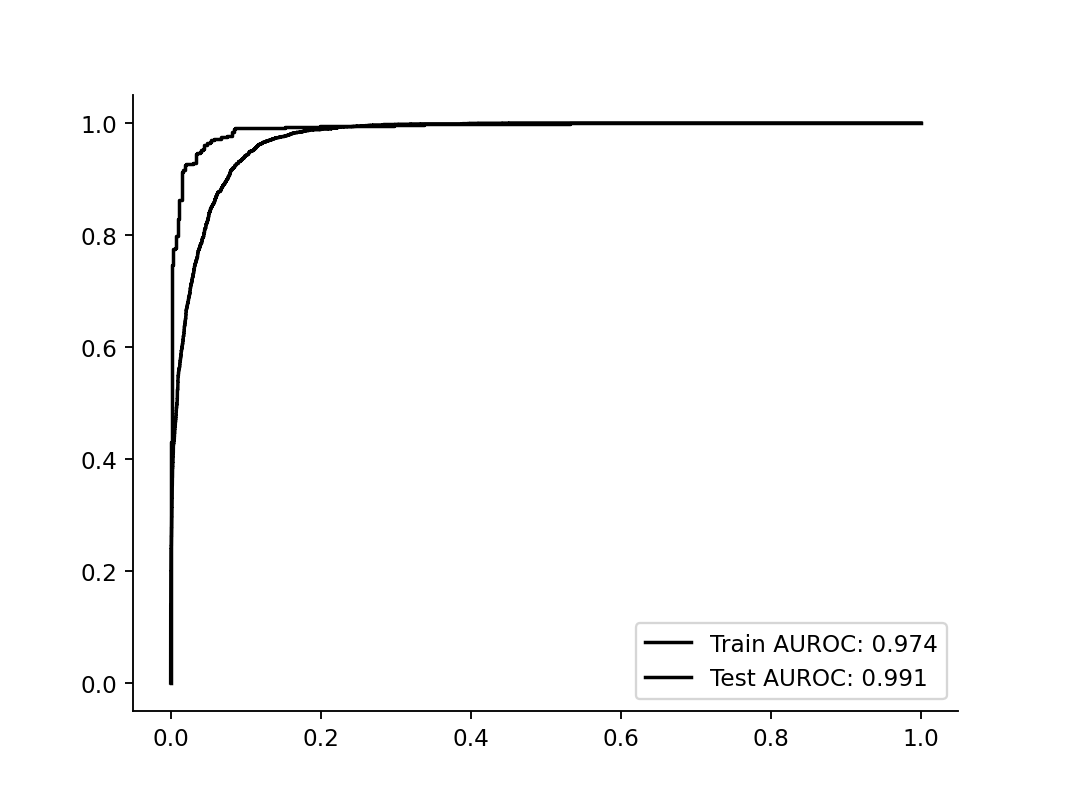

In [18]:
fpr1, tpr1, roc_thresholds1 = roc_curve(train_df['Binary Label'].tolist(), train_df['pred'].tolist())
fpr3, tpr3, roc_thresholds3 = roc_curve(strong_random['Binary Label'].tolist(), strong_random['pred'].tolist())
plt.close()
fig, ax = plt.subplots(nrows=1, ncols=1)  # create figure & 1 axis
ax.plot(fpr1, tpr1, label = 'Train AUROC: '+str(round(auc(fpr1, tpr1), 3)), color='black')
ax.plot(fpr3, tpr3, label = 'Test AUROC: '+str(round(auc(fpr3, tpr3), 3)), color='black')
#plt.title('Receiver-Operator Characteristic Curve: Strongest Putative Initiation Sites')
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


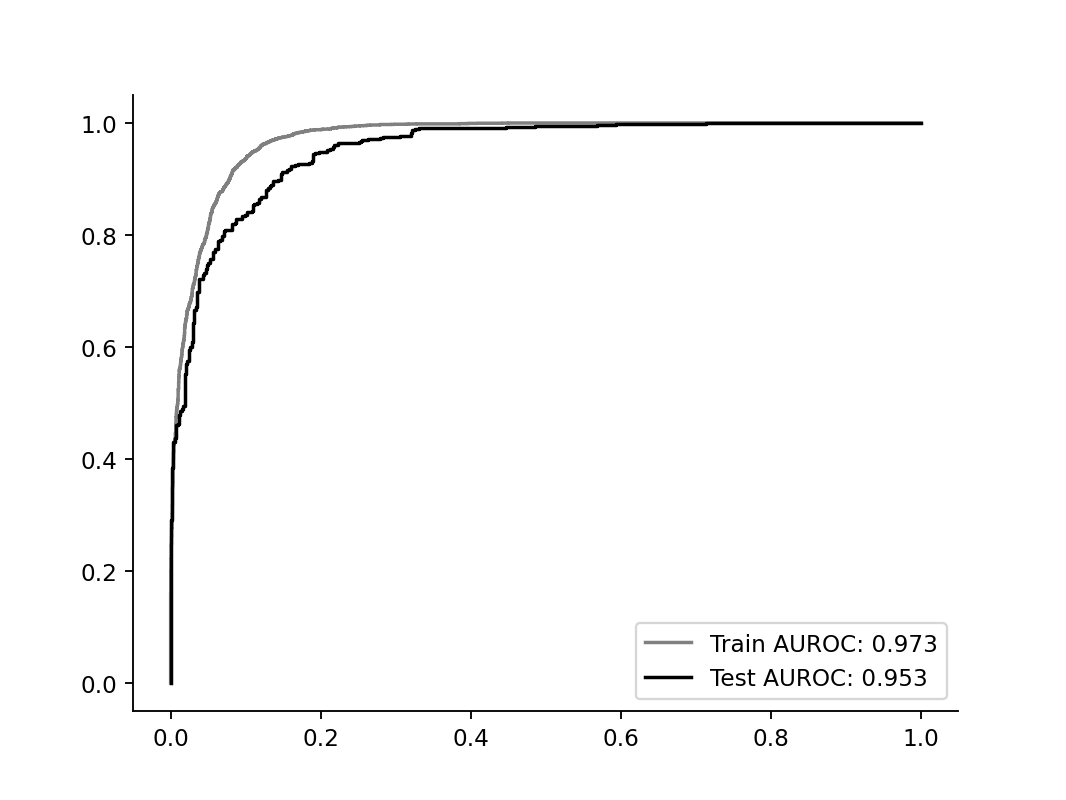

In [28]:
pos_test = test_df[test_df['Binary Label'] == 1].copy()
neg_test =  test_df[test_df['Binary Label'] == 0].copy().sample(n=len(pos_test), replace=False)
test_roc = pd.concat([pos_test, neg_test])

pos_train = train_df[train_df['Binary Label'] == 1].copy()
neg_train =  train_df[train_df['Binary Label'] == 0].copy().sample(n=len(pos_train), replace=False)
train_roc = pd.concat([pos_train, neg_train])


fpr1, tpr1, roc_thresholds1 = roc_curve(train_roc['Binary Label'].tolist(), train_roc['pred'].tolist())
#fpr2, tpr2, roc_thresholds1 = roc_curve(val_df['Binary Label'].tolist(), val_df['pred'].tolist())
fpr3, tpr3, roc_thresholds1 = roc_curve(test_roc['Binary Label'].tolist(), test_roc['pred'].tolist())
plt.close()
fig, ax = plt.subplots(nrows=1, ncols=1)  # create figure & 1 axis
ax.plot(fpr1, tpr1, label = 'Train AUROC: '+str(round(auc(fpr1, tpr1), 3)), color='grey')
#ax.plot(fpr2, tpr2, label = 'Validation AUROC: '+str(round(auc(fpr2, tpr2), 3)), color='black')
ax.plot(fpr3, tpr3, label = 'Test AUROC: '+str(round(auc(fpr3, tpr3), 3)), color='black')
#plt.title('Receiver-Operator Characteristic Curve: Strongest Putative Initiation Sites')
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [10]:
train_roc_list = []
test_roc_list = []
train_prc_list = []
test_prc_list = []
val_roc_list = []
val_prc_list = []
for i in range(10):
    pos_test = test_df[test_df['Binary Label'] == 1].copy().sample(n=200, replace=False)
    neg_test =  test_df[test_df['Binary Label'] == 0].copy().sample(n=200, replace=False)
    test_roc = pd.concat([pos_test, neg_test])

    pos_train = train_df[train_df['Binary Label'] == 1].copy()
    neg_train =  train_df[train_df['Binary Label'] == 0].copy().sample(n=len(pos_train), replace=False)
    train_roc = pd.concat([pos_train, neg_train])
    
    pos_val = val_df[val_df['Binary Label'] == 1].copy().sample(n=200, replace=False)
    neg_val =  val_df[val_df['Binary Label'] == 0].copy().sample(n=200, replace=False)
    val_roc = pd.concat([pos_val, neg_val])
    
    fpr1, tpr1, roc_thresholds1 = roc_curve(train_roc['Binary Label'].tolist(), train_roc['pred'].tolist())
    fpr3, tpr3, roc_thresholds1 = roc_curve(test_roc['Binary Label'].tolist(), test_roc['pred'].tolist())
    fpr2, tpr2, roc_thresholds1 = roc_curve(val_roc['Binary Label'].tolist(), val_roc['pred'].tolist())
    train_roc_list.append(round(auc(fpr1, tpr1), 3))
    test_roc_list.append(round(auc(fpr3, tpr3), 3))
    val_roc_list.append(round(auc(fpr2, tpr2), 3))
    
    prec1, rec1, thresholds1 = precision_recall_curve(train_roc['Binary Label'].tolist(), train_roc['pred'].tolist())
    train_prc_list.append(auc(rec1, prec1))
    
    prec2, rec2, thresholds2 = precision_recall_curve(test_roc['Binary Label'].tolist(), test_roc['pred'].tolist())
    test_prc_list.append(auc(rec2, prec2))
    
    prec3, rec3, thresholds3 = precision_recall_curve(val_roc['Binary Label'].tolist(), val_roc['pred'].tolist())
    val_prc_list.append(auc(rec3, prec3))

<IPython.core.display.Javascript object>


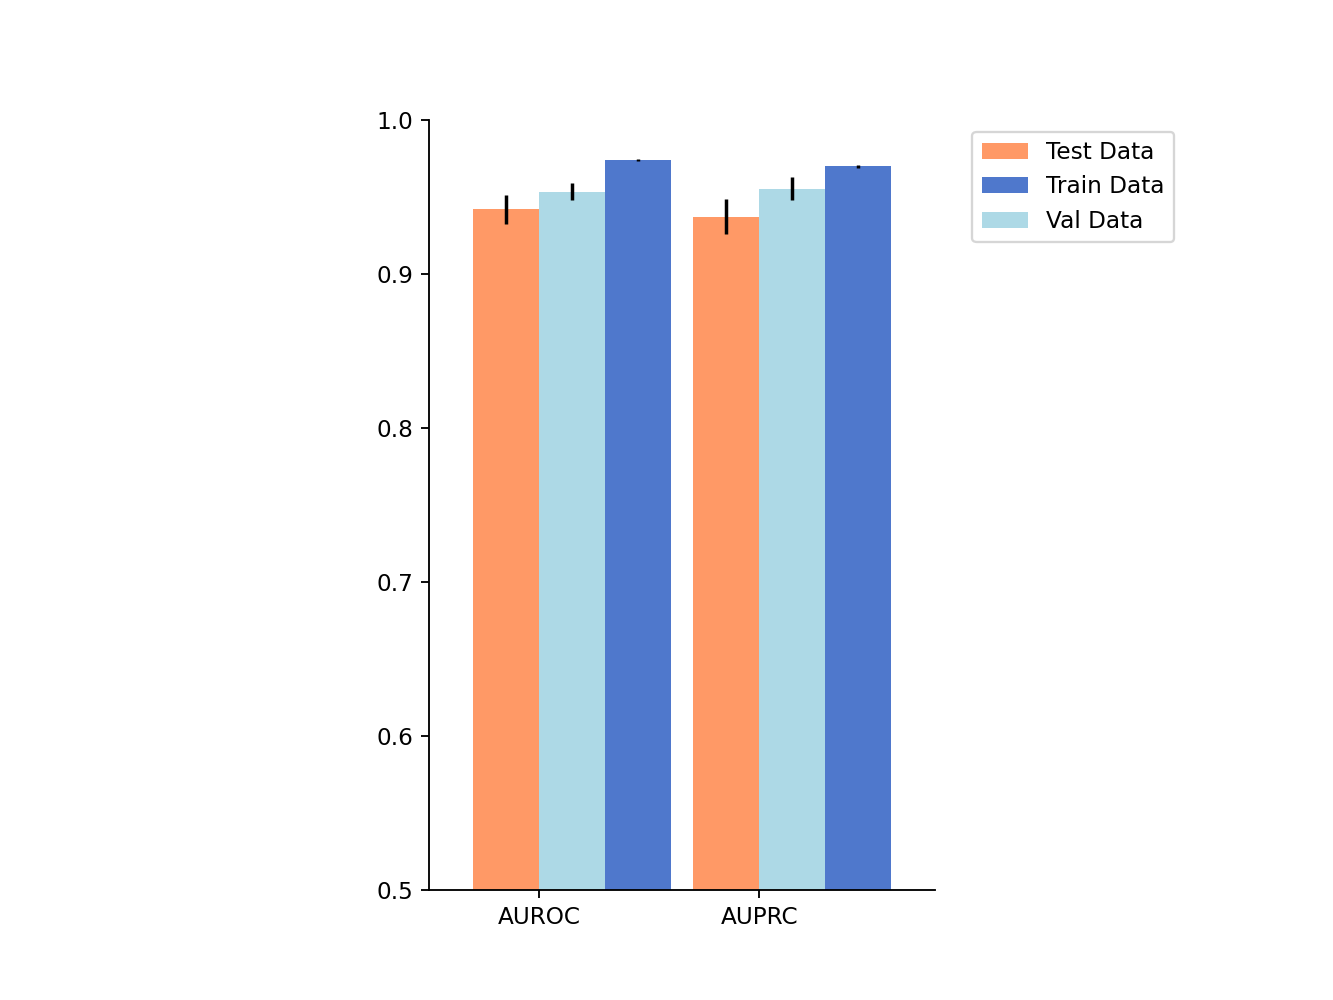

In [28]:
plt.close()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
axs.bar([0.1, 0.2],[np.median(test_roc_list), np.median(test_prc_list)], -0.03 ,align='edge', yerr=[np.std(test_roc_list), np.std(test_prc_list)], color = (1,0.6,0.4), label='Test Data')
axs.bar([0.13, 0.23],[np.median(train_roc_list), np.median(train_prc_list)], 0.03 ,align='edge', yerr=[np.std(train_roc_list), np.std(train_prc_list)], color = (0.31, 0.47, 0.8), label = 'Train Data')
axs.bar([0.1, 0.2],[np.median(val_roc_list), np.median(val_prc_list)], 0.03 ,align='edge', yerr=[np.std(val_roc_list), np.std(val_prc_list)], color = (0.68,0.85,0.9), label = 'Val Data')
axs.set_xticks([0.1, 0.2], labels=['AUROC', 'AUPRC'])
axs.set_ylim(0.5, 1)
axs.set_xlim(0.05, 0.28)
axs.set_aspect(0.7)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
plt.legend()
plt.legend(bbox_to_anchor = (1.05,1))
plt.show()

In [10]:
all_unique_genes = pd.read_pickle('/projects/b1080/jc/rna_translation_initiation_dl_model/refseq_coding_genes_longest_cds.pkl')

<IPython.core.display.Javascript object>


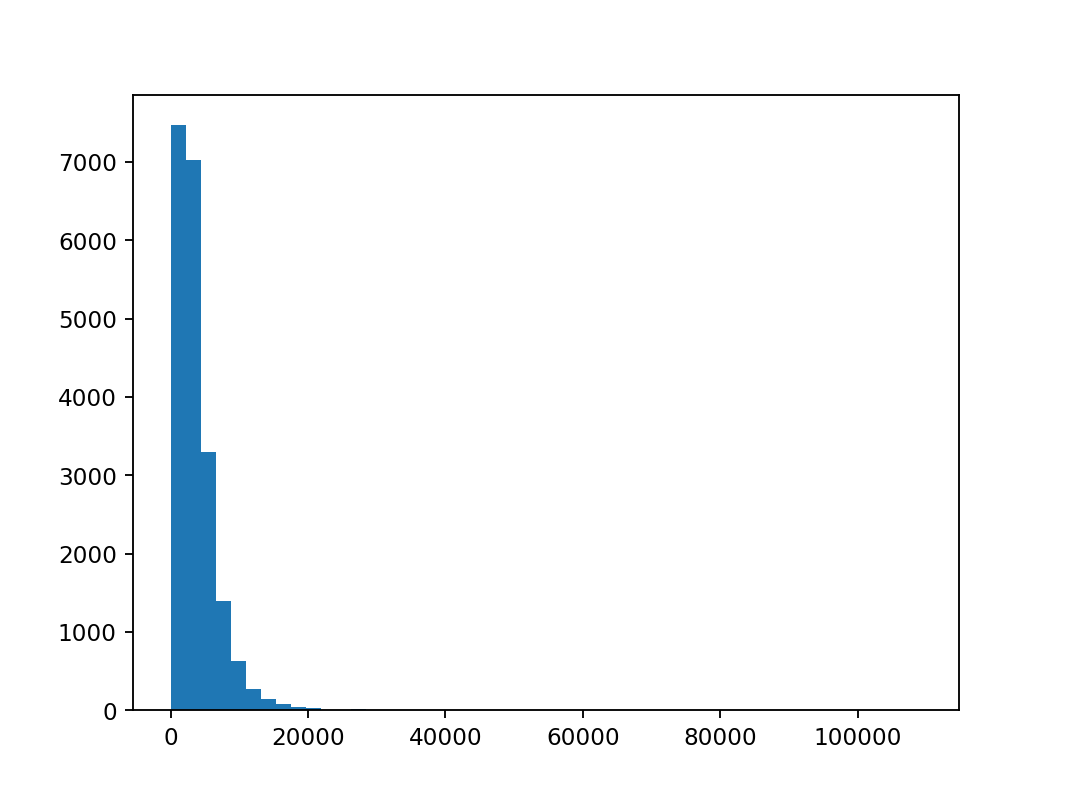

In [11]:
plt.close()
plt.hist(all_unique_genes['Gidx_len'], bins=50)
plt.show()

In [12]:
reas_genes = all_unique_genes[all_unique_genes['Gidx_len'] <= 20000].copy()

In [15]:
pred_df = pd.read_pickle('/projects/b1080/jc/rna_translation_initiation_dl_model/unique_genes_model_predictions_1_27.pkl')

In [ ]:
window_list = []
for i in range(len(reas_genes)):
    gene = reas_genes.iloc[i]
    if gene['Strand'] == '+':
        seq = gene['SeqX']
    elif gene['Strand'] == '-':
        seq = gene['SeqX'][::-1]
    window_seq = 'N'*50 + seq + 'N'*53
    window_list.append(window_seq)
reas_genes['Windowed Seq'] = window_list

def encode(seq):
    nt_dict = {'A':[1, 0, 0, 0], 'T':[0, 1, 0, 0], 'G':[0, 0, 1, 0], 'C':[0, 0, 0, 1], 'N':[0, 0, 0, 0]}
    encode = [nt_dict[i] for i in seq]
    return encode
reas_genes['Windowed Encoding'] = reas_genes['Windowed Seq'].apply(lambda x: encode(x))
reas_genes = reas_genes[~reas_genes['Transcript'].apply(lambda x: 'unassigned' in x)].copy()

In [44]:
gene_txt = pd.DataFrame({'Transcript': reas_genes['Transcript'].tolist(), 'Encoding': reas_genes['Windowed Encoding'].tolist()})

In [46]:
gene_txt.to_csv('/projects/b1080/jc/rna_translation_initiation_dl_model/optimized_aim_1_model_1_27/unique_genes_encoded.txt', sep='\t', index=False)

In [47]:
gene_df = pd.read_csv('/projects/b1080/jc/rna_translation_initiation_dl_model/optimized_aim_1_model_1_27/unique_genes_encoded.txt', sep='\t')

In [54]:
pickle.dump(gene_txt, open('/projects/b1080/jc/rna_translation_initiation_dl_model/optimized_aim_1_model_1_27/unique_genes_encoded.pkl', 'wb'))

In [16]:
pred_df

Transcript                                           Encoding  \
0      NM_001005484.2  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1      XM_047436352.1  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
2      NM_001005221.2  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
3      XM_011542538.1  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
4      XM_024449992.2  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...               ...                                                ...   
19765  NM_001002760.1  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
19766     NM_020364.4  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
19767  NM_001388484.1  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
19768  NM_001002761.1  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
19769     NM_004680.3  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

                                                   pred0  \
0      [3.94537637475878e-05, 8.880266250343993e-05, ...   
1      [0.8483948111534119, 0.09934090077877045, 0.00...   
2      [0.8537972569465637, 0.031268130987882614, 0.0...   
3      [0.8167425990104675, 0.06891214847564697, 0.00...   
4      [8.691199582244735e-07, 0.0008855664636939764,...   
...                                                  ...   
19765  [9.49895111261867e-05, 0.01064234972000122, 7....   
19766  [0.0001110360972234048, 0.0001860319753177464,...   
19767  [0.0001110360972234048, 0.0001860319753177464,...   
19768  [9.49895111261867e-05, 0.01064234972000122, 7....   
19769  [0.0002444277924951166, 0.0027282047085464, 0....   

                                                   pred1  \
0      [0.0006594685255549848, 0.0009592678397893906,...   
1      [0.8039807081222534, 0.1930532306432724, 0.039...   
2      [0.9060269594192505, 0.12654492259025574, 0.18...   
3      [0.6347521543502808, 0.0808955505490303, 0.013...   
4      [6.035025762685109e-06, 0.0017727171070873737,...   
...                                                  ...   
19765  [0.0034421542659401894, 0.0405501164495945, 0....   
19766  [0.00012360926484689116, 0.0002753930166363716...   
19767  [0.00012360926484689116, 0.0002753930166363716...   
19768  [0.0034421542659401894, 0.0405501164495945, 0....   
19769  [0.0014669809024780989, 0.011513499543070793, ...   

                                                   pred2  \
0      [0.0070034898817539215, 0.005795245058834553, ...   
1      [0.8492259383201599, 0.24965202808380127, 0.03...   
2      [0.8971914649009705, 0.4071964919567108, 0.088...   
3      [0.7560796737670898, 0.13825243711471558, 0.01...   
4      [5.713118866879086e-07, 0.0001575074711581692,...   
...                                                  ...   
19765  [0.000879645231179893, 0.05030280724167824, 0....   
19766  [0.0001472932199249044, 0.00036282764631323516...   
19767  [0.0001472932199249044, 0.00036282764631323516...   
19768  [0.000879645231179893, 0.05030280724167824, 0....   
19769  [0.00039934099186211824, 0.00920046679675579, ...   

                                                   pred3  \
0      [0.0005277522723190486, 0.0006067837821319699,...   
1      [0.9163349866867065, 0.24093714356422424, 0.10...   
2      [0.945193886756897, 0.30256590247154236, 0.375...   
3      [0.8438669443130493, 0.20642107725143433, 0.09...   
4      [0.0004034165758639574, 0.015176208689808846, ...   
...                                                  ...   
19765  [0.004870053380727768, 0.2377089411020279, 0.1...   
19766  [0.00027352914912626147, 0.0006657835328951478...   
19767  [0.00027352914912626147, 0.0006657835328951478...   
19768  [0.004870053380727768, 0.2377089411020279, 0.1...   
19769  [0.00024616665905341506, 0.013046478852629662,...   

                                                   pred4  \
0      [0.003955935128033161, 0.005895563866943121, 0...   
1      [0.7581522464752197, 0.26439139246940613, 0.09...   
2      [0.8252390623092651, 0.1719

In [61]:
i = 1
model = load_model('/projects/b1080/jc/rna_translation_initiation_dl_model/optimized_aim_1_model_1_27/checkpoint_model.sample_' + str(i)+'.keras')

In [ ]:
pred_dicts = {k:[] for k in range(5)}
gene_df = pd.read_pickle('/projects/b1080/jc/rna_translation_initiation_dl_model/optimized_aim_1_model_1_27/unique_genes_encoded.pkl')
for g in range(len(gene_df)):
    gene_entry = gene_df.iloc[g].copy()
    for i in range(5):
        model = keras.saving.load_model('/projects/b1080/jc/rna_translation_initiation_dl_model/optimized_aim_1_model_1_27/checkpoint_model.sample_' + str(i)+'.keras')
        def scan_preds(encoded_data):
            true_window = len(encoded_data) - 103
            #print(true_window)
            scanned_list = []
            for i in range(true_window):
                scanned_list.append(encoded_data[i:i+103])
            y_pred = model.predict(np.array(scanned_list), verbose=0)
            return np.concatenate(y_pred).tolist()
        pred_dicts[i].append(scan_preds(gene_entry['Encoding']))
for j in range(5):
    gene_df['pred '+str(j)] = pred_dicts[j]

In [85]:
testit = gene_df.iloc[:5].copy()
testit['pred 1'] = pred_dicts[0]
testit['pred 2'] = pred_dicts[1]

In [86]:
testit

Transcript                                           Encoding  \
0  NM_001005484.2  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1  XM_047436352.1  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
2  NM_001005221.2  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
3  XM_011542538.1  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
4  XM_024449992.2  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

                                              pred 1  \
0  [3.94537637475878e-05, 8.880266250343993e-05, ...   
1  [0.8483948111534119, 0.09934090077877045, 0.00...   
2  [0.8537972569465637, 0.031268130987882614, 0.0...   
3  [0.8167425990104675, 0.06891214847564697, 0.00...   
4  [8.691199582244735e-07, 0.0008855664636939764,...   

                                              pred 2  
0  [0.0006594685255549848, 0.0009592678397893906,...  
1  [0.8039807081222534, 0.1930532306432724, 0.039...  
2  [0.9060269594192505, 0.12654492259025574, 0.18...  
3  [0.6347521543502808, 0.0808955505490303, 0.013...  
4  [6.035025762685109e-06, 0.0017727171070873737,...

In [11]:
#Look at log odds vs initiation statistic

In [16]:
test_df

Transcript Gene Name   Chrom  Strand Location on Transcript  \
368   NM_001280560.2    ANP32E    chr1       -                   aTIS   
935      NM_021203.4     SRPRB    chr3       +                  5 UTR   
477      NM_021019.5      MYL6   chr12       +                   aTIS   
649   XM_017017914.3   HIKESHI   chr11       +                  5 UTR   
86    XM_047417893.1     CNOT8    chr5       +                  5 UTR   
...              ...       ...     ...     ...                    ...   
608   NM_001330692.2     PSMD4    chr1       +                  5 UTR   
1288          random    random  random  random                 random   
1019  NM_001128917.2    TOMM40   chr19       +                  5 UTR   
497      NM_000362.5     TIMP3   chr22       +                   aTIS   
364   NM_001280560.2    ANP32E    chr1       -                  5 UTR   

     Start Codon Transcript Index   Coordinate     Label  \
368          ATG            326.0  150235785.0  3.015396   
935          AGG            250.0  133805803.0      -5.0   
477          ATG             43.0   56158401.0  5.828115   
649          TTG             62.0   86302301.0      -5.0   
86           ATT            343.0  154863218.0  3.091602   
...          ...              ...          ...       ...   
608          TTG              1.0  151254734.0      -5.0   
1288         CTA           random       random    random   
1019         CTG            123.0   44891376.0      -5.0   
497          ATG            297.0   32802001.0   5.09798   
364          TTG            261.0  150235850.0  2.353695   

                                            Genomic idx  \
368   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
935   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
477   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
649   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
86    [1, 1, 1, 1, 1, 1, 1, 154859506, 154859507, 15...   
...                                                 ...   
608   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1288                                             random   
1019  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
497   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
364   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
368   NNNNNNNNNNNNNNNNNNNNNNNNAGTCTCTGAGCAGCCATTGAAG...   
935   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
477   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
649   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
86    NNNNNNNGTCAGAGGATCCTCTTAAACGCTGCTGCTATTTATTTCT...   
...                                                 ...   
608   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1288                                             random   
1019  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
497   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
364   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
368   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
935   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
477   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
649   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
86    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                 ...   
608   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1288                                             random   
1019  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
497   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
364   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
368                          ATG             1   
935                          AGG             0   
477                          ATG             1   
649                          TTG             0   
86                           ATT   

In [ ]:
test_df['log odds'] = test_df['pred'].apply(lambda x: np.log(x/(1-x)))

<IPython.core.display.Javascript object>


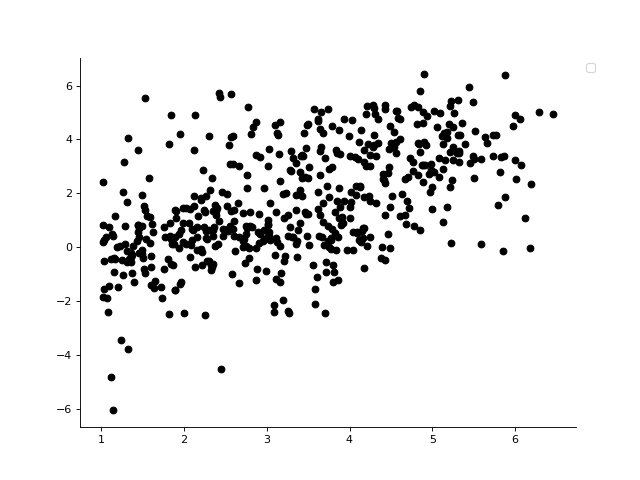

In [31]:
seq_data = test_df[test_df['Label'] > 0].copy()
plt.close()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
plt.scatter(seq_data['Label'], seq_data['log odds'], c='black')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
plt.legend()
plt.legend(bbox_to_anchor = (1.05,1))
plt.show()

In [27]:
np.corrcoef(seq_data['Label'], seq_data['log odds'])

array([[1.        , 0.55075334],
       [0.55075334, 1.        ]])

In [28]:
stats.spearmanr(seq_data['Label'], seq_data['log odds'])

SignificanceResult(statistic=0.555218437150486, pvalue=9.435420914530443e-45)

In [9]:
test_df

Transcript Gene Name   Chrom  Strand Location on Transcript  \
368   NM_001280560.2    ANP32E    chr1       -                   aTIS   
935      NM_021203.4     SRPRB    chr3       +                  5 UTR   
477      NM_021019.5      MYL6   chr12       +                   aTIS   
649   XM_017017914.3   HIKESHI   chr11       +                  5 UTR   
86    XM_047417893.1     CNOT8    chr5       +                  5 UTR   
...              ...       ...     ...     ...                    ...   
608   NM_001330692.2     PSMD4    chr1       +                  5 UTR   
1288          random    random  random  random                 random   
1019  NM_001128917.2    TOMM40   chr19       +                  5 UTR   
497      NM_000362.5     TIMP3   chr22       +                   aTIS   
364   NM_001280560.2    ANP32E    chr1       -                  5 UTR   

     Start Codon Transcript Index   Coordinate     Label  \
368          ATG            326.0  150235785.0  3.015396   
935          AGG            250.0  133805803.0 -5.000000   
477          ATG             43.0   56158401.0  5.828115   
649          TTG             62.0   86302301.0 -5.000000   
86           ATT            343.0  154863218.0  3.091602   
...          ...              ...          ...       ...   
608          TTG              1.0  151254734.0 -5.000000   
1288         CTA           random       random -5.000000   
1019         CTG            123.0   44891376.0 -5.000000   
497          ATG            297.0   32802001.0  5.097980   
364          TTG            261.0  150235850.0  2.353695   

                                            Genomic idx  \
368   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
935   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
477   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
649   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
86    [1, 1, 1, 1, 1, 1, 1, 154859506, 154859507, 15...   
...                                                 ...   
608   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1288                                             random   
1019  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
497   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
364   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
368   NNNNNNNNNNNNNNNNNNNNNNNNAGTCTCTGAGCAGCCATTGAAG...   
935   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
477   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
649   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
86    NNNNNNNGTCAGAGGATCCTCTTAAACGCTGCTGCTATTTATTTCT...   
...                                                 ...   
608   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1288                                             random   
1019  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
497   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
364   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
368   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
935   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
477   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
649   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
86    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                 ...   
608   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1288                                             random   
1019  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
497   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
364   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
368                          ATG             1   
935                          AGG             0   
477                          ATG             1   
649                          TTG             0   
86                           ATT   

In [17]:
dataset = pd.concat([train_df, val_df, test_df], axis=0)

In [18]:
len(violin_df['Gene Name'].unique())

NameError: name 'violin_df' is not defined

<IPython.core.display.Javascript object>


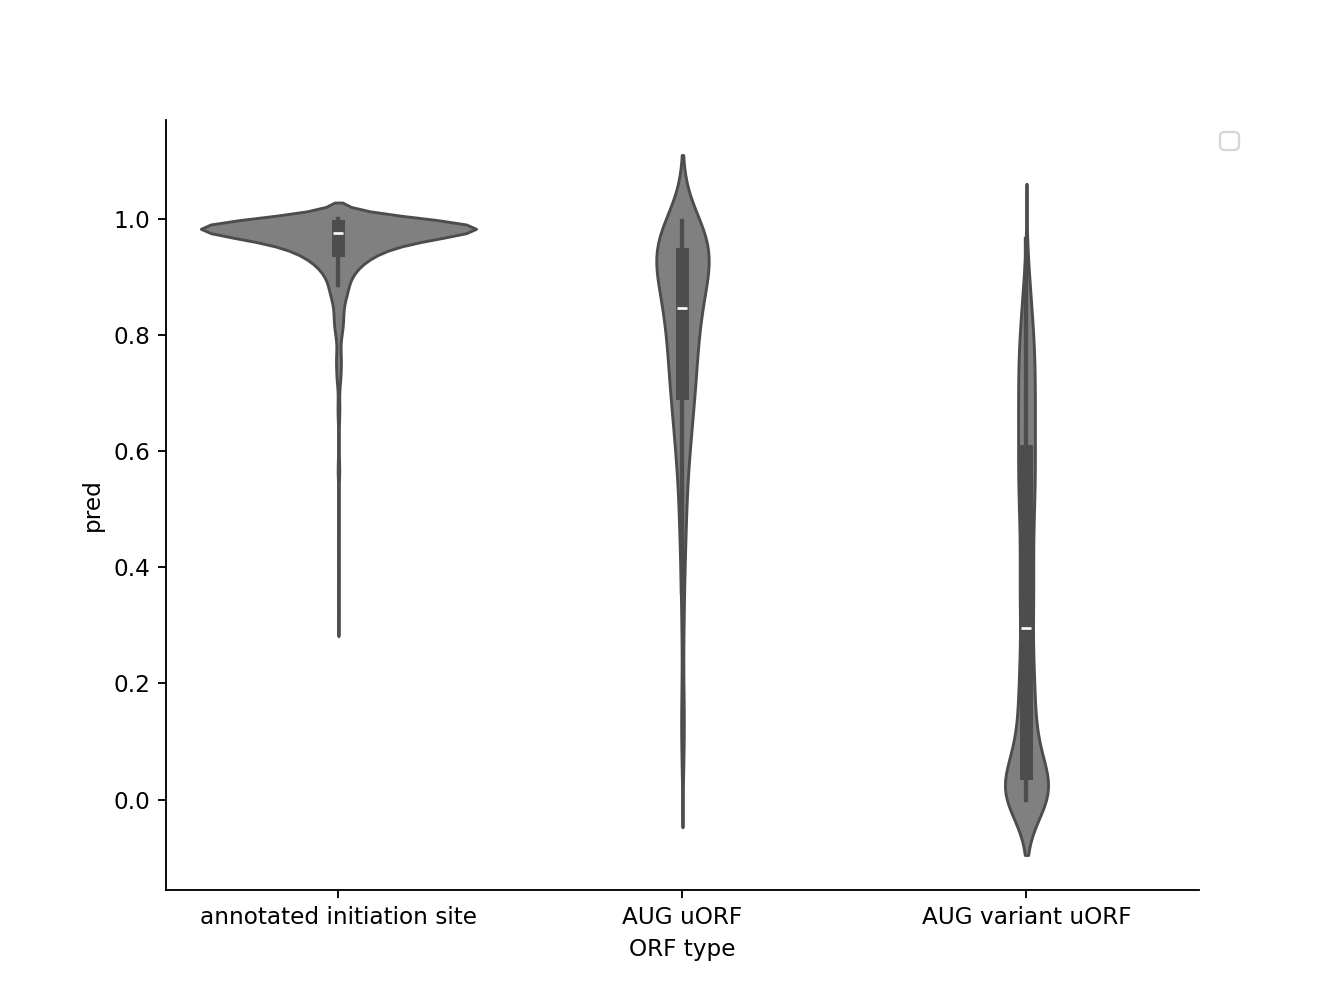

In [19]:
violin_df = dataset[dataset['Location on Transcript'] != 'random'].copy()
def define_orf(df):
    if df['Location on Transcript'] == 'aTIS':
        orf = 'annotated initiation site'
    elif df['Location on Transcript'] == '5 UTR':
        if df['Start Codon'] == 'ATG':
            orf = 'AUG uORF'
        else:
            orf = 'AUG variant uORF'
    return orf

violin_df['ORF type'] = violin_df.apply(lambda x: define_orf(x[['Location on Transcript', 'Start Codon']]), axis=1)

plt.close()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
sns.violinplot(data=violin_df, x="ORF type", y="pred", order = ['annotated initiation site', 'AUG uORF', 'AUG variant uORF'], color='grey')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
plt.legend()
plt.legend(bbox_to_anchor = (1.05,1))
plt.show()

In [26]:
violin_df[(violin_df['Location on Transcript'] == '5 UTR') & (violin_df['Start Codon'] == 'ATG')]

Transcript Gene Name  Chrom Strand Location on Transcript  \
7995  NM_001178032.3     ZC4H2   chrX      -                  5 UTR   
6892  NM_001290310.3    CTNNA1   chr5      +                  5 UTR   
64    XM_047422648.1      SMC2   chr9      +                  5 UTR   
2636     NM_000791.4      DHFR   chr5      -                  5 UTR   
7046  NM_001289745.3     GAPDH  chr12      +                  5 UTR   
...              ...       ...    ...    ...                    ...   
1063  NM_001194954.2     MATR3   chr5      +                  5 UTR   
31    XM_011517528.4      RBIS   chr8      -                  5 UTR   
493   NM_001330211.2     MED24  chr17      -                  5 UTR   
409   NM_001381866.2      RCC1   chr1      +                  5 UTR   
200   NM_001363537.2      CCNC   chr6      -                  5 UTR   

     Start Codon Transcript Index   Coordinate     Label  \
7995         ATG            208.0   64922147.0 -5.000000   
6892         ATG            101.0  138781937.0 -5.000000   
64           ATG             60.0  104094368.0  5.772920   
2636         ATG             20.0   80654962.0  1.922845   
7046         ATG            124.0    6534640.0 -5.000000   
...          ...              ...          ...       ...   
1063         ATG             91.0  139279050.0 -5.000000   
31           ATG             20.0   85220353.0  1.515715   
493          ATG             13.0   40054394.0  1.819402   
409          ATG            151.0   28516728.0  2.609510   
200          ATG             72.0   99568587.0  1.900952   

                                            Genomic idx  \
7995  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
6892  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
64    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2636  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
7046  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
1063  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
31    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
493   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
409   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
200   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
7995  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
6892  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
64    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
2636  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
7046  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                 ...   
1063  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
31    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
493   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
409   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
200   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
7995  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
6892  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
64    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
2636  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
7046  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                 ...   
1063  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
31    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
493   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
409   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
200   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
7995                         ATG             0   
6892                         ATG             0   
64                           ATG             1   
2636                         ATG             1   
7046                         ATG             0   
...      

In [20]:
violin_df['log odds'] = violin_df['pred'].apply(lambda x: np.log(x/(1-x)))

<IPython.core.display.Javascript object>


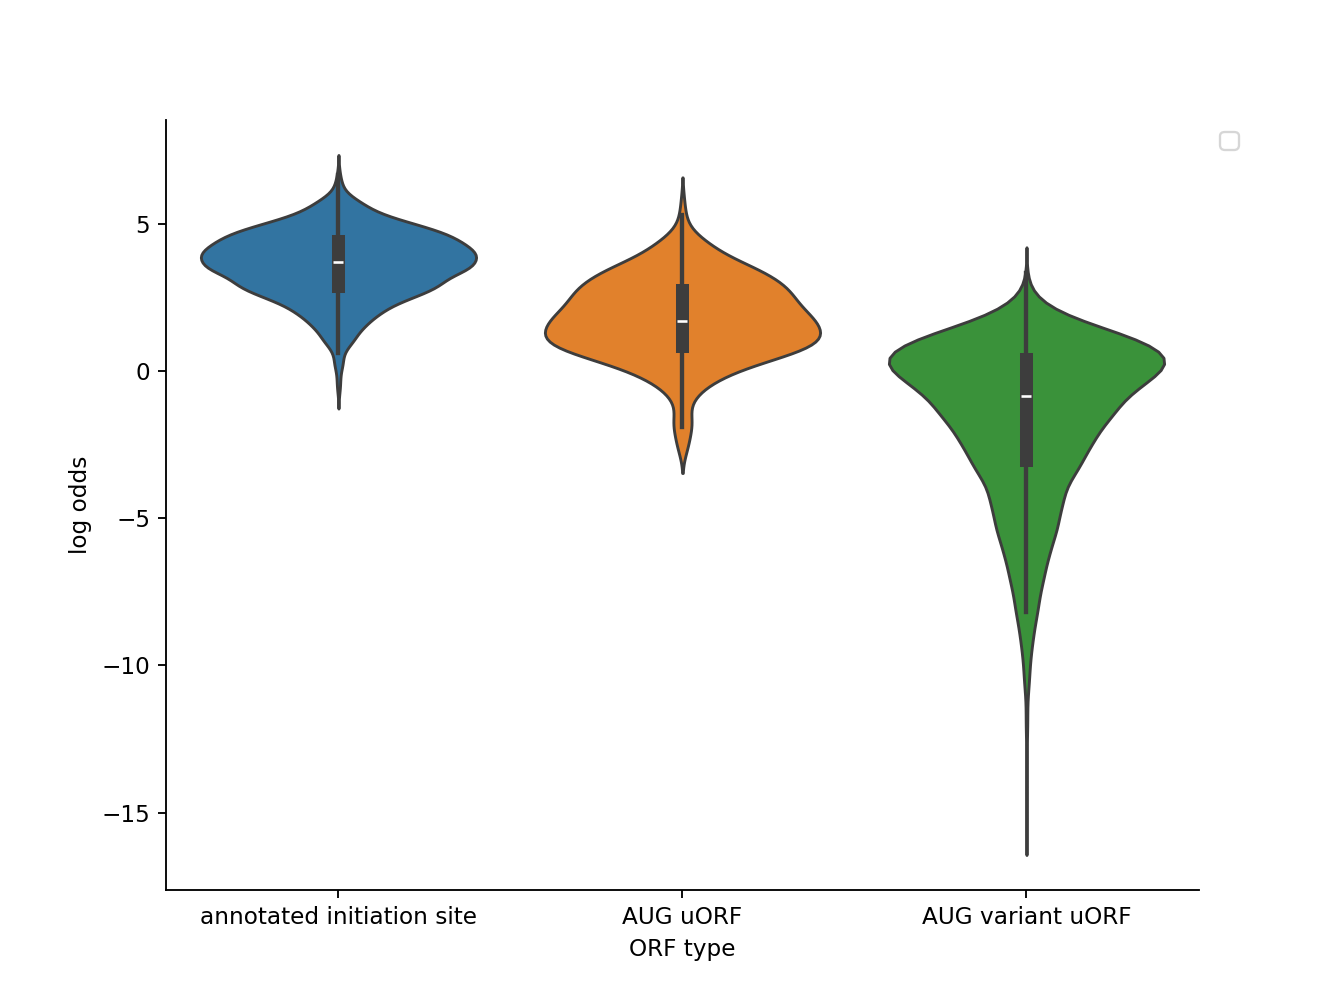

In [20]:
plt.close()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
sns.violinplot(data=violin_df, x="ORF type", y="log odds", order = ['annotated initiation site', 'AUG uORF', 'AUG variant uORF'], palette=['tab:blue', 'tab:orange', 'tab:green'])
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
plt.legend()
plt.legend(bbox_to_anchor = (1.05,1))
plt.show()

In [21]:
print(stats.mannwhitneyu(violin_df[violin_df['ORF type'] == 'annotated initiation site']['log odds'].tolist(), violin_df[violin_df['ORF type'] == 'AUG uORF']['log odds'].tolist()))
print(stats.mannwhitneyu(violin_df[violin_df['ORF type'] == 'annotated initiation site']['log odds'].tolist(), violin_df[violin_df['ORF type'] == 'AUG variant uORF']['log odds'].tolist()))
print(stats.mannwhitneyu(violin_df[violin_df['ORF type'] == 'AUG variant uORF']['log odds'].tolist(), violin_df[violin_df['ORF type'] == 'AUG uORF']['log odds'].tolist()))

MannwhitneyuResult(statistic=910298.0, pvalue=2.429904024224866e-125)
MannwhitneyuResult(statistic=19348507.0, pvalue=0.0)
MannwhitneyuResult(statistic=386015.0, pvalue=5.050081407746869e-178)


In [24]:
uorf_comparison_list = list(np.unique(violin_df[violin_df['Location on Transcript'] == 'aTIS']['Gene Name']))
tx_span1 = violin_df['Gene Name'].tolist()
tx_mask1 = [i in uorf_comparison_list for i in tx_span1]
uorf_comparison = violin_df.iloc[tx_mask1].copy()

In [25]:
#odds ratio will be uorf over main orf. First get 5 odds ratios from 5 models. Redo this analysis with whole genome
uorf_comparison['odds list'] = uorf_comparison.apply(lambda x: [x['pred '+str(i)]/(1-x['pred '+str(i)]) for i in range(5)], axis=1)

In [26]:
uorf_comparison

Transcript Gene Name  Chrom Strand Location on Transcript  \
93    XM_047442189.1     GNL3L   chrX      +                   aTIS   
1649  NM_001130847.4     AIFM1   chrX      -                   aTIS   
6067  XM_017007709.3      ADD1   chr4      +                  5 UTR   
2186     NM_001033.5      RRM1  chr11      +                  5 UTR   
8498  XM_011538688.3     RSRC2  chr12      -                  5 UTR   
...              ...       ...    ...    ...                    ...   
473   NM_001040025.3     ARL16  chr17      -                   aTIS   
608   NM_001330692.2     PSMD4   chr1      +                  5 UTR   
1019  NM_001128917.2    TOMM40  chr19      +                  5 UTR   
497      NM_000362.5     TIMP3  chr22      +                   aTIS   
364   NM_001280560.2    ANP32E   chr1      -                  5 UTR   

     Start Codon Transcript Index   Coordinate     Label  \
93           ATG            131.0   54532566.0  6.044254   
1649         ATG            185.0  130165655.0  6.043443   
6067         ATA             94.0    2867944.0 -5.000000   
2186         TTG            181.0    4094979.0  2.218065   
8498         AAG             11.0  122526924.0 -5.000000   
...          ...              ...          ...       ...   
473          ATG             44.0   81683752.0  5.125967   
608          TTG              1.0  151254734.0 -5.000000   
1019         CTG            123.0   44891376.0 -5.000000   
497          ATG            297.0   32802001.0  5.097980   
364          TTG            261.0  150235850.0  2.353695   

                                            Genomic idx  \
93    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1649  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
6067  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2186  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
8498  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
473   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
608   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1019  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
497   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
364   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
93    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1649  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
6067  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
2186  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
8498  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                 ...   
473   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
608   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1019  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
497   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
364   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
93    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1649  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
6067  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
2186  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
8498  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                 ...   
473   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
608   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1019  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
497   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
364   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
93                           ATG             1   
1649                         ATG             1   
6067                         ATA             0   
2186                         TTG             1   
8498                         AAG             0   
...      

In [27]:
atis_df = uorf_comparison[uorf_comparison['Location on Transcript'] == 'aTIS'].copy()
atis_df['Gene Name'].value_counts()

Gene Name
CDKN2A     3
ANP32E     2
VPS28      2
CALM3      2
HDGF       2
          ..
LARS1      1
RPA2       1
PSMG3      1
PPP2R2A    1
IDH2       1
Name: count, Length: 2310, dtype: int64

In [172]:
atis_df[atis_df['Gene Name'] == 'CDKN2A']

Transcript Gene Name Chrom Strand Location on Transcript  \
4230     NM_058195.4    CDKN2A  chr9      -                   aTIS   
4229     NM_058197.5    CDKN2A  chr9      -                   aTIS   
4228  XM_047422598.1    CDKN2A  chr9      -                   aTIS   

     Start Codon Transcript Index  Coordinate     Label  \
4230         ATG             61.0  21994330.0  3.777941   
4229         ATG             30.0  21974826.0  2.104118   
4228         ATG             35.0  21971204.0  1.956814   

                                            Genomic idx  \
4230  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
4229  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
4228  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
4230  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
4229  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
4228  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
4230  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
4229  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
4228  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
4230                         ATG             1   
4229                         ATG             1   
4228                         ATG             1   

                                      Windowed Encoding  \
4230  [[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1,...   
4229  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
4228  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

                                           Windowed Seq    pred 0    pred 1  \
4230  CAAAGGGCGGCGCAGCGGCTGCCGAGCTCGGCCCTGGAGGCGGCGA...  0.994872  0.986704   
4229  NNNNNNNNNNNNNNNNNNNNGAGAGCAGGCAGCGGGCGGCGGGGAG...  0.943664  0.989303   
4228  NNNNNNNNNNNNNNNAAGGAAATTGGAAACTGGAAGCAAATGTAGG...  0.355727  0.649101   

        pred 2    pred 3    pred 4      pred                   ORF type  \
4230  0.992080  0.996207  0.968199  0.987613  annotated initiation site   
4229  0.949635  0.987411  0.978561  0.969715  annotated initiation site   
4228  0.836777  0.638647  0.346156  0.565281  annotated initiation site   

      log odds                                          odds list  
4230  4.378610  [194.01134461595686, 74.21054377549648, 125.26...  
4229  3.466341  [16.750643541153305, 92.48409169424849, 18.854...  
4228  0.262625  [0.5521363109135926, 1.8498220688928864, 5.126...

In [28]:
tx_odds = dict(zip(atis_df['Transcript'], atis_df['odds list']))
sorted_log_odds = atis_df.sort_values(by='log odds', ascending=False).copy()
strong_genes = sorted_log_odds.drop_duplicates(subset='Gene Name', keep='first')
g_odds = dict(zip(strong_genes['Gene Name'], strong_genes['odds list']))

def get_control_odds(df):
    odds_c = tx_odds.get(df['Transcript'], 0)
    if odds_c==0:
        odds_c = g_odds.get(df['Gene Name'], 0)
    return odds_c

uorf_comparison['atis odds'] = uorf_comparison.apply(lambda x: get_control_odds(x[['Transcript', 'Gene Name']]), axis=1)
    

In [29]:
uorf_comparison['log2 odds ratio'] = uorf_comparison.apply(lambda x: np.log2((np.mean(x['odds list'])/np.mean(x['atis odds']))+0.0001), axis=1)

In [30]:
uorf_comparison['uORF enrichment p-value'] = uorf_comparison.apply(lambda x: stats.ttest_ind(a=x['odds list'], b=x['atis odds'], equal_var=True)[1], axis=1) 

In [30]:
stats.ttest_ind(a=uorf_comparison['odds list'].iloc[0], b=uorf_comparison['atis odds'].iloc[0], equal_var=True)[1]

1.0

In [31]:
uorf_comparison

Transcript Gene Name  Chrom Strand Location on Transcript  \
93    XM_047442189.1     GNL3L   chrX      +                   aTIS   
1649  NM_001130847.4     AIFM1   chrX      -                   aTIS   
6067  XM_017007709.3      ADD1   chr4      +                  5 UTR   
2186     NM_001033.5      RRM1  chr11      +                  5 UTR   
8498  XM_011538688.3     RSRC2  chr12      -                  5 UTR   
...              ...       ...    ...    ...                    ...   
473   NM_001040025.3     ARL16  chr17      -                   aTIS   
608   NM_001330692.2     PSMD4   chr1      +                  5 UTR   
1019  NM_001128917.2    TOMM40  chr19      +                  5 UTR   
497      NM_000362.5     TIMP3  chr22      +                   aTIS   
364   NM_001280560.2    ANP32E   chr1      -                  5 UTR   

     Start Codon Transcript Index   Coordinate     Label  \
93           ATG            131.0   54532566.0  6.044254   
1649         ATG            185.0  130165655.0  6.043443   
6067         ATA             94.0    2867944.0 -5.000000   
2186         TTG            181.0    4094979.0  2.218065   
8498         AAG             11.0  122526924.0 -5.000000   
...          ...              ...          ...       ...   
473          ATG             44.0   81683752.0  5.125967   
608          TTG              1.0  151254734.0 -5.000000   
1019         CTG            123.0   44891376.0 -5.000000   
497          ATG            297.0   32802001.0  5.097980   
364          TTG            261.0  150235850.0  2.353695   

                                            Genomic idx  \
93    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1649  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
6067  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2186  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
8498  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
473   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
608   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1019  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
497   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
364   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
93    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1649  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
6067  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
2186  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
8498  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                 ...   
473   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
608   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1019  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
497   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
364   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
93    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1649  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
6067  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
2186  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
8498  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                 ...   
473   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
608   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1019  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
497   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
364   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
93                           ATG             1   
1649                         ATG             1   
6067                         ATA             0   
2186                         TTG             1   
8498                         AAG             0   
...      

In [31]:
uorf_comparison['-log10(p)'] = uorf_comparison['uORF enrichment p-value'].apply(lambda x: -1*np.log10(x))

<IPython.core.display.Javascript object>


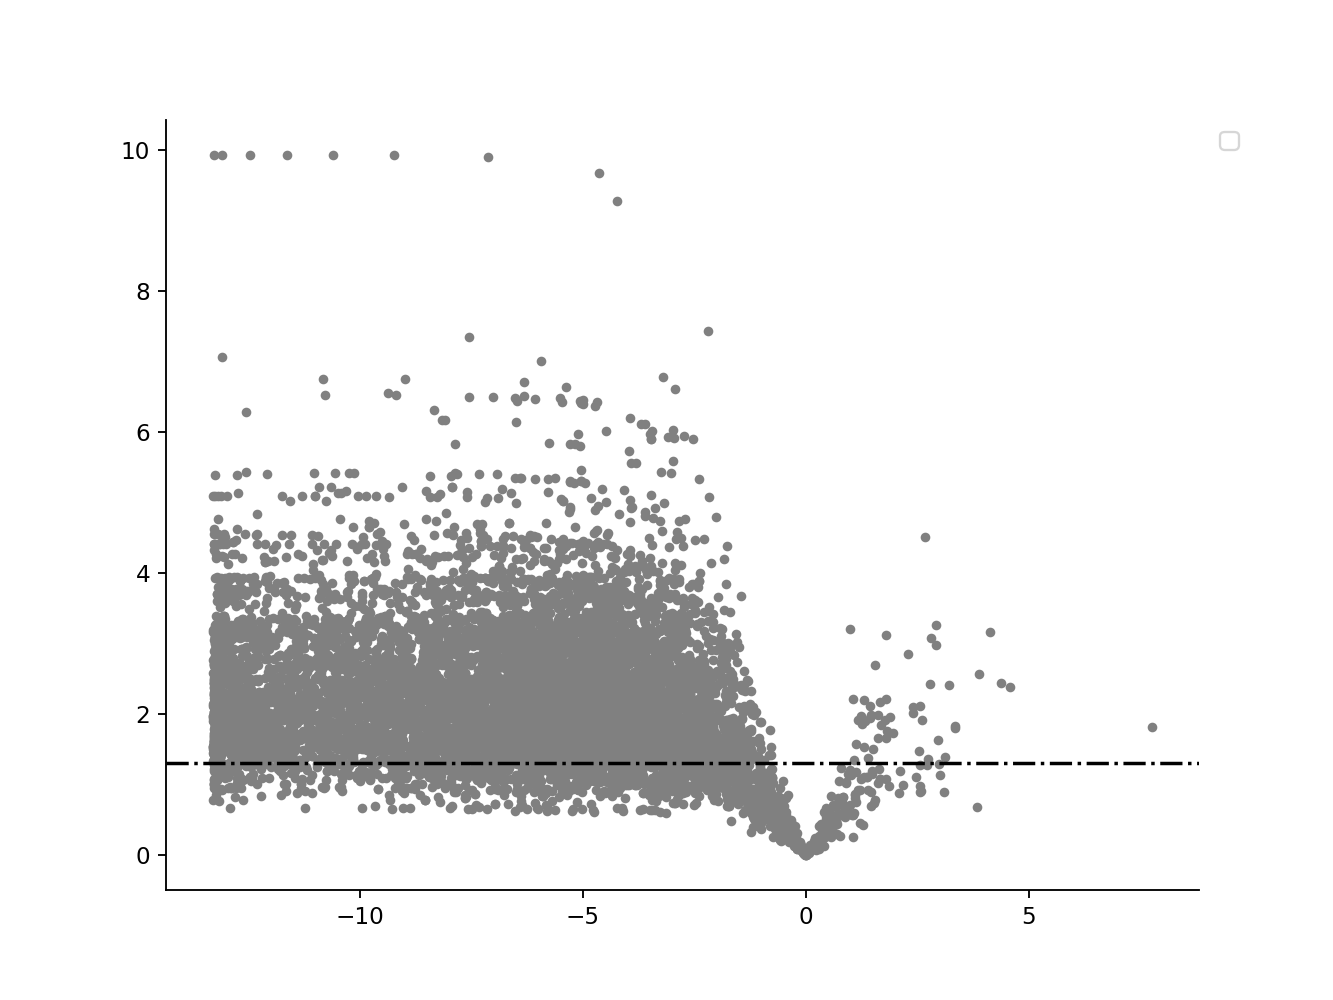

In [34]:
uorf_volcano = uorf_comparison[uorf_comparison['Location on Transcript'] == '5 UTR'].copy()
plt.close()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
plt.scatter(uorf_volcano['log2 odds ratio'], uorf_volcano['-log10(p)'], c='grey', s=10)
plt.axhline(y=-1*np.log10(0.05), c='black', linestyle='dashdot')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
plt.legend()
plt.legend(bbox_to_anchor = (1.05,1))
plt.show()

In [32]:
tx_utr = dict(zip(atis_df['Transcript'], atis_df['Transcript Index']))
sorted_utr = atis_df.sort_values(by='Transcript Index', ascending=False).copy()
long_genes = sorted_utr.drop_duplicates(subset='Gene Name', keep='first')
g_utr = dict(zip(long_genes['Gene Name'], long_genes['Transcript Index']))

def get_utr(df):
    utr_c = tx_utr.get(df['Transcript'], -1)
    if utr_c==-1:
        utr_c = g_utr.get(df['Gene Name'], 0)
    if utr_c==0:
        utr_c = 0.01
    return utr_c

uorf_comparison['UTR length'] = uorf_comparison.apply(lambda x: get_utr(x[['Transcript', 'Gene Name']]), axis=1)
uorf_comparison['UTR position'] = uorf_comparison.apply(lambda x: x['Transcript Index']/x['UTR length'], axis=1)

In [36]:
strong_uorfs = uorf_comparison[(uorf_comparison['-log10(p)'] >= -1*np.log10(0.05))&(uorf_comparison['log2 odds ratio'] >= 1)].copy()

In [302]:
strong_uorfs.sort_values(by='log2 odds ratio', ascending=False)

Transcript Gene Name  Chrom Strand Location on Transcript  \
190   NM_001318861.2     DGUOK   chr2      +                  5 UTR   
8758  XM_017005527.2       TFG   chr3      +                  5 UTR   
4145  XM_024449911.2     IDH3A  chr15      +                  5 UTR   
2707  NM_001317097.2     NAA60  chr16      +                  5 UTR   
2718  NM_001195307.2     BBIP1  chr10      -                  5 UTR   
7933  XM_047426004.1     BBIP1  chr10      -                  5 UTR   
4872  XM_047441778.1     STAG2   chrX      +                  5 UTR   
8903  XM_047426004.1     BBIP1  chr10      -                  5 UTR   
4123  NM_001276725.2     IFTAP  chr11      +                  5 UTR   
2771     NM_057161.4    KLHDC3   chr6      +                  5 UTR   
160      NM_033117.4     RBM18   chr9      -                  5 UTR   
303   NM_001171888.2  FGFR1OP2  chr12      +                  5 UTR   
5261  XM_006715708.2      BZW2   chr7      +                  5 UTR   
4180  XM_047426487.1      DDB2  chr11      +                  5 UTR   
4122  NM_001276725.2     IFTAP  chr11      +                  5 UTR   
1264  NM_001204090.2     COX16  chr14      -                  5 UTR   
273      NM_004818.3     DDX23  chr12      -                  5 UTR   
1579     NM_053275.4     RPLP0  chr12      -                  5 UTR   
3060     NM_004136.4     IREB2  chr15      +                  5 UTR   
4198     NM_005644.4     TAF12   chr1      -                  5 UTR   
3087  NM_001353107.2   PRPSAP2  chr17      +                  5 UTR   
396      NM_139169.5     TRUB1  chr10      +                  5 UTR   
1242  XM_011520934.4     FOXM1  chr12      -                  5 UTR   
3255  XM_006716394.2     VDAC3   chr8      +                  5 UTR   
260      NM_007026.4    DUSP14  chr17      +                  5 UTR   
721   XM_047430087.1      DAP3   chr1      +                  5 UTR   
328      NM_016486.4    TMEM69   chr1      +                  5 UTR   
3484  XM_017028400.2    MIS18A  chr21      -                  5 UTR   
21       NM_024056.4  TMEM106C  chr12      +                  5 UTR   
1889     NM_006079.5    CITED2   chr6      -                  5 UTR   
4076     NM_020699.4   GATAD2B   chr1      -                  5 UTR   
256   XM_005256977.4    DUSP14  chr17      +                  5 UTR   
1681     NM_000050.4      ASS1   chr9      +                  5 UTR   
907   XM_017002036.2   S100A13   chr1      -                  5 UTR   
7805  NM_001301698.2      ERI3   chr1      -                  5 UTR   
8724  XM_047426004.1     BBIP1  chr10      -                  5 UTR   
1393  XM_024448531.2     NUCB2  chr11      +                  5 UTR   
90    XM_047442190.1     GNL3L   chrX      +                  5 UTR   
435      NM_032637.4      SKP2   chr5      +                  5 UTR   
588   XM_047448717.1     TRA2B   chr3      -                  5 UTR   
3222     NM_005032.7      PLS3   chrX      +                  5 UTR   
6242  XM_005264485.3     SRSF7   chr2      -                  5 UTR   
3252  XM_006716394.2     VDAC3   chr8      +                  5 UTR   
3427     NM_001418.4    EIF4G2  chr11      -                  5 UTR   
560   NM_001153484.2      SCOC   chr4      +                  5 UTR   
6382     NM_030915.4       LBH   chr2      +                  5 UTR   
1092     NM_016422.4    RNF141  chr11      -                  5 UTR   
3714     NM_032280.3    ZCCHC9   chr5      +                  5 UTR   

     Start Codon Transcript Index   Coordinate     Label  \
190          ATG             82.0   73926961.0  1.956303   
8758         ATG            230.0  100709723.0 -5.000000   
4145         ATG             42.0   78149403.0  2.738682   
2707         ATG             88.0    3458132.0  4.121129   
2718         ATG             52.0  110919127.0  4.855317   
7933         ACG            363.0  110918572.0 -5.000000   
4872         CTG            120.0  123962177.0 -5.000000   
8903         ATG            322.0  110918613.0 -5.

In [301]:
atis_df[atis_df['Gene Name'] == 'STAG2']

Transcript Gene Name Chrom Strand Location on Transcript  \
4042  XM_047441778.1     STAG2  chrX      +                   aTIS   

     Start Codon Transcript Index   Coordinate     Label  \
4042         ATG            351.0  124022627.0  4.115845   

                                            Genomic idx  \
4042  [123962058, 123962059, 123962060, 123962061, 1...   

                                               Sequence  \
4042  CCCGCACTGTCTTTCTCAAGGCACGAACTGAGCTGATCCTTGCCCC...   

                                       One Hot Encoding  \
4042  [[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0,...   

     Input Sequence Center Codon  Binary Label  \
4042                         ATG             1   

                                      Windowed Encoding  \
4042  [[1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0,...   

                                           Windowed Seq    pred 0    pred 1  \
4042  ATATATGAATATATTTCTGACATTGAGGTGTTCCAGAAGATGATAA...  0.551065  0.728712   

        pred 2    pred 3    pred 4      pred                   ORF type  \
4042  0.531037  0.364665  0.624163  0.559928  annotated initiation site   

      log odds                                          odds list  
4042  0.240871  [1.2274926167211284, 2.686120661168646, 1.1323...

<IPython.core.display.Javascript object>


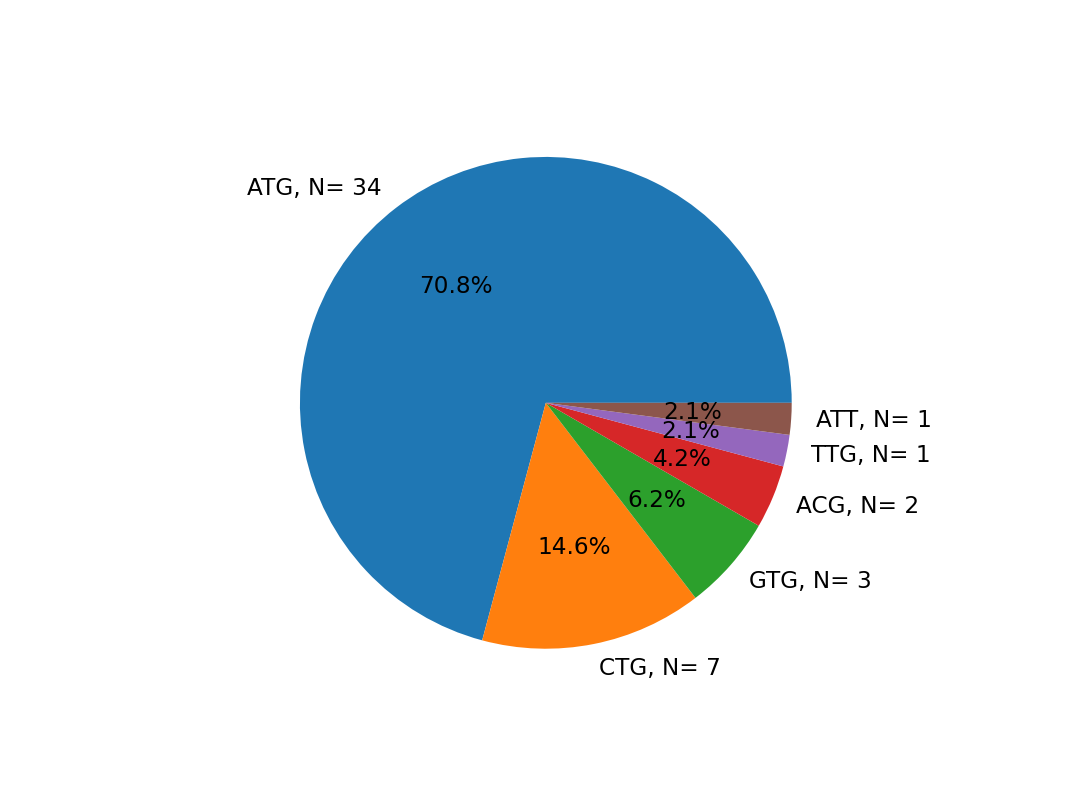

In [38]:
plt.close()
codons = [strong_uorfs['Start Codon'].value_counts().index[i] + ', N= ' + str(strong_uorfs['Start Codon'].value_counts()[i]) for i in range(len(strong_uorfs['Start Codon'].value_counts()))]
plt.pie(strong_uorfs['Start Codon'].value_counts(), labels = codons, autopct='%1.1f%%')
plt.show()

<IPython.core.display.Javascript object>


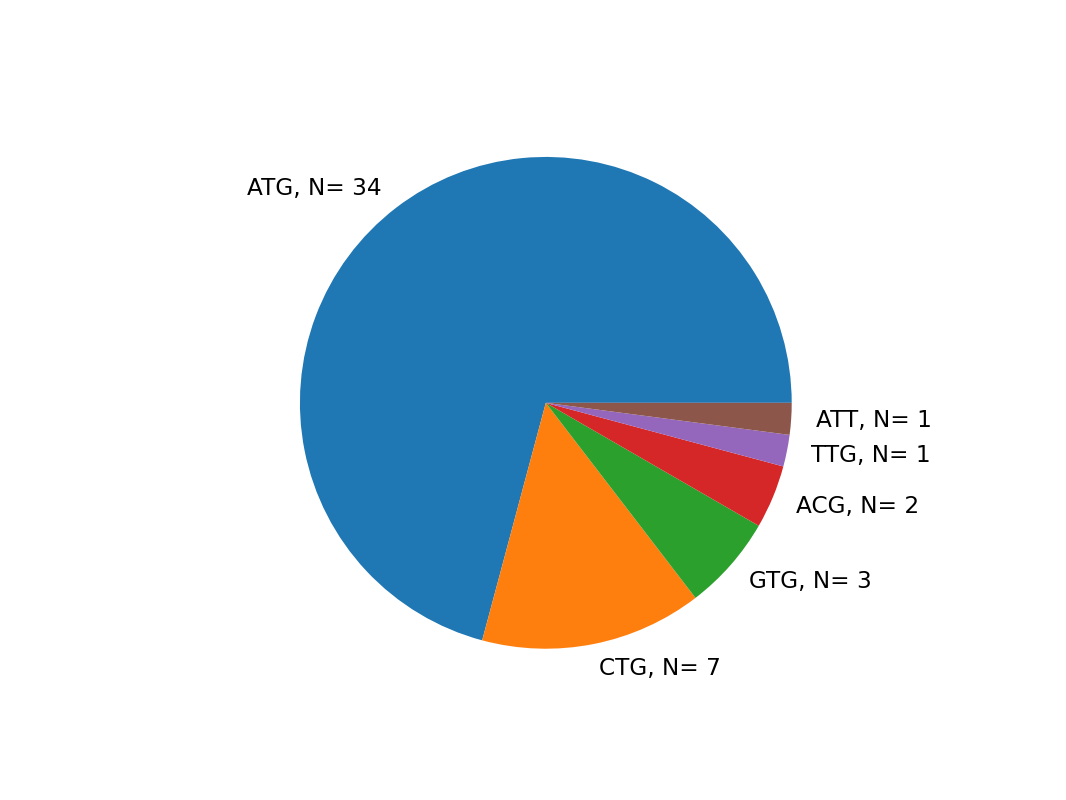

In [37]:
plt.close()
codons = [strong_uorfs['Start Codon'].value_counts().index[i] + ', N= ' + str(strong_uorfs['Start Codon'].value_counts()[i]) for i in range(len(strong_uorfs['Start Codon'].value_counts()))]
plt.pie(strong_uorfs['Start Codon'].value_counts(), labels = codons)#, autopct='%1.1f%%')
plt.show()

In [145]:
strong_uorfs

Transcript Gene Name  Chrom Strand Location on Transcript  \
1889     NM_006079.5    CITED2   chr6      -                  5 UTR   
90    XM_047442190.1     GNL3L   chrX      +                  5 UTR   
1579     NM_053275.4     RPLP0  chr12      -                  5 UTR   
396      NM_139169.5     TRUB1  chr10      +                  5 UTR   
2707  NM_001317097.2     NAA60  chr16      +                  5 UTR   
4198     NM_005644.4     TAF12   chr1      -                  5 UTR   
3060     NM_004136.4     IREB2  chr15      +                  5 UTR   
6382     NM_030915.4       LBH   chr2      +                  5 UTR   
7933  XM_047426004.1     BBIP1  chr10      -                  5 UTR   
4076     NM_020699.4   GATAD2B   chr1      -                  5 UTR   
3427     NM_001418.4    EIF4G2  chr11      -                  5 UTR   
1681     NM_000050.4      ASS1   chr9      +                  5 UTR   
7805  NM_001301698.2      ERI3   chr1      -                  5 UTR   
2718  NM_001195307.2     BBIP1  chr10      -                  5 UTR   
8724  XM_047426004.1     BBIP1  chr10      -                  5 UTR   
3252  XM_006716394.2     VDAC3   chr8      +                  5 UTR   
3484  XM_017028400.2    MIS18A  chr21      -                  5 UTR   
3255  XM_006716394.2     VDAC3   chr8      +                  5 UTR   
3222     NM_005032.7      PLS3   chrX      +                  5 UTR   
4872  XM_047441778.1     STAG2   chrX      +                  5 UTR   
5261  XM_006715708.2      BZW2   chr7      +                  5 UTR   
4123  NM_001276725.2     IFTAP  chr11      +                  5 UTR   
435      NM_032637.4      SKP2   chr5      +                  5 UTR   
6242  XM_005264485.3     SRSF7   chr2      -                  5 UTR   
3714     NM_032280.3    ZCCHC9   chr5      +                  5 UTR   
4180  XM_047426487.1      DDB2  chr11      +                  5 UTR   
1393  XM_024448531.2     NUCB2  chr11      +                  5 UTR   
4145  XM_024449911.2     IDH3A  chr15      +                  5 UTR   
1242  XM_011520934.4     FOXM1  chr12      -                  5 UTR   
4122  NM_001276725.2     IFTAP  chr11      +                  5 UTR   
1092     NM_016422.4    RNF141  chr11      -                  5 UTR   
560   NM_001153484.2      SCOC   chr4      +                  5 UTR   
3087  NM_001353107.2   PRPSAP2  chr17      +                  5 UTR   
8903  XM_047426004.1     BBIP1  chr10      -                  5 UTR   
303   NM_001171888.2  FGFR1OP2  chr12      +                  5 UTR   
1264  NM_001204090.2     COX16  chr14      -                  5 UTR   
2771     NM_057161.4    KLHDC3   chr6      +                  5 UTR   
8758  XM_017005527.2       TFG   chr3      +                  5 UTR   
260      NM_007026.4    DUSP14  chr17      +                  5 UTR   
721   XM_047430087.1      DAP3   chr1      +                  5 UTR   
273      NM_004818.3     DDX23  chr12      -                  5 UTR   
160      NM_033117.4     RBM18   chr9      -                  5 UTR   
256   XM_005256977.4    DUSP14  chr17      +                  5 UTR   
588   XM_047448717.1     TRA2B   chr3      -                  5 UTR   
328      NM_016486.4    TMEM69   chr1      +                  5 UTR   
907   XM_017002036.2   S100A13   chr1      -                  5 UTR   
21       NM_024056.4  TMEM106C  chr12      +                  5 UTR   
190   NM_001318861.2     DGUOK   chr2      +                  5 UTR   

     Start Codon Transcript Index   Coordinate     Label  \
1889         ATG            162.0  139374485.0  4.378554   
90           ATG            117.0   54530335.0  2.979256   
1579         ATG             44.0  120200875.0  1.256990   
396          ATG             33.0  114938227.0  3.130358   
2707         ATG             88.0    3458132.0  4.121129   
4198         ATG             52.0   28643014.0  3.521458   
3060         ATG            109.0   78438324.0  3.402026   
6382         TTG             38.0   30231571.0 -5.

In [150]:
dataset[dataset['Gene Name'] == 'SCOC']['Windowed Seq'].iloc[9][40:60]

'GCGGAAGACCATTCCTCAAG'

In [151]:
strong_uorfs.sort_values(by='-log10(p)', ascending=False)

Transcript Gene Name  Chrom Strand Location on Transcript  \
1264  NM_001204090.2     COX16  chr14      -                  5 UTR   
160      NM_033117.4     RBM18   chr9      -                  5 UTR   
2707  NM_001317097.2     NAA60  chr16      +                  5 UTR   
328      NM_016486.4    TMEM69   chr1      +                  5 UTR   
5261  XM_006715708.2      BZW2   chr7      +                  5 UTR   
303   NM_001171888.2  FGFR1OP2  chr12      +                  5 UTR   
396      NM_139169.5     TRUB1  chr10      +                  5 UTR   
907   XM_017002036.2   S100A13   chr1      -                  5 UTR   
2718  NM_001195307.2     BBIP1  chr10      -                  5 UTR   
4145  XM_024449911.2     IDH3A  chr15      +                  5 UTR   
4180  XM_047426487.1      DDB2  chr11      +                  5 UTR   
8903  XM_047426004.1     BBIP1  chr10      -                  5 UTR   
8758  XM_017005527.2       TFG   chr3      +                  5 UTR   
721   XM_047430087.1      DAP3   chr1      +                  5 UTR   
3714     NM_032280.3    ZCCHC9   chr5      +                  5 UTR   
3222     NM_005032.7      PLS3   chrX      +                  5 UTR   
4076     NM_020699.4   GATAD2B   chr1      -                  5 UTR   
1393  XM_024448531.2     NUCB2  chr11      +                  5 UTR   
1579     NM_053275.4     RPLP0  chr12      -                  5 UTR   
3087  NM_001353107.2   PRPSAP2  chr17      +                  5 UTR   
4198     NM_005644.4     TAF12   chr1      -                  5 UTR   
1681     NM_000050.4      ASS1   chr9      +                  5 UTR   
8724  XM_047426004.1     BBIP1  chr10      -                  5 UTR   
3427     NM_001418.4    EIF4G2  chr11      -                  5 UTR   
3255  XM_006716394.2     VDAC3   chr8      +                  5 UTR   
90    XM_047442190.1     GNL3L   chrX      +                  5 UTR   
21       NM_024056.4  TMEM106C  chr12      +                  5 UTR   
560   NM_001153484.2      SCOC   chr4      +                  5 UTR   
273      NM_004818.3     DDX23  chr12      -                  5 UTR   
588   XM_047448717.1     TRA2B   chr3      -                  5 UTR   
3252  XM_006716394.2     VDAC3   chr8      +                  5 UTR   
1889     NM_006079.5    CITED2   chr6      -                  5 UTR   
7933  XM_047426004.1     BBIP1  chr10      -                  5 UTR   
190   NM_001318861.2     DGUOK   chr2      +                  5 UTR   
4872  XM_047441778.1     STAG2   chrX      +                  5 UTR   
260      NM_007026.4    DUSP14  chr17      +                  5 UTR   
1242  XM_011520934.4     FOXM1  chr12      -                  5 UTR   
256   XM_005256977.4    DUSP14  chr17      +                  5 UTR   
3484  XM_017028400.2    MIS18A  chr21      -                  5 UTR   
2771     NM_057161.4    KLHDC3   chr6      +                  5 UTR   
6382     NM_030915.4       LBH   chr2      +                  5 UTR   
6242  XM_005264485.3     SRSF7   chr2      -                  5 UTR   
7805  NM_001301698.2      ERI3   chr1      -                  5 UTR   
3060     NM_004136.4     IREB2  chr15      +                  5 UTR   
4123  NM_001276725.2     IFTAP  chr11      +                  5 UTR   
435      NM_032637.4      SKP2   chr5      +                  5 UTR   
4122  NM_001276725.2     IFTAP  chr11      +                  5 UTR   
1092     NM_016422.4    RNF141  chr11      -                  5 UTR   

     Start Codon Transcript Index   Coordinate     Label  \
1264         ATG             80.0   70359602.0  4.456131   
160          ATG             94.0  122264745.0  5.777726   
2707         ATG             88.0    3458132.0  4.121129   
328          ATG             99.0   45690977.0  2.231192   
5261         ATG             72.0   16661285.0 -5.000000   
303          ATG             56.0   26938525.0  4.341318   
396          ATG             33.0  114938227.0  3.130358   
907          ATG            251.0  153626705.0 -5.

In [153]:
dataset[dataset['Gene Name'] == 'COX16']

Transcript Gene Name  Chrom Strand Location on Transcript  \
1260  NM_001204090.2     COX16  chr14      -                  5 UTR   
8990  NM_001204090.2     COX16  chr14      -                  5 UTR   
1259  NM_001204090.2     COX16  chr14      -                  5 UTR   
5109  NM_001204090.2     COX16  chr14      -                  5 UTR   
1261  NM_001204090.2     COX16  chr14      -                  5 UTR   
1263  NM_001204090.2     COX16  chr14      -                  5 UTR   
1262  NM_001204090.2     COX16  chr14      -                   aTIS   
1264  NM_001204090.2     COX16  chr14      -                  5 UTR   

     Start Codon Transcript Index  Coordinate     Label  \
1260         TTG             15.0  70359667.0  2.144937   
8990         AAG              0.0  70359682.0 -5.000000   
1259         ACG              4.0  70359678.0  1.354923   
5109         AAG              0.0  70359682.0 -5.000000   
1261         ATT             39.0  70359643.0  2.735047   
1263         CTG             31.0  70359651.0  3.221956   
1262         ATG             96.0  70359586.0  2.791760   
1264         ATG             80.0  70359602.0  4.456131   

                                            Genomic idx  \
1260  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
8990  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1259  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
5109  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1261  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1263  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1262  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1264  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
1260  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
8990  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1259  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
5109  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1261  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1263  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1262  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1264  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
1260  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
8990  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1259  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
5109  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1261  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1263  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1262  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1264  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
1260                         TTG             1   
8990                         AAG             0   
1259                         ACG             1   
5109                         AAG             0   
1261                         ATT             1   
1263                         CTG             1   
1262                         ATG             1   
1264                         ATG             1   

                                      Windowed Encoding  \
1260  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
8990  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1259  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
5109  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1261  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1263  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1262  [[1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0,...   
1264  [[0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0,...   

                                           Windowed Seq    pred 0    pred 1  \
1260  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNAAGGACGTACT...  0.235955  0.619563   
8990  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...  0.000089  0.002236   
1259  NNNNNNNNNNNNNNNN

In [155]:
len(strong_uorfs)

48

In [185]:
weak_uorfs = uorf_comparison[(uorf_comparison['-log10(p)'] >= -1*np.log10(0.05))&(uorf_comparison['log2 odds ratio'] <= -1)&(uorf_comparison['Label'] == -5)].copy()

In [186]:
weak_uorfs[weak_uorfs['Start Codon'] == 'ATG']

Transcript Gene Name  Chrom Strand Location on Transcript  \
7995  NM_001178032.3     ZC4H2   chrX      -                  5 UTR   
6892  NM_001290310.3    CTNNA1   chr5      +                  5 UTR   
7046  NM_001289745.3     GAPDH  chr12      +                  5 UTR   
6559  XM_047423829.1     TRAF2   chr9      +                  5 UTR   
4641     NM_005870.5     SAP18  chr13      +                  5 UTR   
...              ...       ...    ...    ...                    ...   
720   XM_047436933.1   TMEM101  chr17      -                  5 UTR   
823   XM_047436936.1   TMEM101  chr17      -                  5 UTR   
766      NM_005979.3   S100A13   chr1      -                  5 UTR   
579   NM_001378574.1     IARS1   chr9      -                  5 UTR   
1063  NM_001194954.2     MATR3   chr5      +                  5 UTR   

     Start Codon Transcript Index   Coordinate  Label  \
7995         ATG            208.0   64922147.0   -5.0   
6892         ATG            101.0  138781937.0   -5.0   
7046         ATG            124.0    6534640.0   -5.0   
6559         ATG            184.0  136890465.0   -5.0   
4641         ATG            196.0   21140314.0   -5.0   
...          ...              ...          ...    ...   
720          ATG             30.0   44023184.0   -5.0   
823          ATG            289.0   44021322.0   -5.0   
766          ATG             71.0  153628178.0   -5.0   
579          ATG            122.0   92290846.0   -5.0   
1063         ATG             91.0  139279050.0   -5.0   

                                            Genomic idx  \
7995  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
6892  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
7046  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
6559  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
4641  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
720   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
823   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
766   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
579   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1063  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
7995  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
6892  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
7046  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
6559  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
4641  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                 ...   
720   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
823   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
766   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
579   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1063  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
7995  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
6892  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
7046  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
6559  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
4641  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                 ...   
720   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
823   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
766   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
579   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1063  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
7995                         ATG             0   
6892                         ATG             0   
7046                         ATG             0   
6559                         ATG             0   
4641                         ATG             0   
...                          ...           ..

In [205]:
uorf_comparison

Transcript Gene Name  Chrom Strand Location on Transcript  \
93    XM_047442189.1     GNL3L   chrX      +                   aTIS   
1649  NM_001130847.4     AIFM1   chrX      -                   aTIS   
6067  XM_017007709.3      ADD1   chr4      +                  5 UTR   
2186     NM_001033.5      RRM1  chr11      +                  5 UTR   
8498  XM_011538688.3     RSRC2  chr12      -                  5 UTR   
...              ...       ...    ...    ...                    ...   
473   NM_001040025.3     ARL16  chr17      -                   aTIS   
608   NM_001330692.2     PSMD4   chr1      +                  5 UTR   
1019  NM_001128917.2    TOMM40  chr19      +                  5 UTR   
497      NM_000362.5     TIMP3  chr22      +                   aTIS   
364   NM_001280560.2    ANP32E   chr1      -                  5 UTR   

     Start Codon Transcript Index   Coordinate     Label  \
93           ATG            131.0   54532566.0  6.044254   
1649         ATG            185.0  130165655.0  6.043443   
6067         ATA             94.0    2867944.0 -5.000000   
2186         TTG            181.0    4094979.0  2.218065   
8498         AAG             11.0  122526924.0 -5.000000   
...          ...              ...          ...       ...   
473          ATG             44.0   81683752.0  5.125967   
608          TTG              1.0  151254734.0 -5.000000   
1019         CTG            123.0   44891376.0 -5.000000   
497          ATG            297.0   32802001.0  5.097980   
364          TTG            261.0  150235850.0  2.353695   

                                            Genomic idx  \
93    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1649  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
6067  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2186  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
8498  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
473   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
608   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1019  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
497   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
364   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
93    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1649  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
6067  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
2186  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
8498  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                 ...   
473   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
608   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1019  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
497   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
364   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
93    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1649  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
6067  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
2186  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
8498  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                 ...   
473   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
608   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1019  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
497   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
364   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
93                           ATG             1   
1649                         ATG             1   
6067                         ATA             0   
2186                         TTG             1   
8498                         AAG             0   
...      

<IPython.core.display.Javascript object>


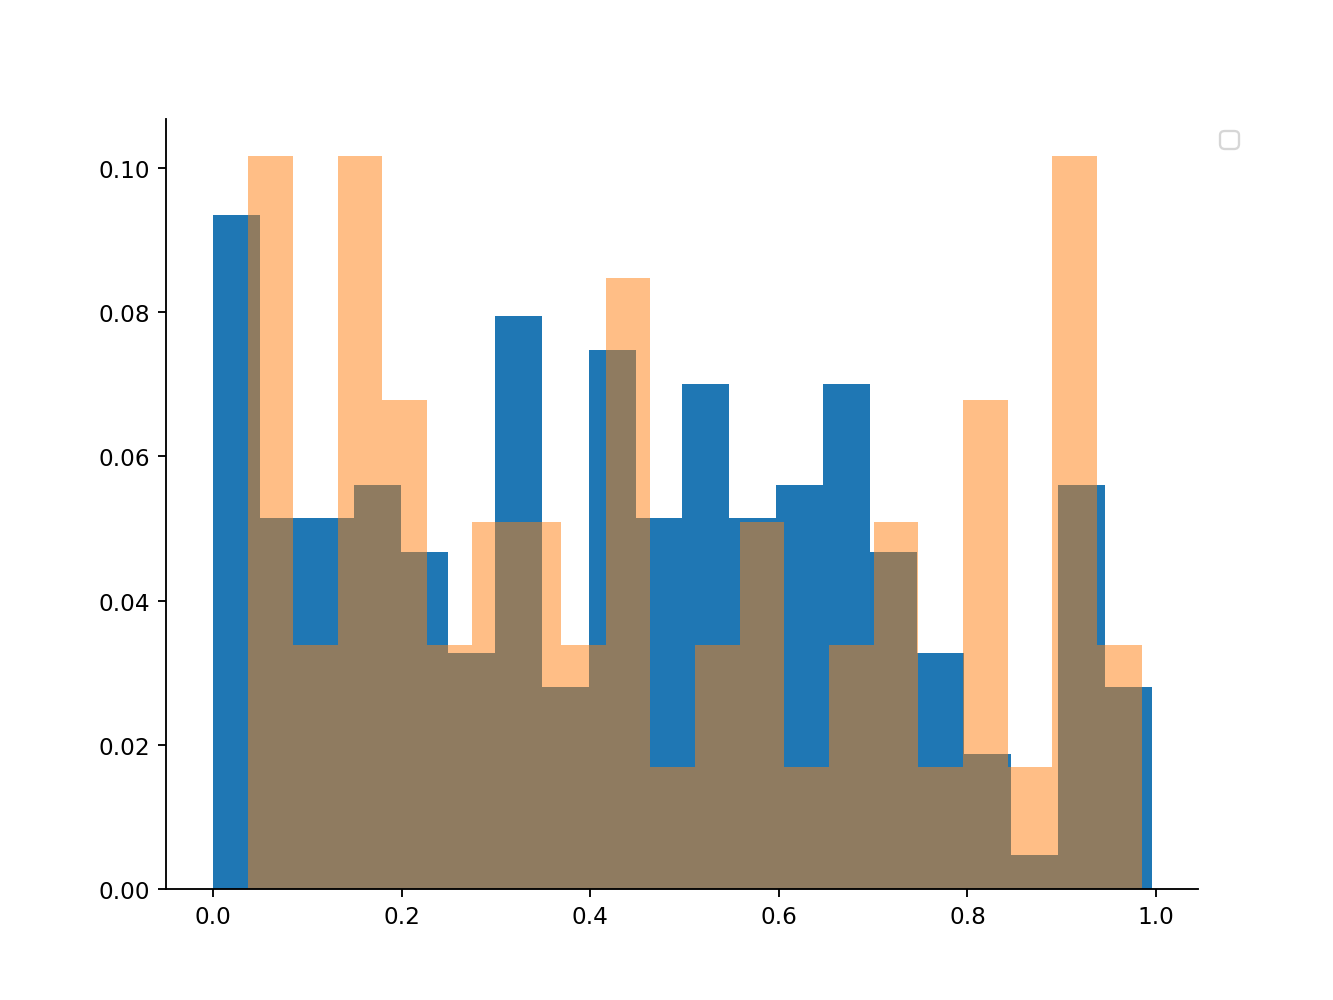

In [237]:
weak_hist = uorf_comparison[(uorf_comparison['UTR position'] < 1)&(uorf_comparison['log2 odds ratio'] < -1)&(uorf_comparison['Start Codon'] == 'ATG')].copy()
strong_hist = uorf_comparison[(uorf_comparison['UTR position'] < 1)&(uorf_comparison['log2 odds ratio'] > 1)&(uorf_comparison['Start Codon'] == 'ATG')].copy()


plt.close()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
plt.hist(weak_hist['UTR position'], bins=20, weights = [1/len(weak_hist)] * len(weak_hist))
plt.hist(strong_hist['UTR position'], bins=20, weights = [1/len(strong_hist)] * len(strong_hist), alpha=0.5)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
plt.legend()
plt.legend(bbox_to_anchor = (1.05,1))
plt.show()

In [238]:
stats.kstest(strong_hist['UTR position'].tolist(), weak_hist['UTR position'].tolist())

KstestResult(statistic=0.12688103912561383, pvalue=0.40638635922537, statistic_location=0.8058252427184466, statistic_sign=-1)

In [231]:
strong_hist

Transcript Gene Name  Chrom Strand Location on Transcript  \
64    XM_047422648.1      SMC2   chr9      +                  5 UTR   
90    XM_047442190.1     GNL3L   chrX      +                  5 UTR   
1579     NM_053275.4     RPLP0  chr12      -                  5 UTR   
1810  NM_001079872.2     CUL4B   chrX      -                  5 UTR   
396      NM_139169.5     TRUB1  chr10      +                  5 UTR   
...              ...       ...    ...    ...                    ...   
21       NM_024056.4  TMEM106C  chr12      +                  5 UTR   
58       NM_003368.5      USP1   chr1      +                  5 UTR   
190   NM_001318861.2     DGUOK   chr2      +                  5 UTR   
245   XM_047440125.1      GNAS  chr20      +                  5 UTR   
493   NM_001330211.2     MED24  chr17      -                  5 UTR   

     Start Codon Transcript Index   Coordinate     Label  \
64           ATG             60.0  104094368.0  5.772920   
90           ATG            117.0   54530335.0  2.979256   
1579         ATG             44.0  120200875.0  1.256990   
1810         TTG            242.0  120560719.0  2.114000   
396          ATG             33.0  114938227.0  3.130358   
...          ...              ...          ...       ...   
21           ATG             41.0   47964211.0  4.763111   
58           ATG            344.0   62437392.0  4.064301   
190          ATG             82.0   73926961.0  1.956303   
245          ATG            172.0   58889351.0  1.897162   
493          ATG             13.0   40054394.0  1.819402   

                                            Genomic idx  \
64    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
90    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1579  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1810  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
396   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
21    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
58    [1, 1, 1, 1, 1, 1, 62437048, 62437049, 6243705...   
190   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
245   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
493   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
64    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
90    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1579  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1810  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
396   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                 ...   
21    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
58    NNNNNNGAAAACGCGCCAAGTTCCCCTCGGTGGCGGAGTGCTAAAG...   
190   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
245   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
493   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
64    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
90    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1579  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1810  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
396   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                 ...   
21    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
58    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
190   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
245   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
493   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
64                           ATG             1   
90                           ATG             1   
1579                         ATG             1   
1810                         TTG             1   
396                          ATG             1   
...      

<IPython.core.display.Javascript object>


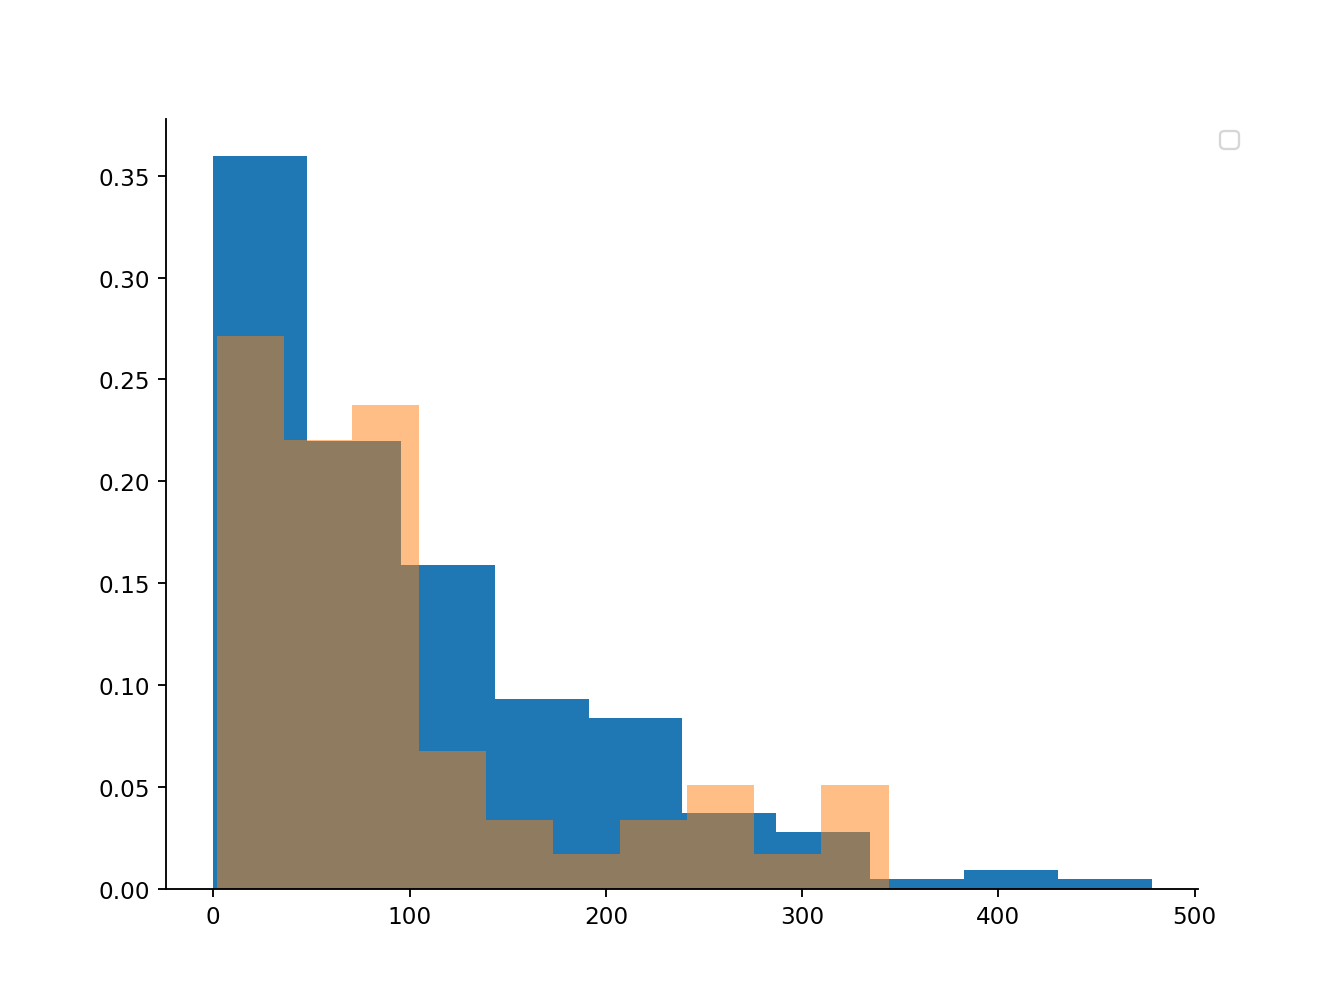

In [233]:
weak_hist = uorf_comparison[(uorf_comparison['UTR position'] < 1)&(uorf_comparison['log2 odds ratio'] < -1)&(uorf_comparison['Start Codon'] == 'ATG')].copy()
strong_hist = uorf_comparison[(uorf_comparison['UTR position'] < 1)&(uorf_comparison['log2 odds ratio'] > 1)&(uorf_comparison['Start Codon'] == 'ATG')].copy()


plt.close()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
plt.hist(weak_hist['Transcript Index'], bins=10, weights = [1/len(weak_hist)] * len(weak_hist))
plt.hist(strong_hist['Transcript Index'], bins=10, weights = [1/len(strong_hist)] * len(strong_hist), alpha=0.5)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
plt.legend()
plt.legend(bbox_to_anchor = (1.05,1))
plt.show()

In [234]:
stats.kstest(weak_hist['Transcript Index'].tolist(), strong_hist['Transcript Index'].tolist())

KstestResult(statistic=0.12078251227625535, pvalue=0.4666961770128242, statistic_location=118.0, statistic_sign=-1)

In [264]:
atis_df

Transcript Gene Name  Chrom Strand Location on Transcript  \
93    XM_047442189.1     GNL3L   chrX      +                   aTIS   
1649  NM_001130847.4     AIFM1   chrX      -                   aTIS   
953      NM_007062.3      PWP1  chr12      +                   aTIS   
2974     NM_024026.5    MRPL57  chr13      +                   aTIS   
2059  NM_001008800.3      CCT3   chr1      -                   aTIS   
...              ...       ...    ...    ...                    ...   
485      NM_138809.4      CMBL   chr5      -                   aTIS   
52       NM_002117.6     HLA-C   chr6      -                   aTIS   
16       NM_198216.2     SNRPB  chr20      -                   aTIS   
473   NM_001040025.3     ARL16  chr17      -                   aTIS   
497      NM_000362.5     TIMP3  chr22      +                   aTIS   

     Start Codon Transcript Index   Coordinate     Label  \
93           ATG            131.0   54532566.0  6.044254   
1649         ATG            185.0  130165655.0  6.043443   
953          ATG            101.0  107685899.0  5.565459   
2974         ATG             65.0   21176916.0  1.334537   
2059         ATG            108.0  156338183.0  5.461362   
...          ...              ...          ...       ...   
485          ATG            297.0   10290761.0  3.684014   
52           ATG             21.0   31272070.0  4.405129   
16           ATG             99.0    2470689.0  3.439607   
473          ATG             44.0   81683752.0  5.125967   
497          ATG            297.0   32802001.0  5.097980   

                                            Genomic idx  \
93    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1649  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
953   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2974  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2059  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
485   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
52    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
16    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
473   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
497   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
93    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1649  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
953   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
2974  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
2059  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                 ...   
485   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
52    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
16    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
473   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
497   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
93    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1649  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
953   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
2974  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
2059  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                 ...   
485   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
52    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
16    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
473   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
497   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
93                           ATG             1   
1649                         ATG             1   
953                          ATG             1   
2974                         ATG             1   
2059                         ATG             1   
...      

# Gold File nucleotide motifs

<IPython.core.display.Javascript object>


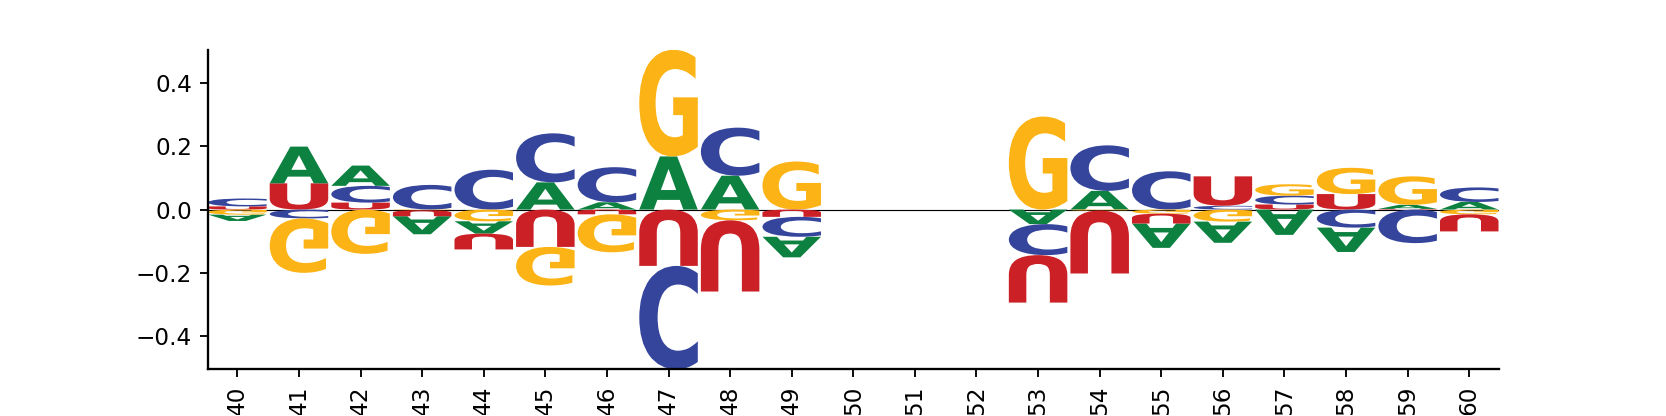

In [33]:
strong_atg_uorfs = uorf_comparison[(uorf_comparison['-log10(p)'] >= -1*np.log10(0.05))&(uorf_comparison['log2 odds ratio'] >= 1)&(uorf_comparison['Start Codon'] == 'ATG')].copy()
strong_freqs = np.array(np.sum(strong_atg_uorfs['Windowed Encoding'].tolist(), axis=0))

strong_sums = np.array(np.sum(strong_freqs, axis=1)).reshape(103, 1)

strong_pcts = np.around(np.divide(strong_freqs, strong_sums), decimals=3)

weak_atg_uorfs = uorf_comparison[(uorf_comparison['-log10(p)'] >= -1*np.log10(0.05))&(uorf_comparison['log2 odds ratio'] <= -1)&(uorf_comparison['Start Codon'] == 'ATG')].copy()
weak_freqs = np.array(np.sum(weak_atg_uorfs['Windowed Encoding'].tolist(), axis=0))

weak_sums = np.array(np.sum(weak_freqs, axis=1)).reshape(103, 1)

weak_pcts = np.around(np.divide(weak_freqs, weak_sums), decimals=3)

atg_differential_pcts = strong_pcts - weak_pcts

crp_df = pd.DataFrame(atg_differential_pcts, columns=['A', 'U', 'G', 'C'])

# create Logo object
ax2 = logomaker.Logo(crp_df.loc[40:60], color_scheme = {'A':'#0c8140', 'C':'#35459c', 'G':'#fcb316', 'U':'#cb2026'})

# style using Logo methods
ax2.style_spines(visible=False)
ax2.style_spines(spines=['left', 'bottom'], visible=True)
ax2.style_xticks(rotation=90, fmt='%d', anchor=0)
plt.show()

<IPython.core.display.Javascript object>


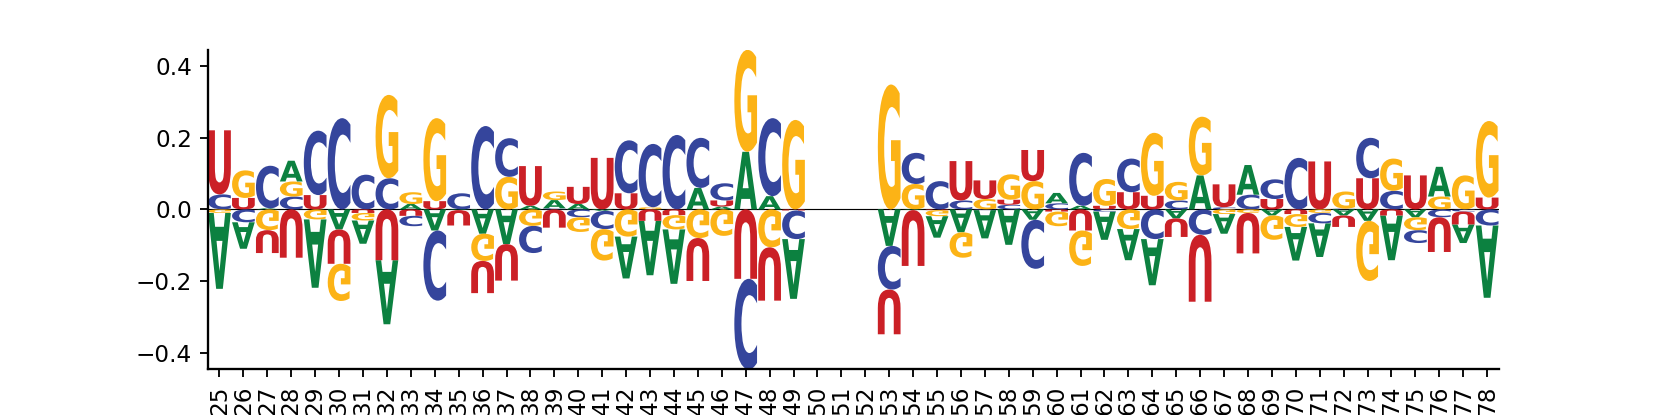

In [34]:
strong_atg_uorfs = uorf_comparison[(uorf_comparison['-log10(p)'] >= -1*np.log10(0.05))&(uorf_comparison['Binary Label'] == 1)&(uorf_comparison['log2 odds ratio'] >= 1)&(uorf_comparison['Start Codon'] == 'ATG')].copy()
strong_freqs = np.array(np.sum(strong_atg_uorfs['Windowed Encoding'].tolist(), axis=0))

strong_sums = np.array(np.sum(strong_freqs, axis=1)).reshape(103, 1)

strong_pcts = np.around(np.divide(strong_freqs, strong_sums), decimals=3)

weak_atg_uorfs = uorf_comparison[(uorf_comparison['-log10(p)'] >= -1*np.log10(0.05))&(uorf_comparison['Binary Label'] == 0)&(uorf_comparison['log2 odds ratio'] <= -1)&(uorf_comparison['Start Codon'] == 'ATG')].copy()
weak_freqs = np.array(np.sum(weak_atg_uorfs['Windowed Encoding'].tolist(), axis=0))

weak_sums = np.array(np.sum(weak_freqs, axis=1)).reshape(103, 1)

weak_pcts = np.around(np.divide(weak_freqs, weak_sums), decimals=3)

atg_differential_pcts = strong_pcts - weak_pcts

crp_df = pd.DataFrame(atg_differential_pcts, columns=['A', 'U', 'G', 'C'])

# create Logo object
ax2 = logomaker.Logo(crp_df.loc[25:78], color_scheme = {'A':'#0c8140', 'C':'#35459c', 'G':'#fcb316', 'U':'#cb2026'})

# style using Logo methods
ax2.style_spines(visible=False)
ax2.style_spines(spines=['left', 'bottom'], visible=True)
ax2.style_xticks(rotation=90, fmt='%d', anchor=0)
plt.show()

<IPython.core.display.Javascript object>


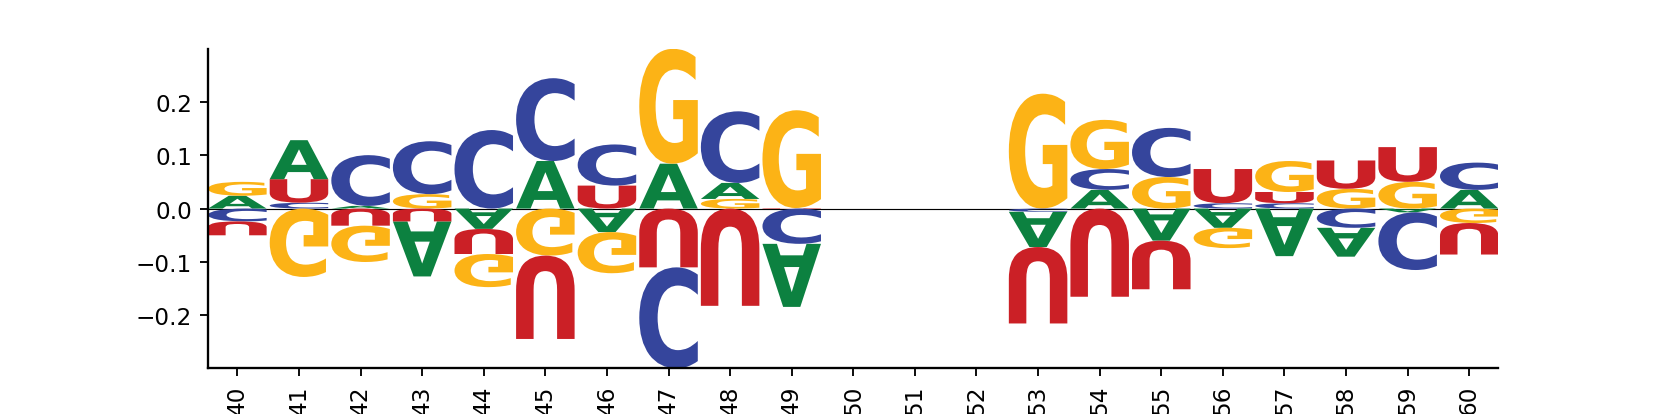

In [253]:
strong_atg_uorfs = uorf_comparison[(uorf_comparison['-log10(p)'] >= -1*np.log10(0.05))&(uorf_comparison['log2 odds ratio'] >= 1)&(uorf_comparison['Start Codon'] == 'ATG')].copy()
strong_freqs = np.array(np.sum(strong_atg_uorfs['Windowed Encoding'].tolist(), axis=0))

strong_sums = np.array(np.sum(strong_freqs, axis=1)).reshape(103, 1)

strong_pcts = np.around(np.divide(strong_freqs, strong_sums), decimals=3)

weak_atg_uorfs = uorf_comparison[(uorf_comparison['Binary Label'] == 0)&(uorf_comparison['Start Codon'] == 'ATG')].copy()
weak_freqs = np.array(np.sum(weak_atg_uorfs['Windowed Encoding'].tolist(), axis=0))

weak_sums = np.array(np.sum(weak_freqs, axis=1)).reshape(103, 1)

weak_pcts = np.around(np.divide(weak_freqs, weak_sums), decimals=3)

atg_differential_pcts = strong_pcts - weak_pcts

crp_df = pd.DataFrame(atg_differential_pcts, columns=['A', 'U', 'G', 'C'])

# create Logo object
ax2 = logomaker.Logo(crp_df.loc[40:60], color_scheme = {'A':'#0c8140', 'C':'#35459c', 'G':'#fcb316', 'U':'#cb2026'})

# style using Logo methods
ax2.style_spines(visible=False)
ax2.style_spines(spines=['left', 'bottom'], visible=True)
ax2.style_xticks(rotation=90, fmt='%d', anchor=0)
plt.show()

In [259]:
len(weak_atg_uorfs)

86

<IPython.core.display.Javascript object>


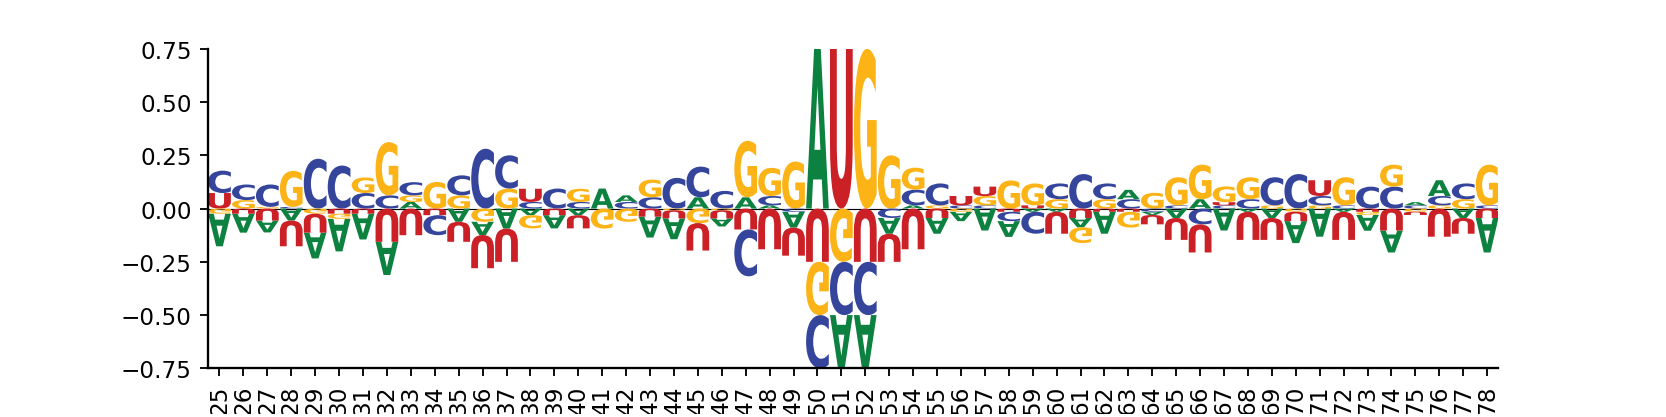

In [274]:
strong_atg_uorfs = uorf_comparison[(uorf_comparison['-log10(p)'] >= -1*np.log10(0.05))&(uorf_comparison['log2 odds ratio'] >= 1)&(uorf_comparison['Start Codon'] == 'ATG')].copy()
strong_freqs = np.array(np.sum(strong_atg_uorfs['Windowed Encoding'].tolist(), axis=0))

strong_sums = np.array(np.sum(strong_freqs, axis=1)).reshape(103, 1)

strong_pcts = np.around(np.divide(strong_freqs, strong_sums), decimals=3)

background_pcts = np.array([[0.25, 0.25, 0.25, 0.25]]*103)

uorf_pcts = strong_pcts - background_pcts

crp_df = pd.DataFrame(uorf_pcts, columns=['A', 'U', 'G', 'C'])

# create Logo object
ax2 = logomaker.Logo(crp_df.loc[25:78], color_scheme = {'A':'#0c8140', 'C':'#35459c', 'G':'#fcb316', 'U':'#cb2026'})

# style using Logo methods
ax2.style_spines(visible=False)
ax2.style_spines(spines=['left', 'bottom'], visible=True)
ax2.style_xticks(rotation=90, fmt='%d', anchor=0)
plt.show()

In [53]:
atg_differential_pcts[50:53] = np.array([[0.5, 0., 0., 0.],
       [0., 0.5, 0., 0.],
       [0., 0., 0.5, 0.]])
atg_differential_pcts

array([[ 0.001,  0.164, -0.005, -0.16 ],
       [-0.106,  0.088,  0.001,  0.016],
       [-0.028, -0.003,  0.154, -0.123],
       [-0.045,  0.094, -0.053,  0.004],
       [-0.038, -0.106,  0.067,  0.078],
       [ 0.032,  0.045,  0.   , -0.076],
       [-0.025,  0.085, -0.1  ,  0.04 ],
       [ 0.008, -0.05 ,  0.026,  0.015],
       [ 0.046,  0.057,  0.111, -0.215],
       [-0.091, -0.027, -0.005,  0.123],
       [-0.091,  0.137, -0.189,  0.141],
       [-0.078,  0.007,  0.041,  0.029],
       [-0.007, -0.026,  0.024,  0.009],
       [-0.023,  0.161, -0.068, -0.069],
       [-0.046, -0.006,  0.044,  0.007],
       [-0.004, -0.077,  0.048,  0.033],
       [-0.046,  0.073,  0.051, -0.078],
       [ 0.027, -0.018,  0.083, -0.092],
       [ 0.02 ,  0.078, -0.091, -0.008],
       [ 0.065, -0.038, -0.078,  0.05 ],
       [ 0.13 ,  0.   , -0.029, -0.101],
       [ 0.019, -0.02 ,  0.014, -0.014],
       [-0.019,  0.089, -0.066, -0.004],
       [ 0.009, -0.097, -0.003,  0.091],
       [ 0.055, 

<IPython.core.display.Javascript object>


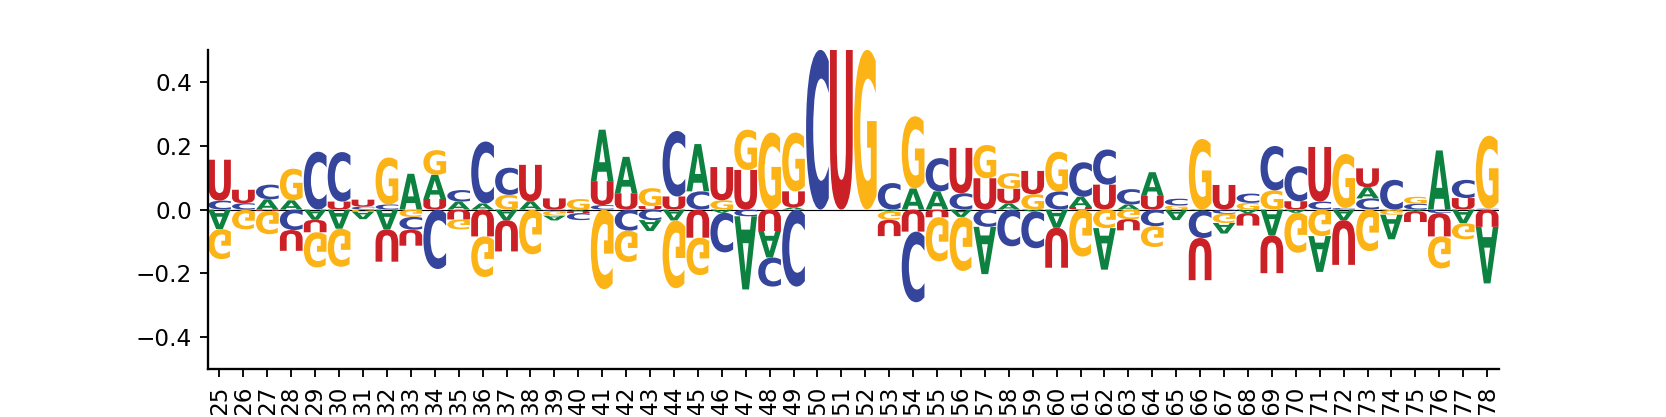

<IPython.core.display.Javascript object>


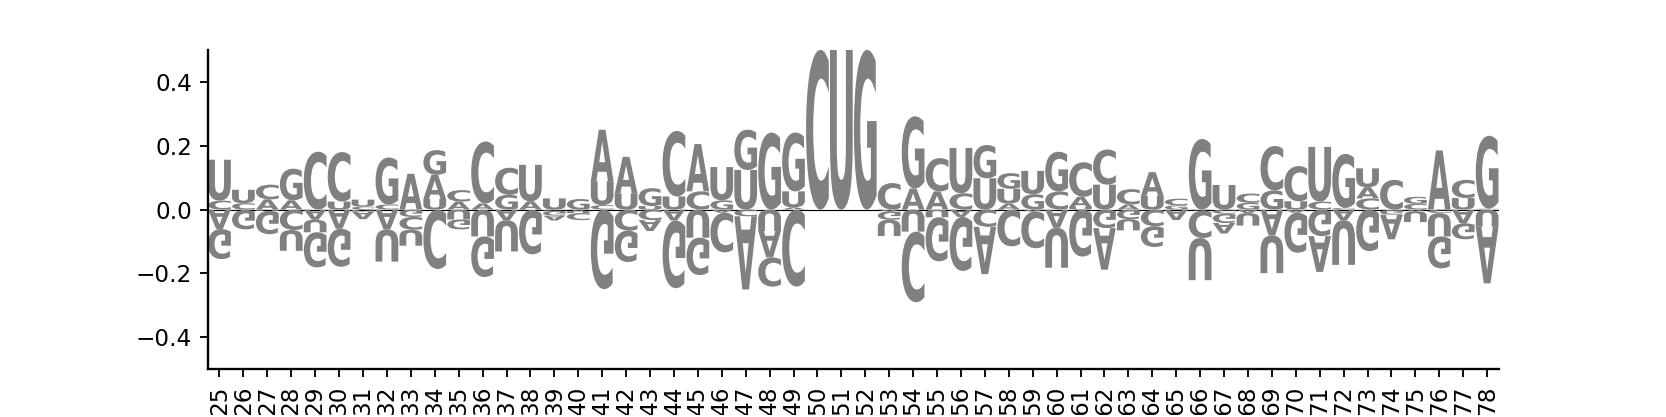

In [57]:
strong_atg_uorfs = uorf_comparison[(uorf_comparison['-log10(p)'] >= -1*np.log10(0.05))&(uorf_comparison['log2 odds ratio'] >= 1)&(uorf_comparison['Start Codon'] == 'ATG')].copy()
strong_freqs = np.array(np.sum(strong_atg_uorfs['Windowed Encoding'].tolist(), axis=0))

strong_sums = np.array(np.sum(strong_freqs, axis=1)).reshape(103, 1)

strong_pcts = np.around(np.divide(strong_freqs, strong_sums), decimals=3)

canon_orfs = atis_df[atis_df['Start Codon'] == 'ATG'].copy()
canon_freqs = np.array(np.sum(canon_orfs['Windowed Encoding'].tolist(), axis=0))

canon_sums = np.array(np.sum(canon_freqs, axis=1)).reshape(103, 1)

canon_pcts = np.around(np.divide(canon_freqs, canon_sums), decimals=3)

atg_differential_pcts = strong_pcts - canon_pcts
atg_differential_pcts[50:53] = np.array([[0., 0., 0., 0.5],
       [0., 0.5, 0., 0.],
       [0., 0., 0.5, 0.]])

crp_df = pd.DataFrame(atg_differential_pcts, columns=['A', 'U', 'G', 'C'])

# create Logo object
plt.close()
ax2 = logomaker.Logo(crp_df.loc[25:78], color_scheme = {'A':'#0c8140', 'C':'#35459c', 'G':'#fcb316', 'U':'#cb2026'})

# style using Logo methods
ax2.style_spines(visible=False)
ax2.style_spines(spines=['left', 'bottom'], visible=True)
ax2.style_xticks(rotation=90, fmt='%d', anchor=0)
ax2.ax.set_ylim(-0.5, 0.5)
plt.show()

plt.close()
ax2 = logomaker.Logo(crp_df.loc[25:78], color_scheme = {'A':'grey', 'C':'grey', 'G':'grey', 'U':'grey'})

# style using Logo methods
ax2.style_spines(visible=False)
ax2.style_spines(spines=['left', 'bottom'], visible=True)
ax2.style_xticks(rotation=90, fmt='%d', anchor=0)
ax2.ax.set_ylim(-0.5, 0.5)
plt.show()

<IPython.core.display.Javascript object>


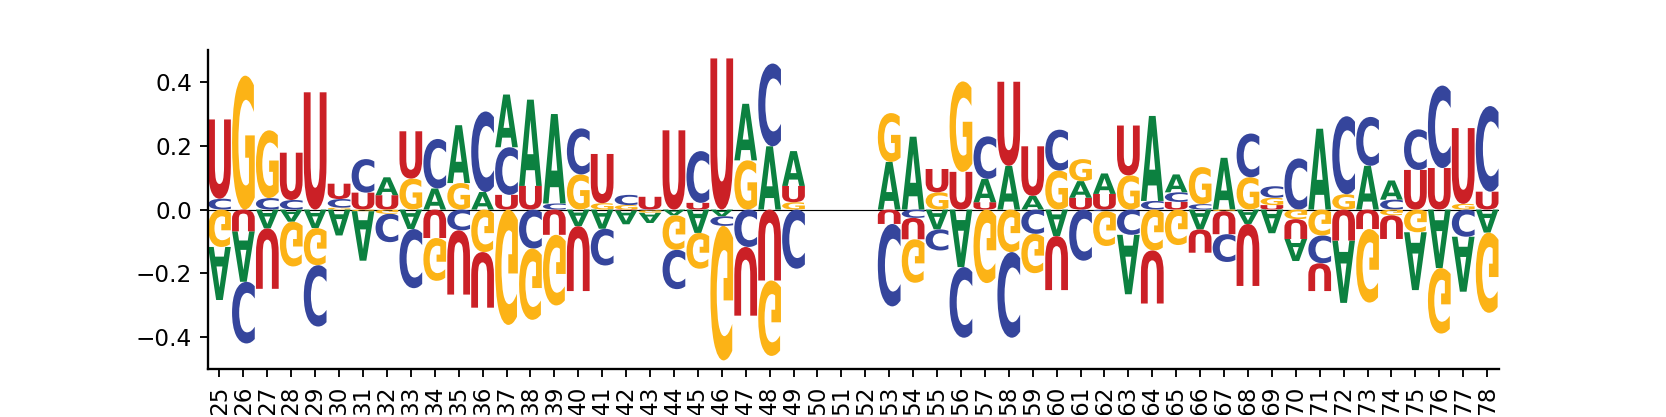

In [40]:
strong_ctg_uorfs = uorf_comparison[(uorf_comparison['Binary Label'] == 1)&(uorf_comparison['log2 odds ratio'] >= 1)&(uorf_comparison['Start Codon'] == 'CTG')].copy()
strong_freqs = np.array(np.sum(strong_ctg_uorfs['Windowed Encoding'].tolist(), axis=0))

strong_sums = np.array(np.sum(strong_freqs, axis=1)).reshape(103, 1)

strong_pcts = np.around(np.divide(strong_freqs, strong_sums), decimals=3)

weak_ctg_uorfs = uorf_comparison[(uorf_comparison['-log10(p)'] >= -1*np.log10(0.05))&(uorf_comparison['Binary Label'] == 0)&(uorf_comparison['log2 odds ratio'] <= -1)&(uorf_comparison['Start Codon'] == 'CTG')].copy()
weak_freqs = np.array(np.sum(weak_ctg_uorfs['Windowed Encoding'].tolist(), axis=0))

weak_sums = np.array(np.sum(weak_freqs, axis=1)).reshape(103, 1)

weak_pcts = np.around(np.divide(weak_freqs, weak_sums), decimals=3)

atg_differential_pcts = strong_pcts - weak_pcts

crp_df = pd.DataFrame(atg_differential_pcts, columns=['A', 'U', 'G', 'C'])

# create Logo object
ax2 = logomaker.Logo(crp_df.loc[25:78], color_scheme = {'A':'#0c8140', 'C':'#35459c', 'G':'#fcb316', 'U':'#cb2026'})

# style using Logo methods
ax2.style_spines(visible=False)
ax2.style_spines(spines=['left', 'bottom'], visible=True)
ax2.style_xticks(rotation=90, fmt='%d', anchor=0)
ax2.ax.set_ylim(-0.5, 0.5)
plt.show()

In [296]:
weak_ctg_uorfs

Transcript Gene Name  Chrom Strand Location on Transcript  \
5255  NM_001257191.3      DDX6  chr11      -                  5 UTR   
7102     NM_006813.3     PNRC1   chr6      +                  5 UTR   
7754  XM_047422596.1    CDKN2A   chr9      -                  5 UTR   
7557  NM_001076683.2      UBTF  chr17      -                  5 UTR   
8140  NM_001258006.2     COPS4   chr4      +                  5 UTR   
...              ...       ...    ...    ...                    ...   
993   NM_001378574.1     IARS1   chr9      -                  5 UTR   
754   NM_001369615.1     PCGF2  chr17      -                  5 UTR   
1023     NM_004539.4     NARS1  chr18      -                  5 UTR   
725   NM_001080415.2    U2SURP   chr3      +                  5 UTR   
1019  NM_001128917.2    TOMM40  chr19      +                  5 UTR   

     Start Codon Transcript Index   Coordinate  Label  \
5255         CTG            305.0  118786300.0   -5.0   
7102         CTG              4.0   89080754.0   -5.0   
7754         CTG            226.0   21971437.0   -5.0   
7557         CTG             85.0   44220796.0   -5.0   
8140         CTG             31.0   83035213.0   -5.0   
...          ...              ...          ...    ...   
993          CTG            110.0   92290858.0   -5.0   
754          CTG             92.0   38746535.0   -5.0   
1023         CTG             13.0   57621822.0   -5.0   
725          CTG             24.0  143001593.0   -5.0   
1019         CTG            123.0   44891376.0   -5.0   

                                            Genomic idx  \
5255  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
7102  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
7754  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
7557  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
8140  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
993   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
754   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1023  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
725   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1019  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
5255  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNG...   
7102  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
7754  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
7557  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
8140  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                 ...   
993   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
754   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1023  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
725   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1019  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
5255  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
7102  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
7754  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
7557  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
8140  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                 ...   
993   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
754   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1023  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
725   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1019  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
5255                         CTG             0   
7102                         CTG             0   
7754                         CTG             0   
7557                         CTG             0   
8140                         CTG             0   
...                          ...           ..

# For Figure 1

In [282]:
atis_df[atis_df['Label'] > 2]

Transcript Gene Name  Chrom Strand Location on Transcript  \
93    XM_047442189.1     GNL3L   chrX      +                   aTIS   
1649  NM_001130847.4     AIFM1   chrX      -                   aTIS   
953      NM_007062.3      PWP1  chr12      +                   aTIS   
2059  NM_001008800.3      CCT3   chr1      -                   aTIS   
3706  NM_001321968.2     ATAD1  chr10      -                   aTIS   
...              ...       ...    ...    ...                    ...   
485      NM_138809.4      CMBL   chr5      -                   aTIS   
52       NM_002117.6     HLA-C   chr6      -                   aTIS   
16       NM_198216.2     SNRPB  chr20      -                   aTIS   
473   NM_001040025.3     ARL16  chr17      -                   aTIS   
497      NM_000362.5     TIMP3  chr22      +                   aTIS   

     Start Codon Transcript Index   Coordinate     Label  \
93           ATG            131.0   54532566.0  6.044254   
1649         ATG            185.0  130165655.0  6.043443   
953          ATG            101.0  107685899.0  5.565459   
2059         ATG            108.0  156338183.0  5.461362   
3706         ATG             73.0   87814598.0  4.319935   
...          ...              ...          ...       ...   
485          ATG            297.0   10290761.0  3.684014   
52           ATG             21.0   31272070.0  4.405129   
16           ATG             99.0    2470689.0  3.439607   
473          ATG             44.0   81683752.0  5.125967   
497          ATG            297.0   32802001.0  5.097980   

                                            Genomic idx  \
93    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1649  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
953   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2059  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3706  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
485   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
52    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
16    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
473   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
497   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
93    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1649  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
953   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
2059  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
3706  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                 ...   
485   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
52    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
16    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
473   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
497   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
93    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1649  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
953   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
2059  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
3706  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                 ...   
485   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
52    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
16    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
473   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
497   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
93                           ATG             1   
1649                         ATG             1   
953                          ATG             1   
2059                         ATG             1   
3706                         ATG             1   
...      

<IPython.core.display.Javascript object>


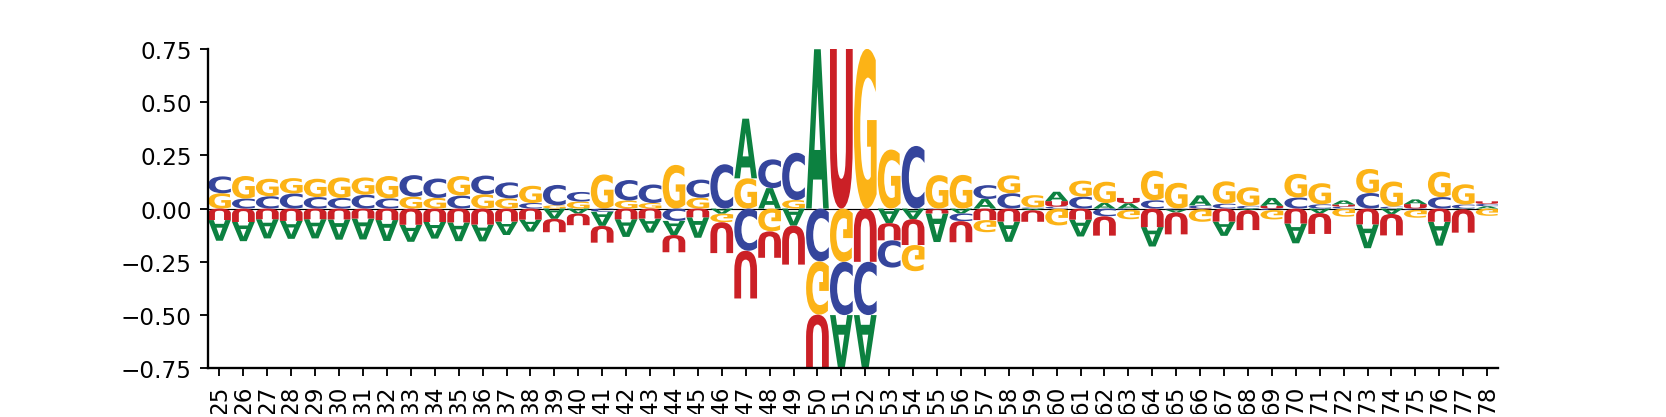

In [283]:
strong_atg_uorfs = atis_df[atis_df['Label'] > 2].copy()
strong_freqs = np.array(np.sum(strong_atg_uorfs['Windowed Encoding'].tolist(), axis=0))

strong_sums = np.array(np.sum(strong_freqs, axis=1)).reshape(103, 1)

strong_pcts = np.around(np.divide(strong_freqs, strong_sums), decimals=3)

background_pcts = np.array([[0.25, 0.25, 0.25, 0.25]]*103)

uorf_pcts = strong_pcts - background_pcts

crp_df = pd.DataFrame(uorf_pcts, columns=['A', 'U', 'G', 'C'])

# create Logo object
ax2 = logomaker.Logo(crp_df.loc[25:78], color_scheme = {'A':'#0c8140', 'C':'#35459c', 'G':'#fcb316', 'U':'#cb2026'})

# style using Logo methods
ax2.style_spines(visible=False)
ax2.style_spines(spines=['left', 'bottom'], visible=True)
ax2.style_xticks(rotation=90, fmt='%d', anchor=0)
plt.show()

<IPython.core.display.Javascript object>


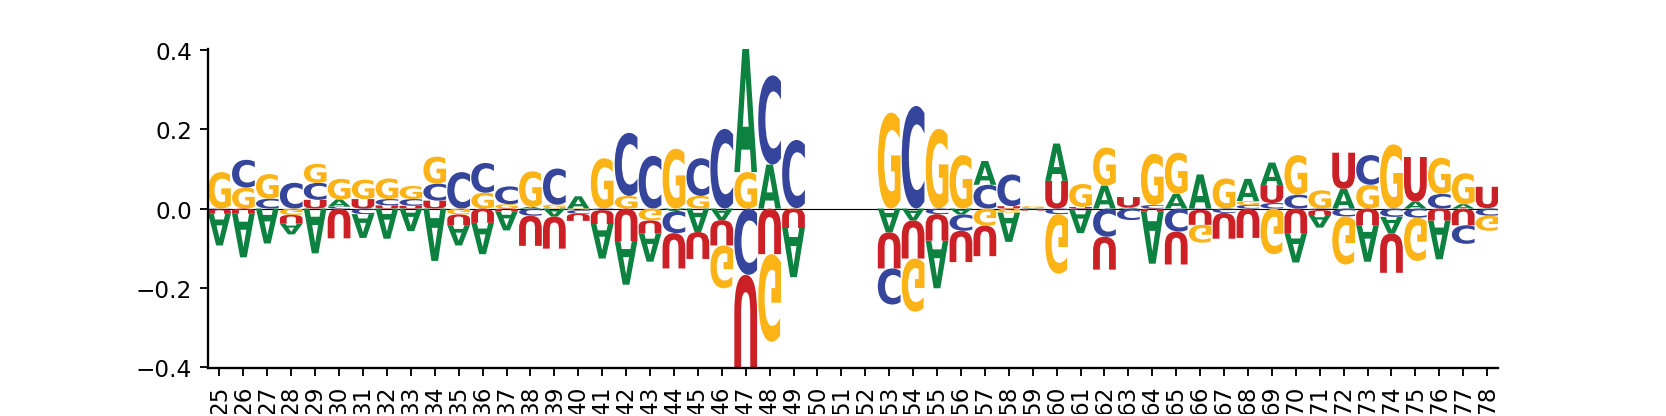

In [290]:
strong_atg_uorfs = atis_df[(atis_df['Label'] > 2)&(atis_df['Start Codon'] == 'ATG')].copy()
strong_freqs = np.array(np.sum(strong_atg_uorfs['Windowed Encoding'].tolist(), axis=0))

strong_sums = np.array(np.sum(strong_freqs, axis=1)).reshape(103, 1)

strong_pcts = np.around(np.divide(strong_freqs, strong_sums), decimals=3)

weak_atg_uorfs = violin_df[(violin_df['Start Codon'] == 'ATG')&(violin_df['Label'] == -5)].copy()
weak_freqs = np.array(np.sum(weak_atg_uorfs['Windowed Encoding'].tolist(), axis=0))

weak_sums = np.array(np.sum(weak_freqs, axis=1)).reshape(103, 1)

weak_pcts = np.around(np.divide(weak_freqs, weak_sums), decimals=3)

atg_differential_pcts = strong_pcts - weak_pcts

crp_df = pd.DataFrame(atg_differential_pcts, columns=['A', 'U', 'G', 'C'])

# create Logo object
ax2 = logomaker.Logo(crp_df.loc[25:78], color_scheme = {'A':'#0c8140', 'C':'#35459c', 'G':'#fcb316', 'U':'#cb2026'})

# style using Logo methods
ax2.style_spines(visible=False)
ax2.style_spines(spines=['left', 'bottom'], visible=True)
ax2.style_xticks(rotation=90, fmt='%d', anchor=0)
plt.show()

In [288]:
violin_df[(violin_df['Start Codon'] == 'ATG')&(violin_df['Label'] == -5)]

Transcript Gene Name  Chrom Strand Location on Transcript  \
7995  NM_001178032.3     ZC4H2   chrX      -                  5 UTR   
6892  NM_001290310.3    CTNNA1   chr5      +                  5 UTR   
7046  NM_001289745.3     GAPDH  chr12      +                  5 UTR   
6559  XM_047423829.1     TRAF2   chr9      +                  5 UTR   
5886  NM_001258437.1     TARS1   chr5      +                  5 UTR   
...              ...       ...    ...    ...                    ...   
766      NM_005979.3   S100A13   chr1      -                  5 UTR   
579   NM_001378574.1     IARS1   chr9      -                  5 UTR   
1021     NM_021203.4     SRPRB   chr3      +                  5 UTR   
712   NM_001243399.2     GLRX2   chr1      -                  5 UTR   
1063  NM_001194954.2     MATR3   chr5      +                  5 UTR   

     Start Codon Transcript Index   Coordinate  Label  \
7995         ATG            208.0   64922147.0   -5.0   
6892         ATG            101.0  138781937.0   -5.0   
7046         ATG            124.0    6534640.0   -5.0   
6559         ATG            184.0  136890465.0   -5.0   
5886         ATG              0.0   33440695.0   -5.0   
...          ...              ...          ...    ...   
766          ATG             71.0  153628178.0   -5.0   
579          ATG            122.0   92290846.0   -5.0   
1021         ATG            193.0  133805746.0   -5.0   
712          ATG            139.0  193105917.0   -5.0   
1063         ATG             91.0  139279050.0   -5.0   

                                            Genomic idx  \
7995  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
6892  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
7046  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
6559  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
5886  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
766   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
579   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1021  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
712   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1063  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
7995  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
6892  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
7046  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
6559  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
5886  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                 ...   
766   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
579   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1021  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
712   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1063  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
7995  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
6892  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
7046  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
6559  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
5886  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                 ...   
766   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
579   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1021  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
712   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1063  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
7995                         ATG             0   
6892                         ATG             0   
7046                         ATG             0   
6559                         ATG             0   
5886                         ATG             0   
...                          ...           ..

In [285]:
atis_df['Start Codon'].value_counts()

Start Codon
ATG    2356
CTG       4
GTG       1
Name: count, dtype: int64

In [286]:
atis_df[atis_df['Start Codon'] == 'CTG']

Transcript Gene Name  Chrom Strand Location on Transcript  \
2376  NM_001386393.1     PANK2  chr20      +                   aTIS   
3453  NM_001098504.2     DDX17  chr22      -                   aTIS   
2110  NM_001301650.2    R3HCC1   chr8      +                   aTIS   
35    NM_001040011.2      SWI5   chr9      +                   aTIS   

     Start Codon Transcript Index   Coordinate     Label  \
2376         CTG             44.0    3889430.0  4.984391   
3453         CTG             74.0   38506236.0  3.904229   
2110         CTG             68.0   23288523.0  4.125947   
35           CTG             65.0  128276340.0  3.305520   

                                            Genomic idx  \
2376  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3453  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2110  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
35    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
2376  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
3453  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
2110  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
35    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
2376  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
3453  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
2110  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
35    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
2376                         CTG             1   
3453                         CTG             1   
2110                         CTG             1   
35                           CTG             1   

                                      Windowed Encoding  \
2376  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
3453  [[0, 0, 1, 0], [0, 0, 1, 0], [1, 0, 0, 0], [1,...   
2110  [[0, 0, 0, 1], [0, 0, 1, 0], [1, 0, 0, 0], [0,...   
35    [[0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0,...   

                                           Windowed Seq    pred 0    pred 1  \
2376  NNNNNNGCTCTGGCTGGACTGCCGCGGAGGAGGCGAGAAGGAATCC...  0.573724  0.689428   
3453  GGAAGGAGACGCCTAAACCGCGGCACTGCCCGGTTTGAGCGTAGCC...  0.794814  0.762125   
2110  CGAGGGCGGCTGCGACGCGCCGAGAGGCCGCGGCTCTCCCACCTGT...  0.968772  0.960228   
35    TCAGAGTTCCTGGCCCGGTGCACCTGAGAGGTCGCTCTCCGACTCC...  0.931783  0.856168   

        pred 2    pred 3    pred 4      pred                   ORF type  \
2376  0.862791  0.873719  0.841325  0.768197  annotated initiation site   
3453  0.848289  0.709557  0.876551  0.798267  annotated initiation site   
2110  0.941019  0.943512  0.970254  0.956757  annotated initiation site   
35    0.942389  0.896537  0.951428  0.915661  annotated initiation site   

      log odds                                          odds list  
2376  1.198160  [1.3458968238165658, 2.219862517075972, 6.2881...  
3453  1.375498  [3.873620969227185, 3.2038804396415035, 5.5914...  
2110  3.096715  [31.02290456621615, 24.143597060198783, 15.954...  
35    2.384804  [13.659196633592082, 5.95256305380055, 16.3579...

In [303]:
encoded_data_full = pickle.load(open('/projects/b1080/jc/rna_translation_initiation_dl_model/all_coding_genes_aim1_preds.pkl', 'rb'))

In [39]:
aug_atis= atis_df[atis_df['Start Codon'] == 'ATG'].copy()
aug_atis

Transcript Gene Name  Chrom Strand Location on Transcript  \
93    XM_047442189.1     GNL3L   chrX      +                   aTIS   
1649  NM_001130847.4     AIFM1   chrX      -                   aTIS   
953      NM_007062.3      PWP1  chr12      +                   aTIS   
2974     NM_024026.5    MRPL57  chr13      +                   aTIS   
2059  NM_001008800.3      CCT3   chr1      -                   aTIS   
...              ...       ...    ...    ...                    ...   
485      NM_138809.4      CMBL   chr5      -                   aTIS   
52       NM_002117.6     HLA-C   chr6      -                   aTIS   
16       NM_198216.2     SNRPB  chr20      -                   aTIS   
473   NM_001040025.3     ARL16  chr17      -                   aTIS   
497      NM_000362.5     TIMP3  chr22      +                   aTIS   

     Start Codon Transcript Index   Coordinate     Label  \
93           ATG            131.0   54532566.0  6.044254   
1649         ATG            185.0  130165655.0  6.043443   
953          ATG            101.0  107685899.0  5.565459   
2974         ATG             65.0   21176916.0  1.334537   
2059         ATG            108.0  156338183.0  5.461362   
...          ...              ...          ...       ...   
485          ATG            297.0   10290761.0  3.684014   
52           ATG             21.0   31272070.0  4.405129   
16           ATG             99.0    2470689.0  3.439607   
473          ATG             44.0   81683752.0  5.125967   
497          ATG            297.0   32802001.0  5.097980   

                                            Genomic idx  \
93    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1649  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
953   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2974  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2059  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
485   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
52    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
16    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
473   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
497   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
93    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1649  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
953   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
2974  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
2059  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                 ...   
485   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
52    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
16    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
473   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
497   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
93    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1649  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
953   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
2974  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
2059  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                 ...   
485   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
52    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
16    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
473   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
497   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
93                           ATG             1   
1649                         ATG             1   
953                          ATG             1   
2974                         ATG             1   
2059                         ATG             1   
...      

In [40]:
aug_atis['6p G'] = aug_atis['Windowed Seq'].apply(lambda x: 1 if x[44] == 'G' else 0)
aug_atis['5p C'] = aug_atis['Windowed Seq'].apply(lambda x: 1 if x[45] == 'C' else 0)
aug_atis['4p C'] = aug_atis['Windowed Seq'].apply(lambda x: 1 if x[46] == 'C' else 0)
aug_atis['3p P'] = aug_atis['Windowed Seq'].apply(lambda x: 1 if (x[47] == 'G')|(x[47]=='A') else 0)
aug_atis['2p C'] = aug_atis['Windowed Seq'].apply(lambda x: 1 if x[48] == 'C' else 0)
aug_atis['1p C'] = aug_atis['Windowed Seq'].apply(lambda x: 1 if x[49] == 'C' else 0)
aug_atis['4d G'] = aug_atis['Windowed Seq'].apply(lambda x: 1 if x[53] == 'G' else 0)

In [41]:
aug_atis['Windowed Seq'].apply(lambda x: x[44:54])

93      GTCATCATGA
1649    GCCGAAATGT
953     AGGACCATGA
2974    GGCACCATGT
2059    GTCGCCATGA
           ...    
485     TCTGCAATGG
52      GCCGAGATGC
16      GCCACCATGA
473     CACGGAATGT
497     GCGGCAATGA
Name: Windowed Seq, Length: 2356, dtype: object

In [313]:
aug_atis

Transcript Gene Name  Chrom Strand Location on Transcript  \
93    XM_047442189.1     GNL3L   chrX      +                   aTIS   
1649  NM_001130847.4     AIFM1   chrX      -                   aTIS   
953      NM_007062.3      PWP1  chr12      +                   aTIS   
2974     NM_024026.5    MRPL57  chr13      +                   aTIS   
2059  NM_001008800.3      CCT3   chr1      -                   aTIS   
...              ...       ...    ...    ...                    ...   
485      NM_138809.4      CMBL   chr5      -                   aTIS   
52       NM_002117.6     HLA-C   chr6      -                   aTIS   
16       NM_198216.2     SNRPB  chr20      -                   aTIS   
473   NM_001040025.3     ARL16  chr17      -                   aTIS   
497      NM_000362.5     TIMP3  chr22      +                   aTIS   

     Start Codon Transcript Index   Coordinate     Label  \
93           ATG            131.0   54532566.0  6.044254   
1649         ATG            185.0  130165655.0  6.043443   
953          ATG            101.0  107685899.0  5.565459   
2974         ATG             65.0   21176916.0  1.334537   
2059         ATG            108.0  156338183.0  5.461362   
...          ...              ...          ...       ...   
485          ATG            297.0   10290761.0  3.684014   
52           ATG             21.0   31272070.0  4.405129   
16           ATG             99.0    2470689.0  3.439607   
473          ATG             44.0   81683752.0  5.125967   
497          ATG            297.0   32802001.0  5.097980   

                                            Genomic idx  \
93    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1649  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
953   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2974  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2059  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
485   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
52    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
16    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
473   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
497   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
93    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1649  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
953   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
2974  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
2059  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                 ...   
485   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
52    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
16    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
473   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
497   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
93    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1649  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
953   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
2974  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
2059  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                 ...   
485   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
52    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
16    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
473   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
497   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
93                           ATG             1   
1649                         ATG             1   
953                          ATG             1   
2974                         ATG             1   
2059                         ATG             1   
...      

In [42]:
windows = ['6p G', '5p C', '4p C', '3p P', '2p C', '1p C', '4d G']
wo_feat = {k: [] for k in windows}
w_feat = {k: [] for k in windows}

for w in windows:
    for i in range(len(aug_atis)):
        if aug_atis[w].iloc[i] == 0:
            wo_feat[w].append(aug_atis['log odds'].iloc[i])
        elif aug_atis[w].iloc[i] == 1:
            w_feat[w].append(aug_atis['log odds'].iloc[i])

<IPython.core.display.Javascript object>


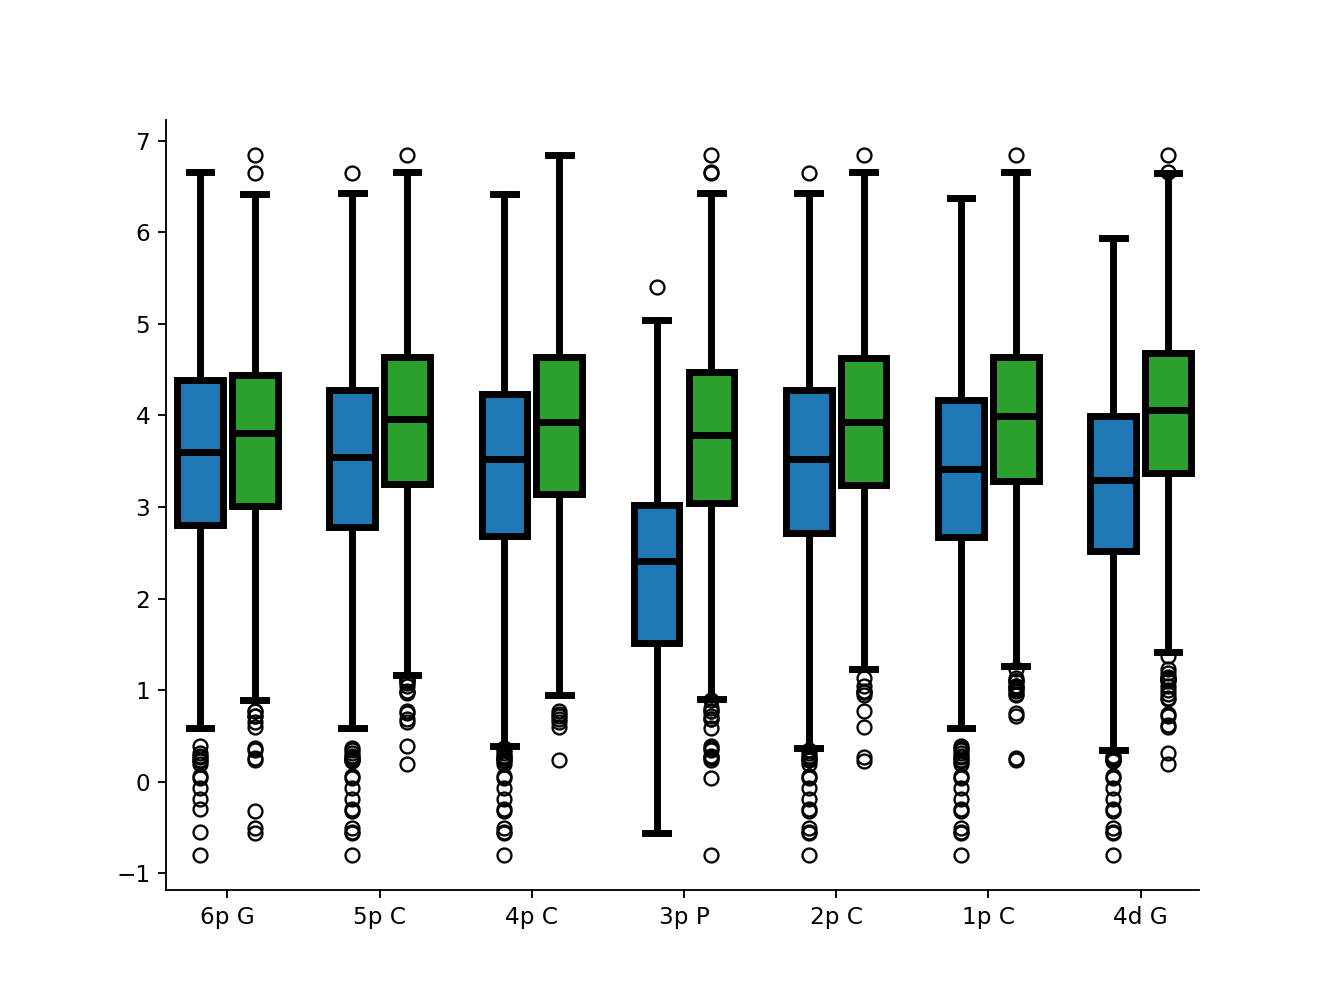

In [47]:
#FIGURE IS MADE USING 500 BP Model
x = list(w_feat.keys())
y1 = list(wo_feat.values())
y2 = list(w_feat.values())

plt.close()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
box1 = axs.boxplot(y1,
            positions = [0.82, 1.82, 2.82, 3.82, 4.82, 5.82, 6.82],
            boxprops=dict(color='black', linewidth=3),
            whiskerprops=dict(color='black', linewidth=3),
            capprops=dict(color='black', linewidth=3),
            medianprops={'color': 'black', 'linewidth':3},
            showfliers=True,
            widths=0.3,
            label = 'Aim 1',
            patch_artist=True)
box2 = axs.boxplot(y2,
            positions = [1.18, 2.18, 3.18, 4.18, 5.18, 6.18, 7.18],
            boxprops=dict(color='black', linewidth=3),
            whiskerprops=dict(color='black', linewidth=3),
            capprops=dict(color='black', linewidth=3),
            medianprops={'color': 'black', 'linewidth':3},
            showfliers=True,
            widths=0.3,
            label='Aim 2',
            patch_artist=True)

for patch in box1['boxes']:
    patch.set_facecolor('tab:blue')
for patch in box2['boxes']:
    patch.set_facecolor('tab:green')

axs.set_xticks([1, 2, 3, 4, 5, 6, 7], labels=windows)
#axs.set_ylim(0.5, 1)
axs.set_xlim(0.6, 7.38)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
#plt.legend()
#plt.legend(bbox_to_anchor = (0.6,1))
plt.show()

<IPython.core.display.Javascript object>


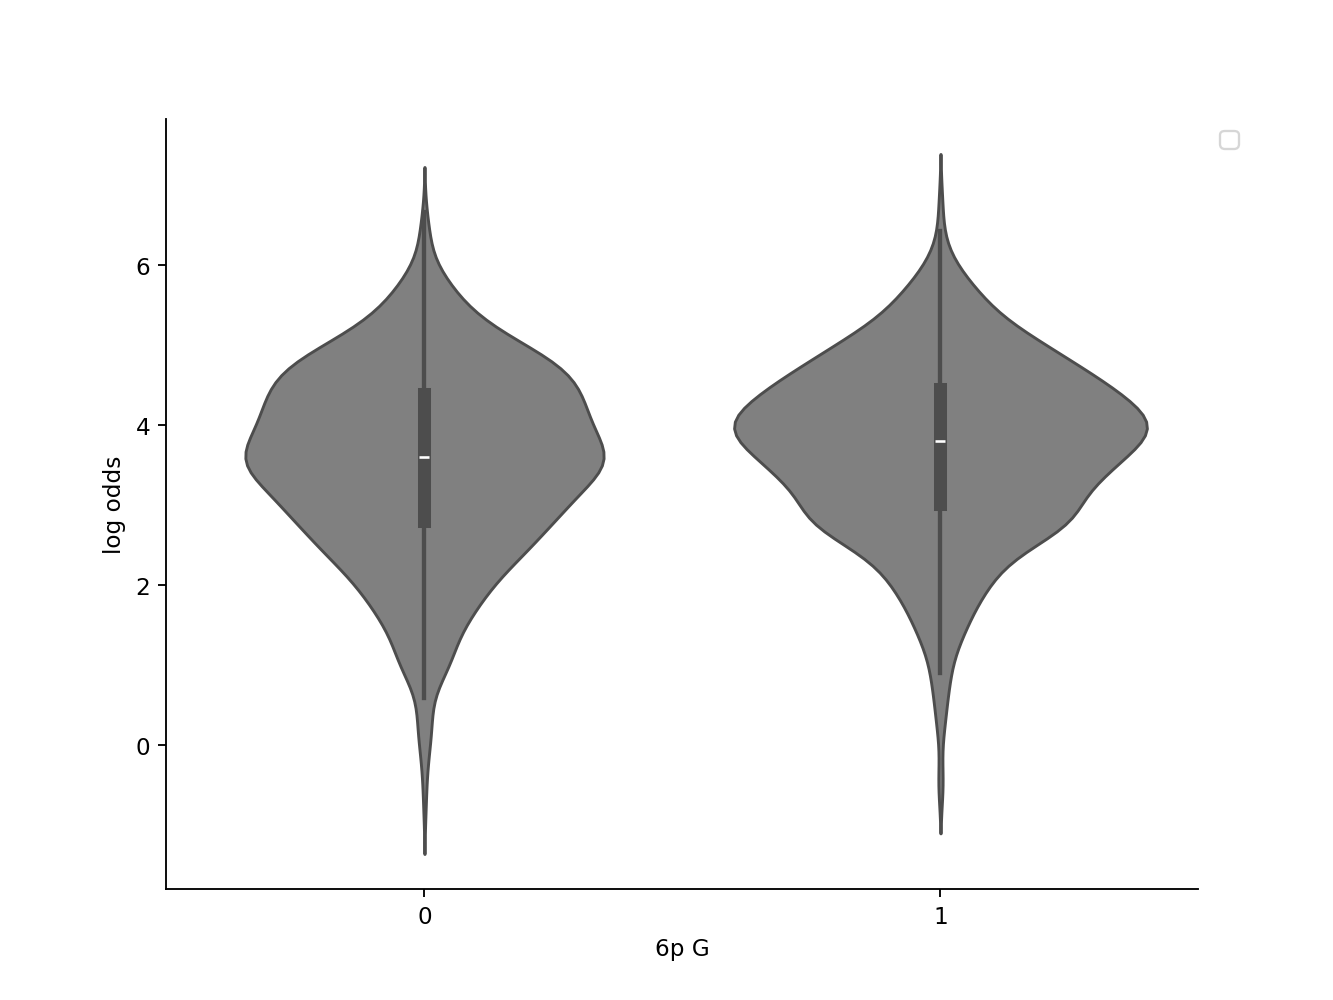

<IPython.core.display.Javascript object>


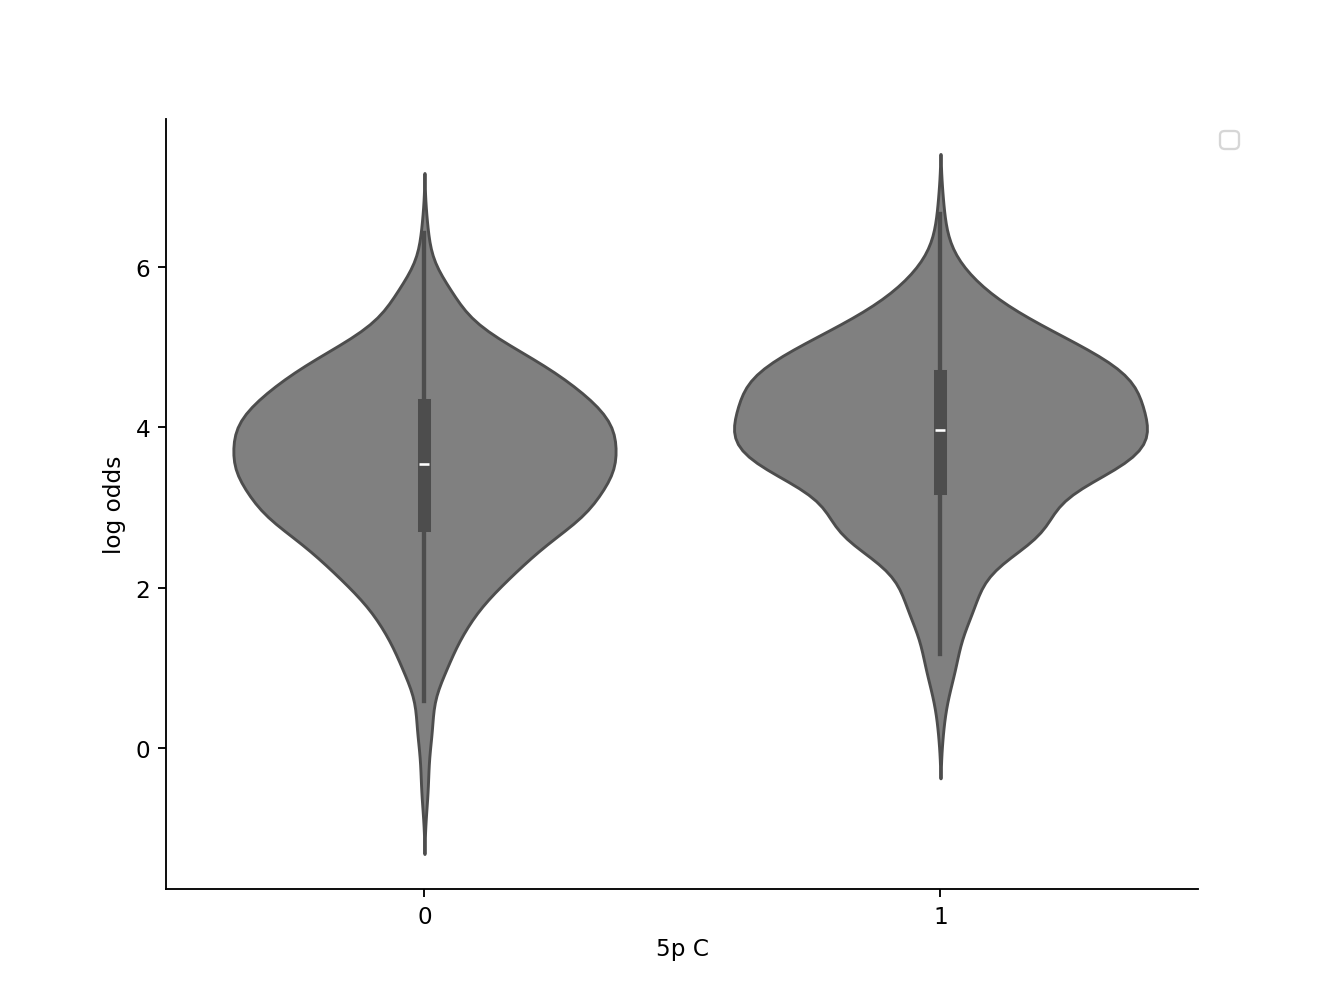

<IPython.core.display.Javascript object>


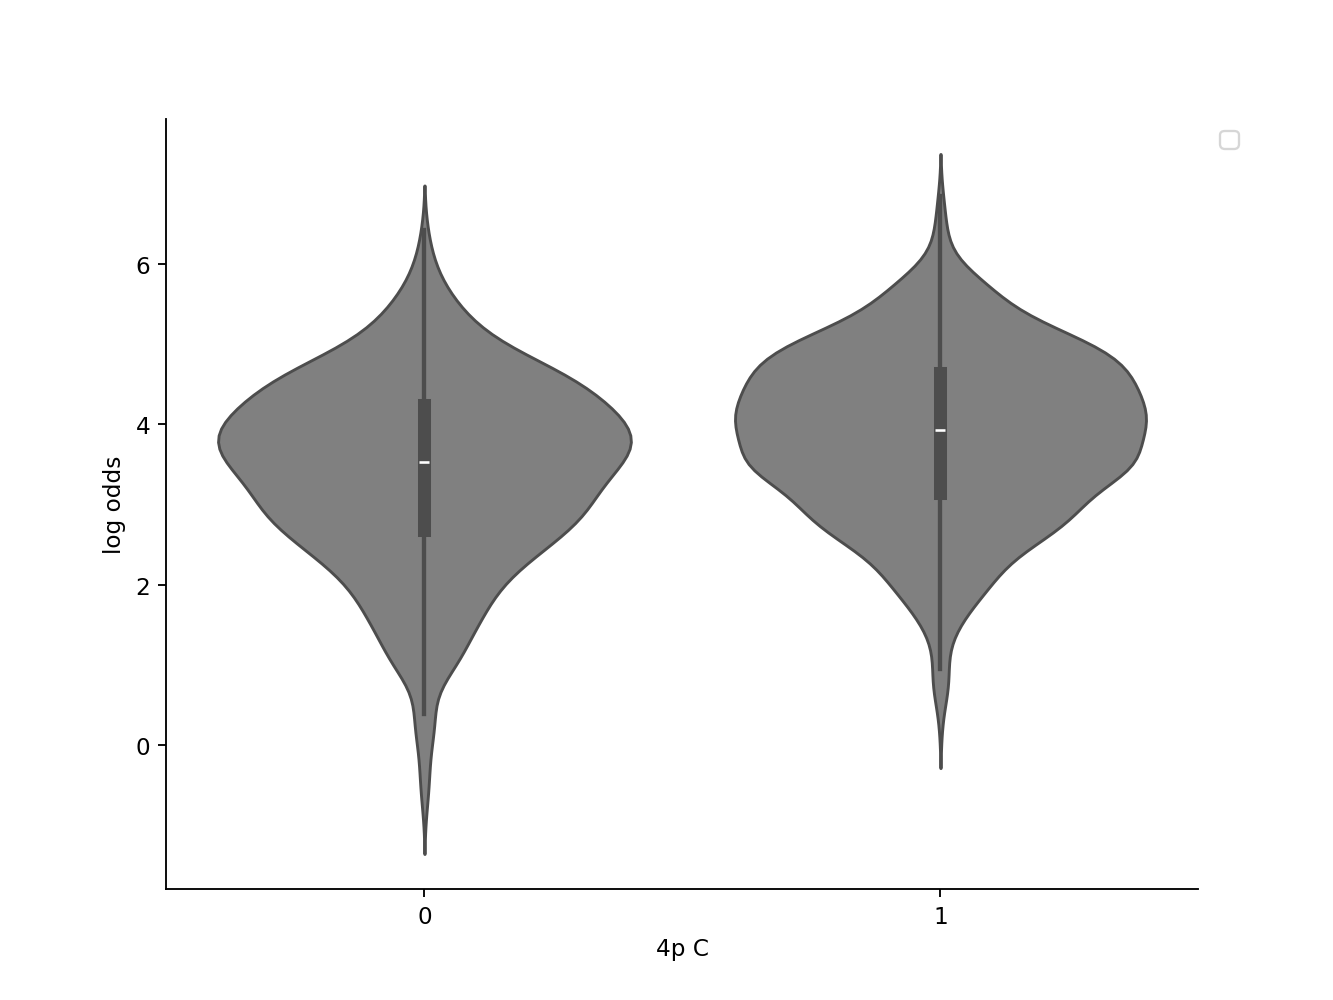

<IPython.core.display.Javascript object>


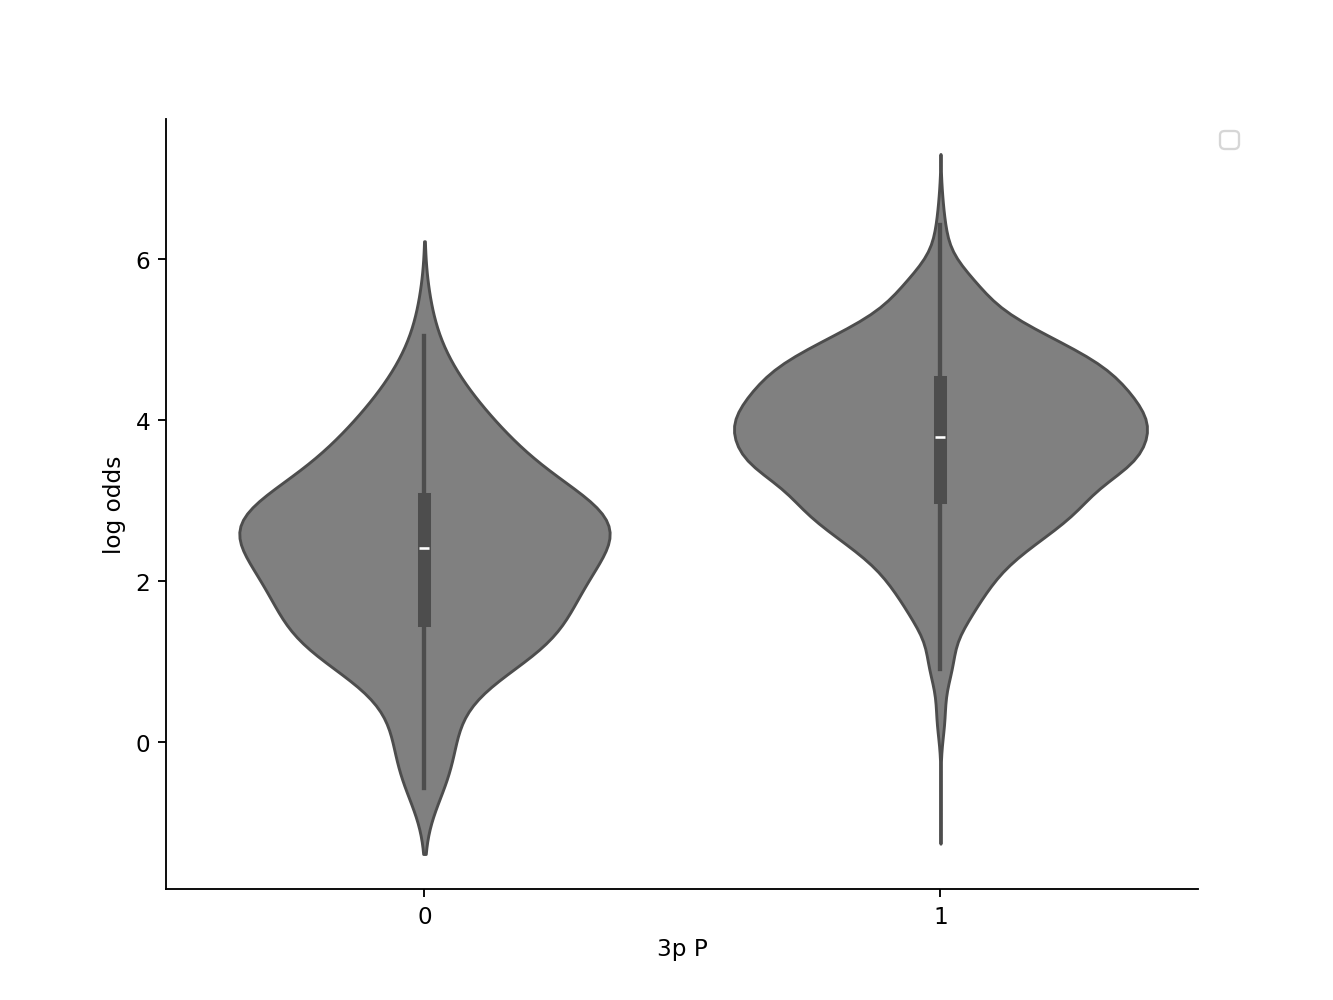

<IPython.core.display.Javascript object>


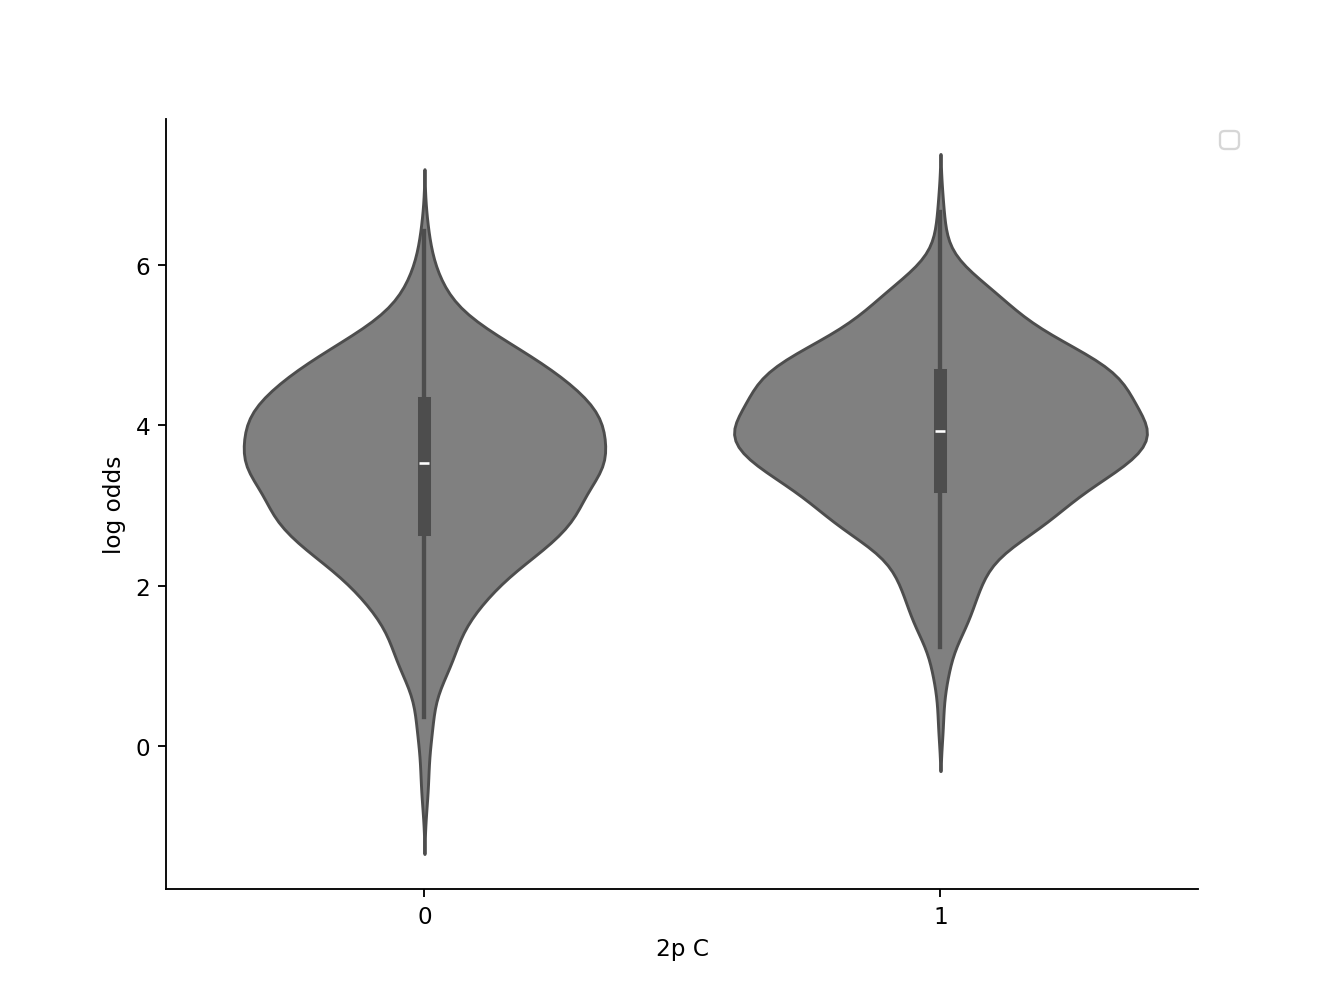

<IPython.core.display.Javascript object>


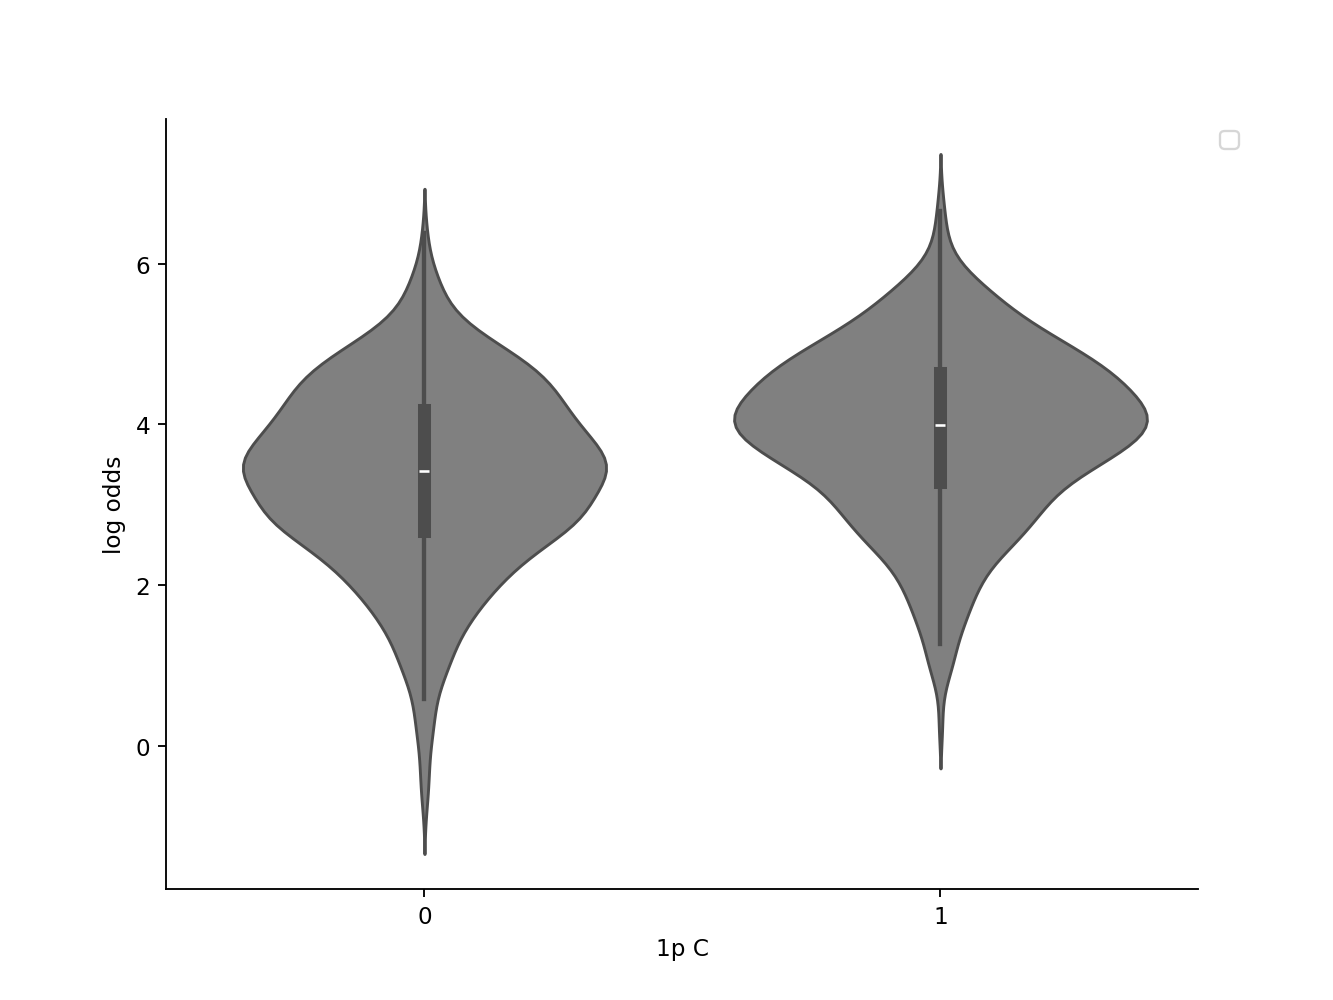

<IPython.core.display.Javascript object>


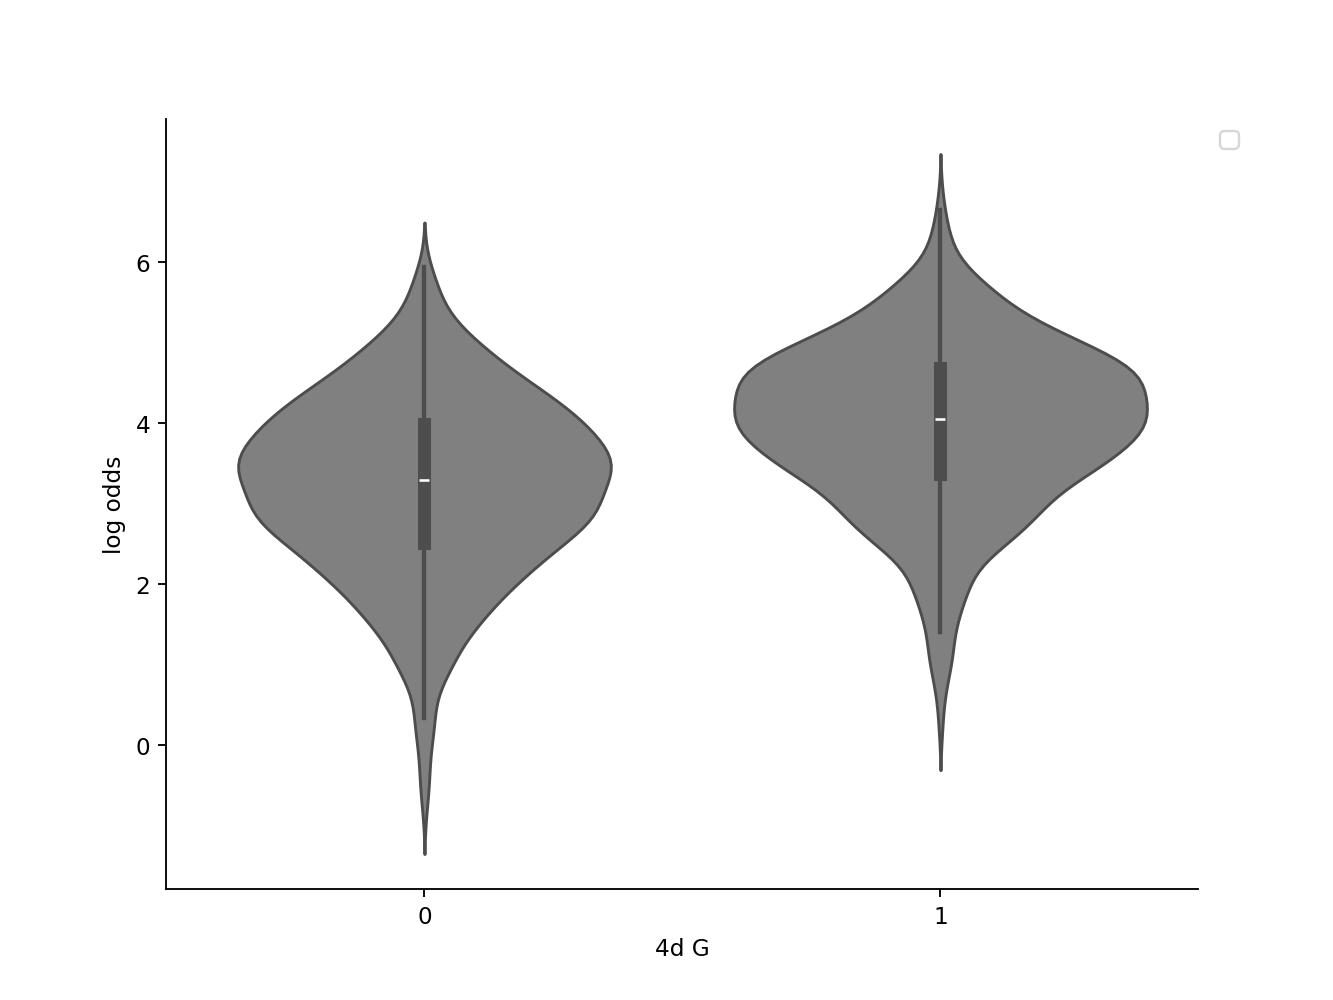

In [326]:
for w in windows:
    plt.close()
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    sns.violinplot(data=aug_atis, x=w, y="log odds", color='grey')
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    plt.legend()
    plt.legend(bbox_to_anchor = (1.05,1))
    plt.show()

In [328]:
for w in windows:
    print(stats.ttest_ind(a=w_feat[w], b=wo_feat[w], equal_var=True)[1])

0.0001768893208414266
4.445256564821421e-16
7.19467977292119e-23
6.559123454489611e-63
1.27952511800484e-19
3.0432009633684317e-32
9.049724666238737e-64


In [336]:
dataset

Transcript Gene Name   Chrom  Strand Location on Transcript  \
93     XM_047442189.1     GNL3L    chrX       +                   aTIS   
9385           random    random  random  random                 random   
1649   NM_001130847.4     AIFM1    chrX       -                   aTIS   
6067   XM_017007709.3      ADD1    chr4       +                  5 UTR   
10543          random    random  random  random                 random   
...               ...       ...     ...     ...                    ...   
608    NM_001330692.2     PSMD4    chr1       +                  5 UTR   
1288           random    random  random  random                 random   
1019   NM_001128917.2    TOMM40   chr19       +                  5 UTR   
497       NM_000362.5     TIMP3   chr22       +                   aTIS   
364    NM_001280560.2    ANP32E    chr1       -                  5 UTR   

      Start Codon Transcript Index   Coordinate     Label  \
93            ATG            131.0   54532566.0  6.044254   
9385          GAG           random       random -5.000000   
1649          ATG            185.0  130165655.0  6.043443   
6067          ATA             94.0    2867944.0 -5.000000   
10543         TGA           random       random -5.000000   
...           ...              ...          ...       ...   
608           TTG              1.0  151254734.0 -5.000000   
1288          CTA           random       random -5.000000   
1019          CTG            123.0   44891376.0 -5.000000   
497           ATG            297.0   32802001.0  5.097980   
364           TTG            261.0  150235850.0  2.353695   

                                             Genomic idx  \
93     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
9385                                              random   
1649   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
6067   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
10543                                             random   
...                                                  ...   
608    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1288                                              random   
1019   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
497    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
364    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                                Sequence  \
93     NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
9385                                              random   
1649   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
6067   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
10543                                             random   
...                                                  ...   
608    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1288                                              random   
1019   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
497    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
364    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                        One Hot Encoding  \
93     [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
9385                                              random   
1649   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
6067   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
10543                                             random   
...                                                  ...   
608    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1288                                              random   
1019   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
497    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
364    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

      Input Sequence Center Codon  Binary Label  \
93                            ATG             1   
9385                       random             0   
1649                          ATG             1   
6067                  

In [51]:
dataset['log2 odds'] = dataset['pred'].apply(lambda x: np.log2(x/(1-x)))

In [95]:
aug_df = dataset[(dataset['Start Codon'] == 'ATG')&(dataset['Transcript'] != 'random')].drop_duplicates(subset='Coordinate').copy()

In [96]:
aug_df

Transcript Gene Name  Chrom Strand Location on Transcript  \
93    XM_047442189.1     GNL3L   chrX      +                   aTIS   
1649  NM_001130847.4     AIFM1   chrX      -                   aTIS   
953      NM_007062.3      PWP1  chr12      +                   aTIS   
2974     NM_024026.5    MRPL57  chr13      +                   aTIS   
2059  NM_001008800.3      CCT3   chr1      -                   aTIS   
...              ...       ...    ...    ...                    ...   
485      NM_138809.4      CMBL   chr5      -                   aTIS   
52       NM_002117.6     HLA-C   chr6      -                   aTIS   
16       NM_198216.2     SNRPB  chr20      -                   aTIS   
473   NM_001040025.3     ARL16  chr17      -                   aTIS   
497      NM_000362.5     TIMP3  chr22      +                   aTIS   

     Start Codon Transcript Index   Coordinate     Label  \
93           ATG            131.0   54532566.0  6.044254   
1649         ATG            185.0  130165655.0  6.043443   
953          ATG            101.0  107685899.0  5.565459   
2974         ATG             65.0   21176916.0  1.334537   
2059         ATG            108.0  156338183.0  5.461362   
...          ...              ...          ...       ...   
485          ATG            297.0   10290761.0  3.684014   
52           ATG             21.0   31272070.0  4.405129   
16           ATG             99.0    2470689.0  3.439607   
473          ATG             44.0   81683752.0  5.125967   
497          ATG            297.0   32802001.0  5.097980   

                                            Genomic idx  \
93    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1649  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
953   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2974  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2059  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
485   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
52    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
16    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
473   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
497   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                               Sequence  \
93    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1649  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
953   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
2974  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
2059  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
...                                                 ...   
485   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
52    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
16    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
473   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
497   NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   

                                       One Hot Encoding  \
93    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
1649  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
953   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
2974  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
2059  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
...                                                 ...   
485   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
52    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
16    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
473   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   
497   [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...   

     Input Sequence Center Codon  Binary Label  \
93                           ATG             1   
1649                         ATG             1   
953                          ATG             1   
2974                         ATG             1   
2059                         ATG             1   
...      

In [97]:
aug_df['6p G'] = aug_df['Windowed Seq'].apply(lambda x: 1 if x[44] == 'G' else 0)
aug_df['5p C'] = aug_df['Windowed Seq'].apply(lambda x: 1 if x[45] == 'C' else 0)
aug_df['4p C'] = aug_df['Windowed Seq'].apply(lambda x: 1 if x[46] == 'C' else 0)
aug_df['3p P'] = aug_df['Windowed Seq'].apply(lambda x: 1 if (x[47] == 'G')|(x[47]=='A') else 0)
aug_df['2p C'] = aug_df['Windowed Seq'].apply(lambda x: 1 if x[48] == 'C' else 0)
aug_df['1p C'] = aug_df['Windowed Seq'].apply(lambda x: 1 if x[49] == 'C' else 0)
aug_df['4d G'] = aug_df['Windowed Seq'].apply(lambda x: 1 if x[53] == 'G' else 0)

In [103]:
windows = ['6p G', '5p C', '4p C', '3p P', '2p C', '1p C', '4d G']
wo_feat = {k: [] for k in windows}
w_feat = {k: [] for k in windows}

for w in windows:
    for i in range(len(aug_df)):
        if aug_df[w].iloc[i] == 0:
            wo_feat[w].append(aug_df['log2 odds'].iloc[i])
        elif aug_df[w].iloc[i] == 1:
            w_feat[w].append(aug_df['log2 odds'].iloc[i])

<IPython.core.display.Javascript object>


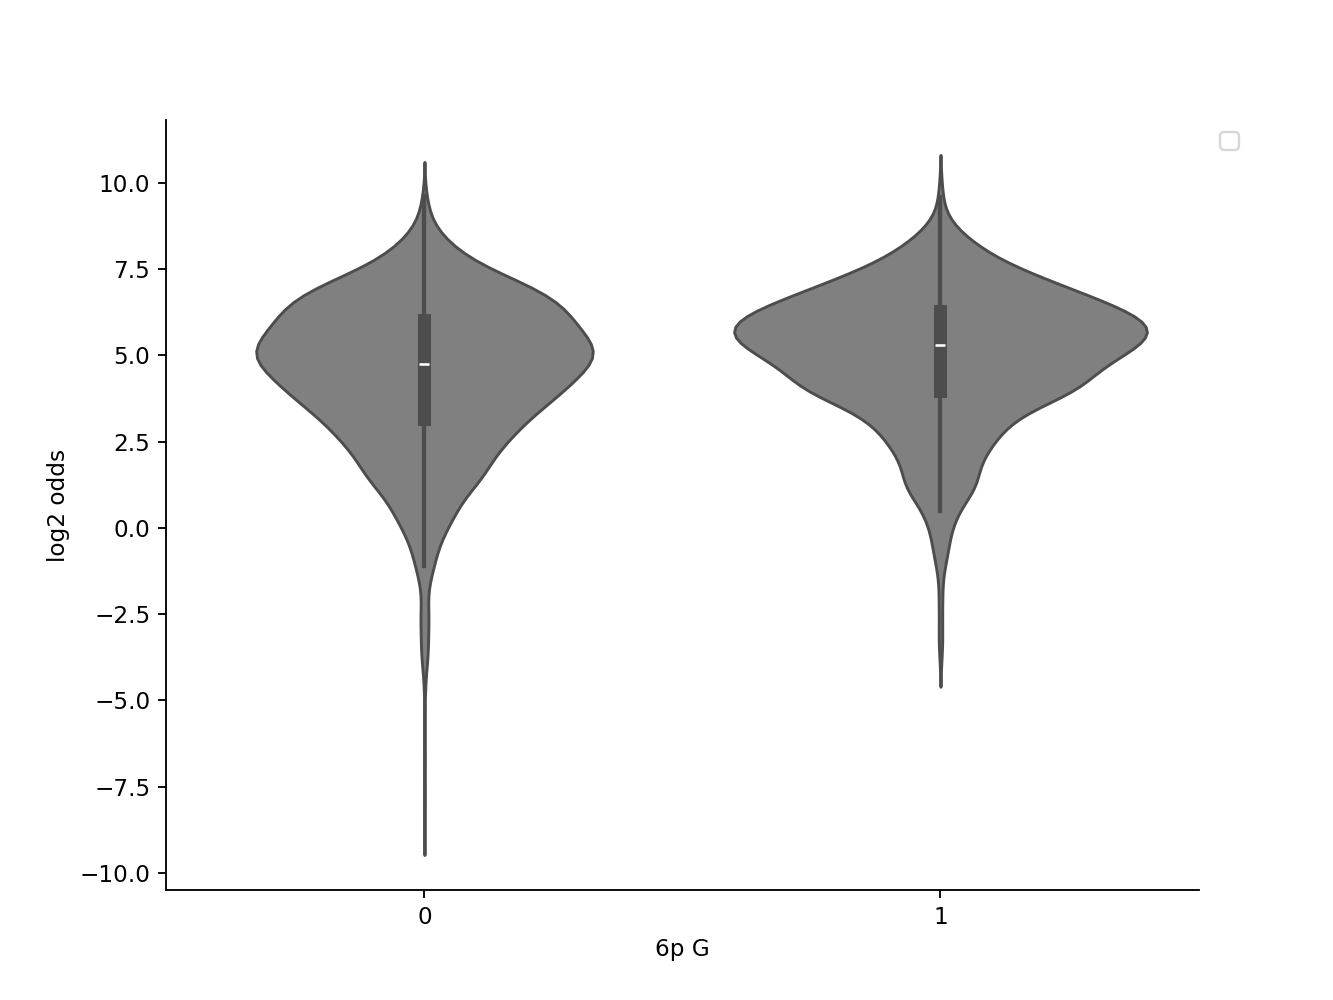

<IPython.core.display.Javascript object>


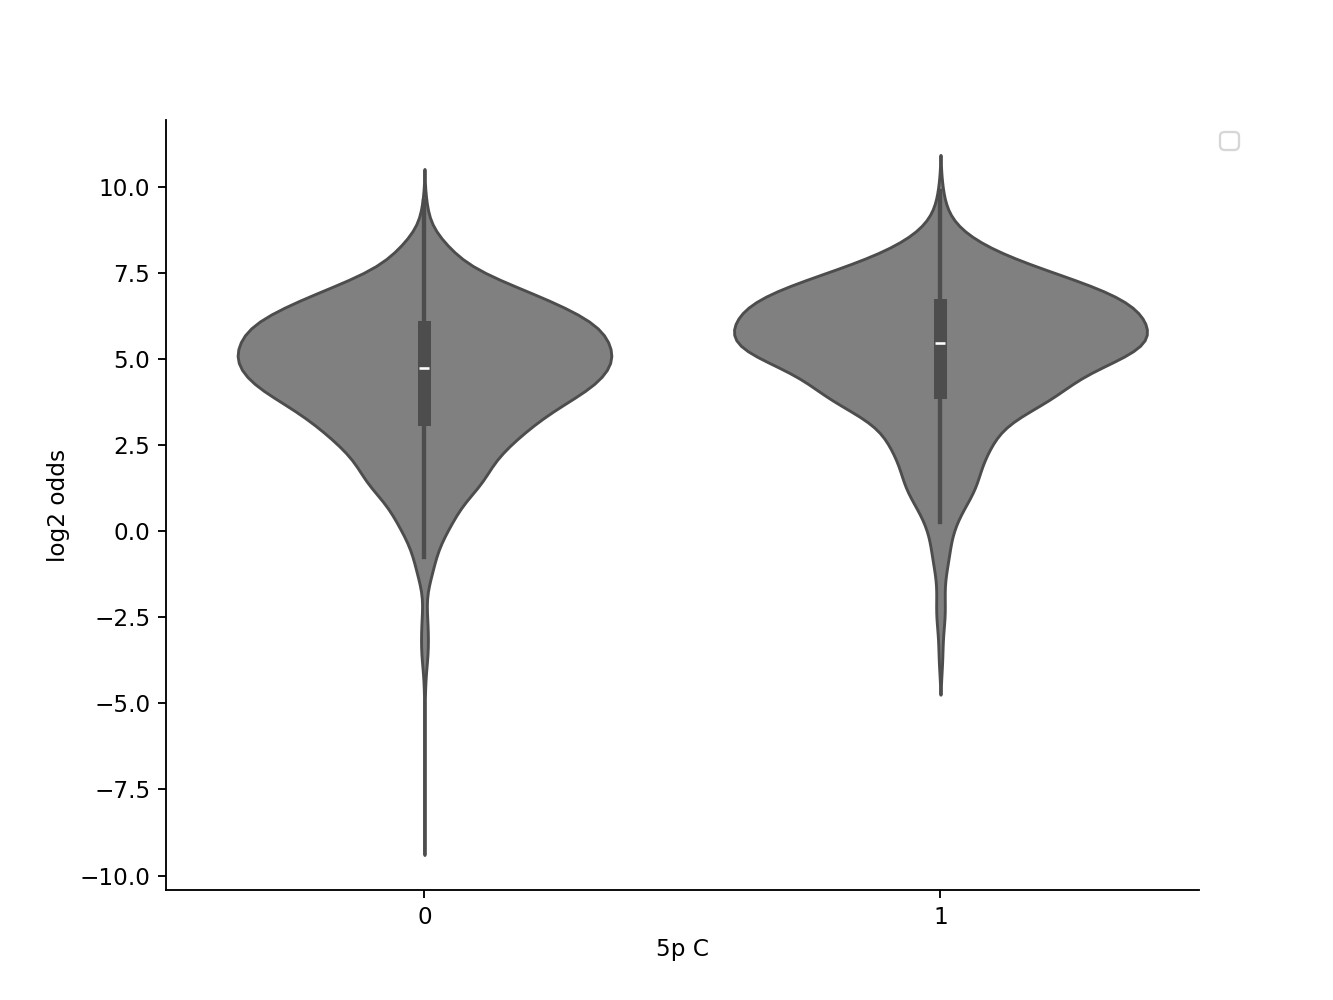

<IPython.core.display.Javascript object>


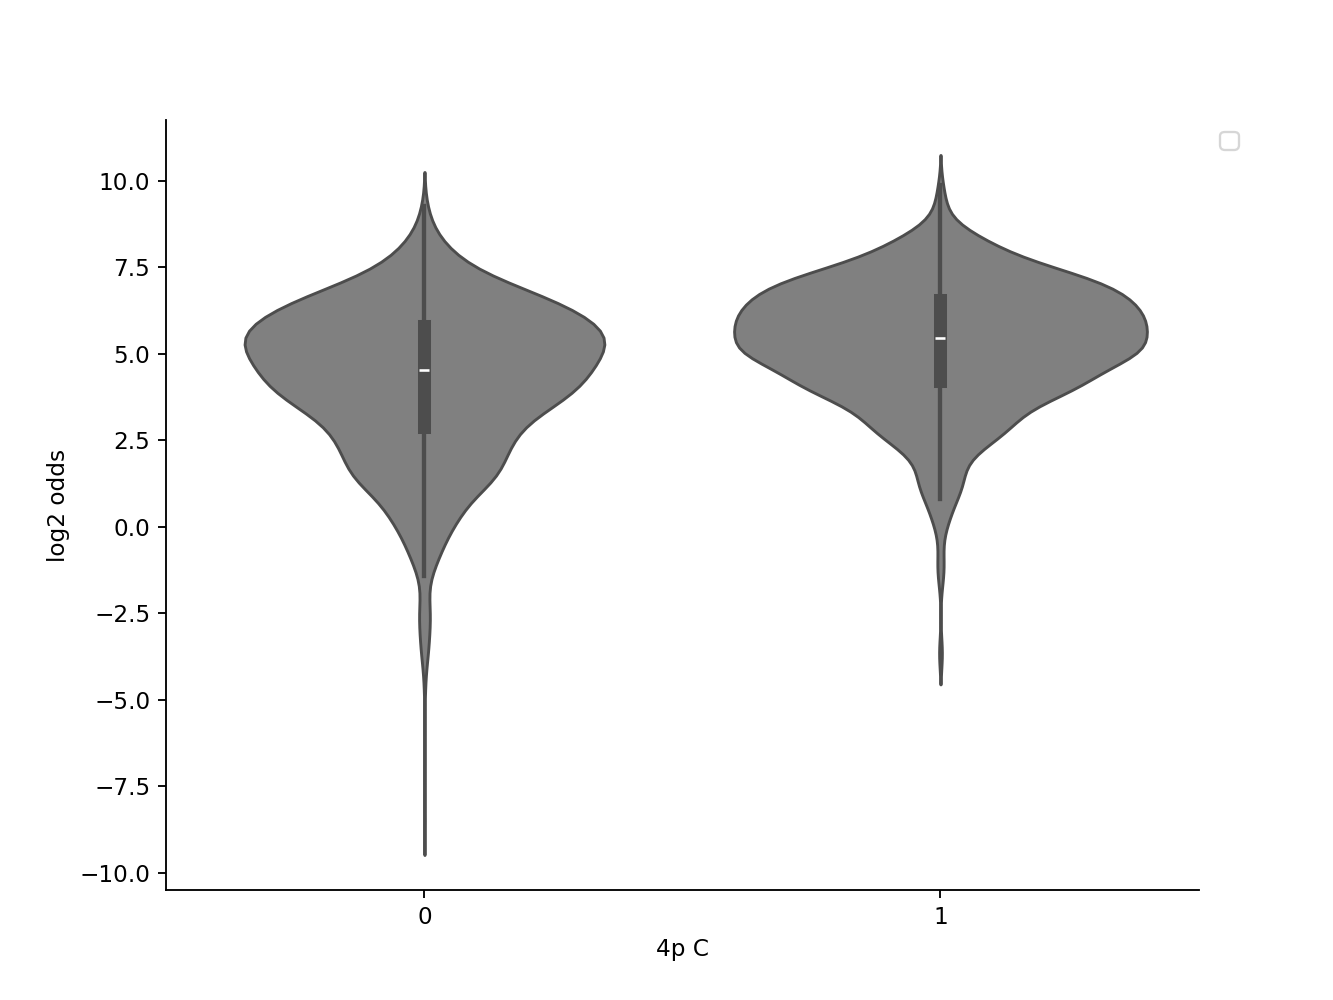

<IPython.core.display.Javascript object>


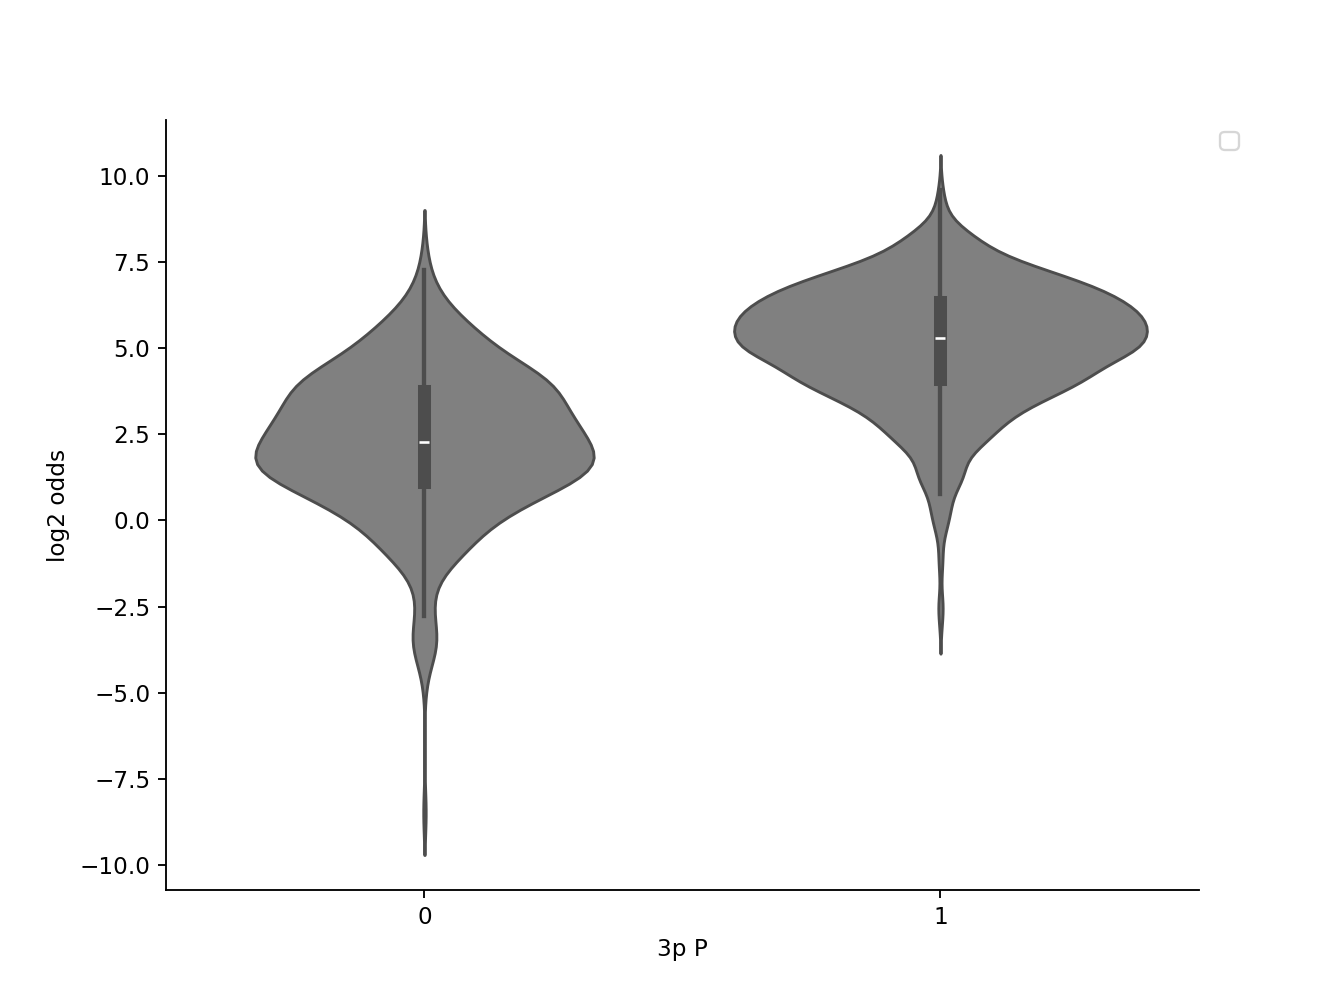

<IPython.core.display.Javascript object>


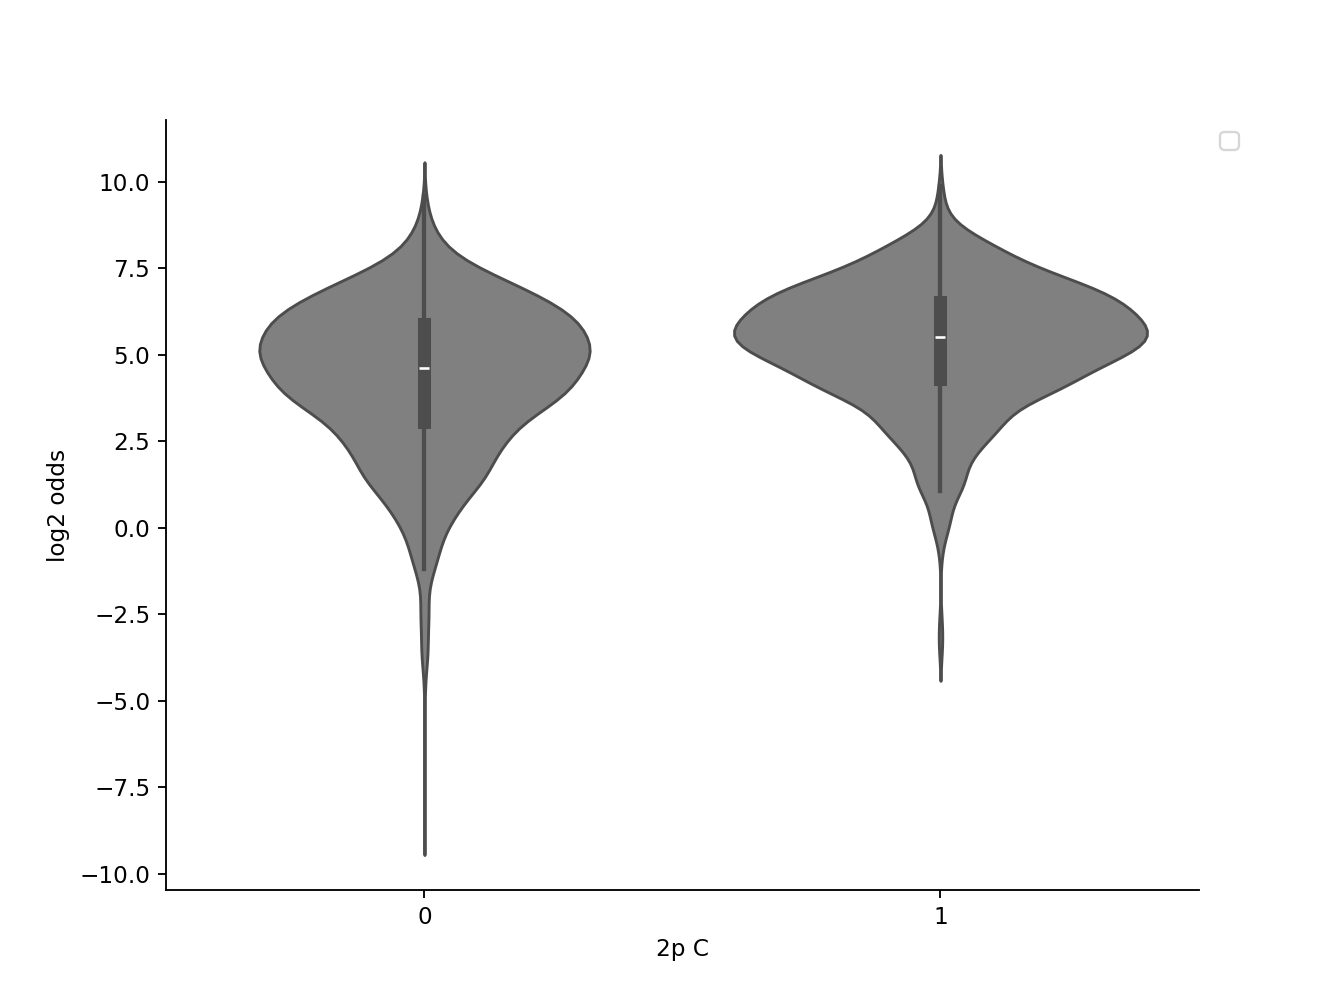

<IPython.core.display.Javascript object>


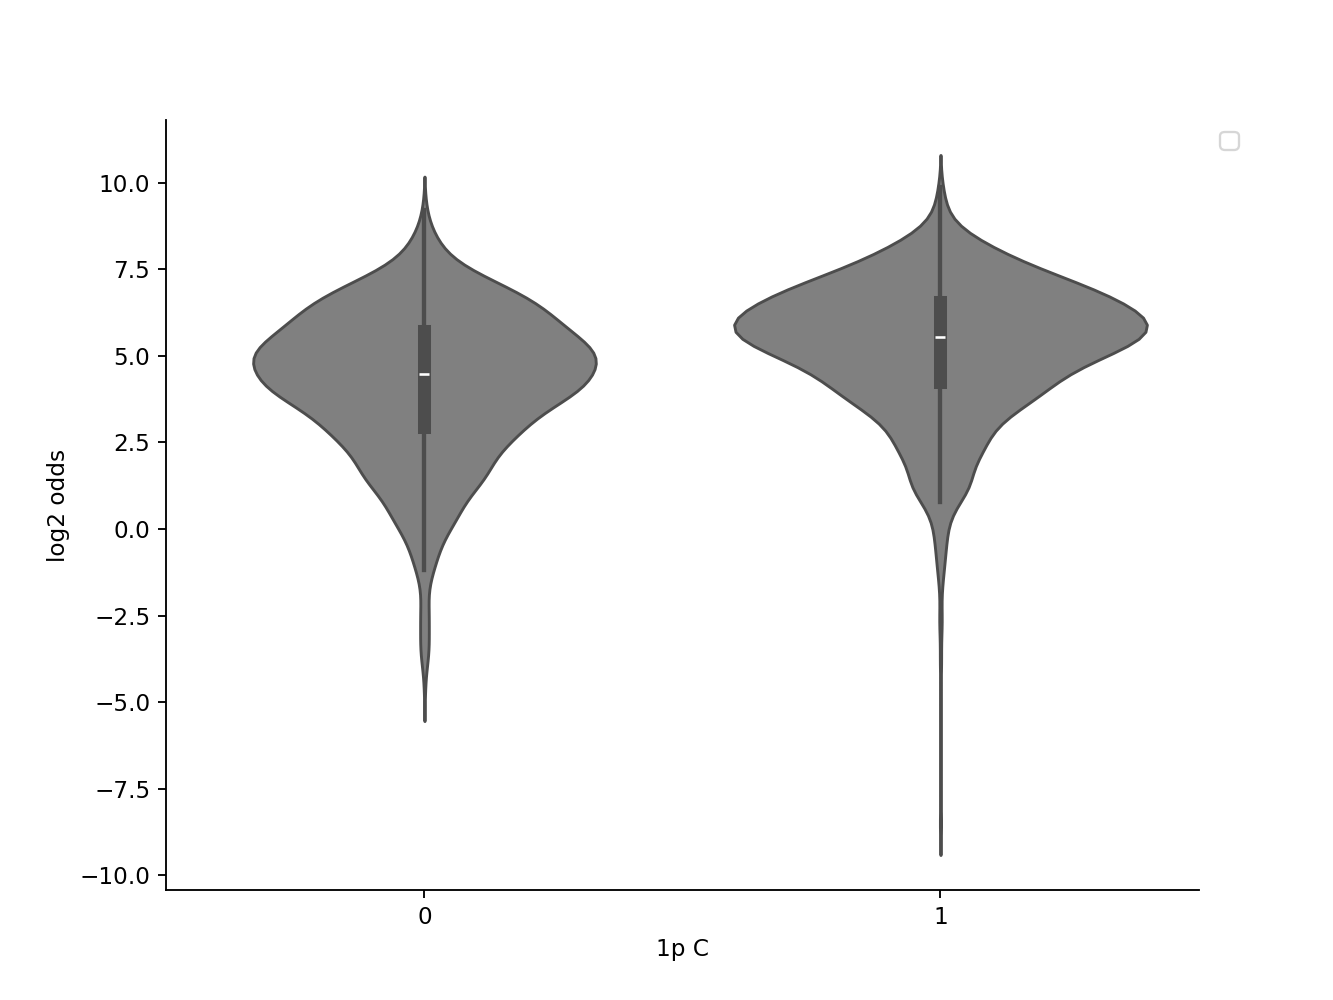

<IPython.core.display.Javascript object>


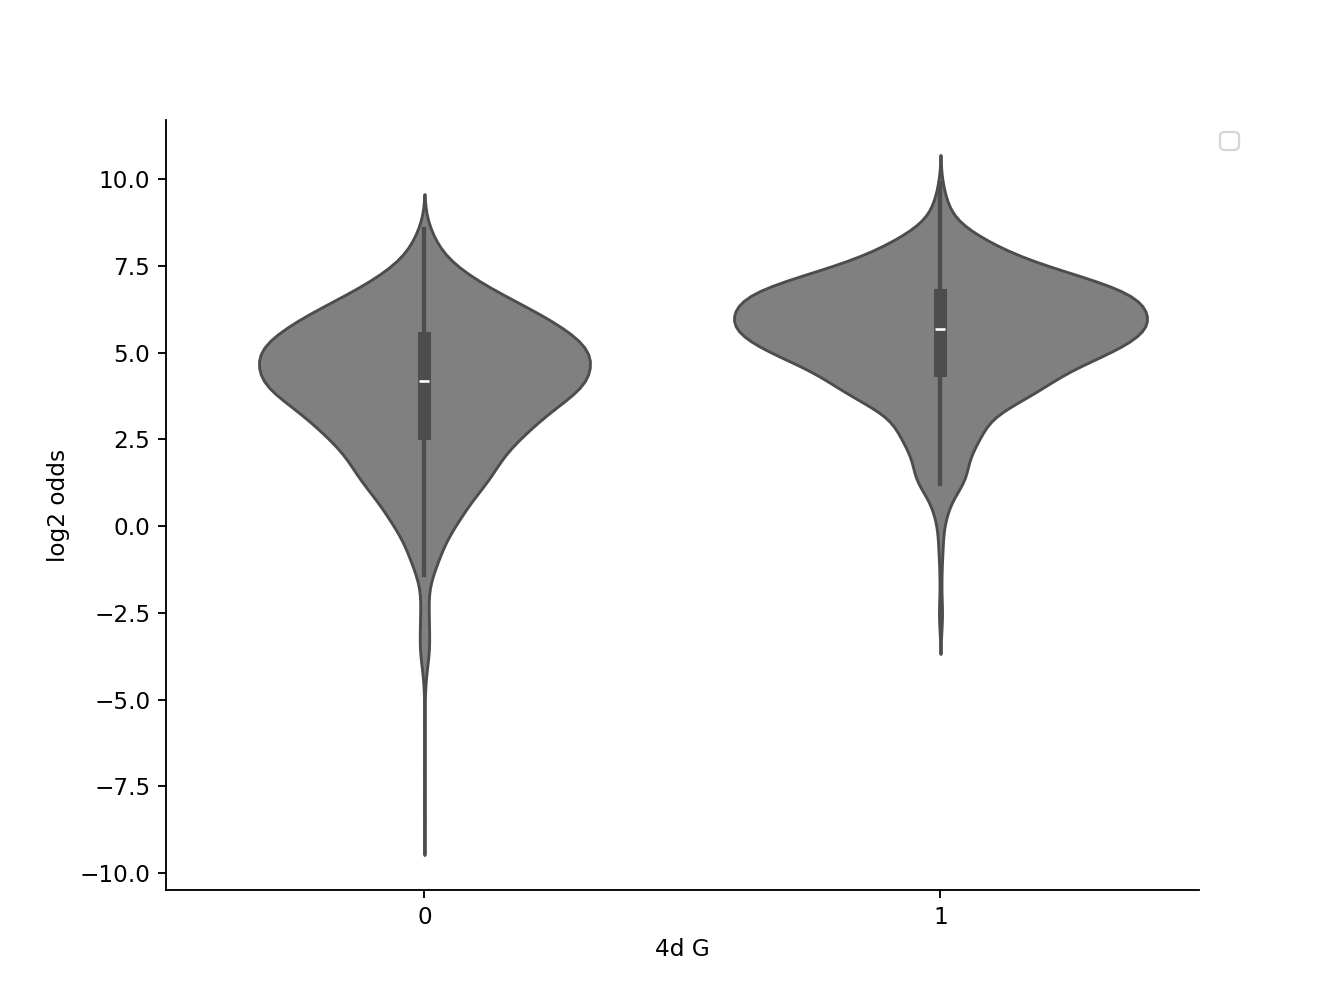

In [56]:
for w in windows:
    plt.close()
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    sns.violinplot(data=aug_df, x=w, y="log2 odds", color='grey')
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    plt.legend()
    plt.legend(bbox_to_anchor = (1.05,1))
    plt.show()

<IPython.core.display.Javascript object>


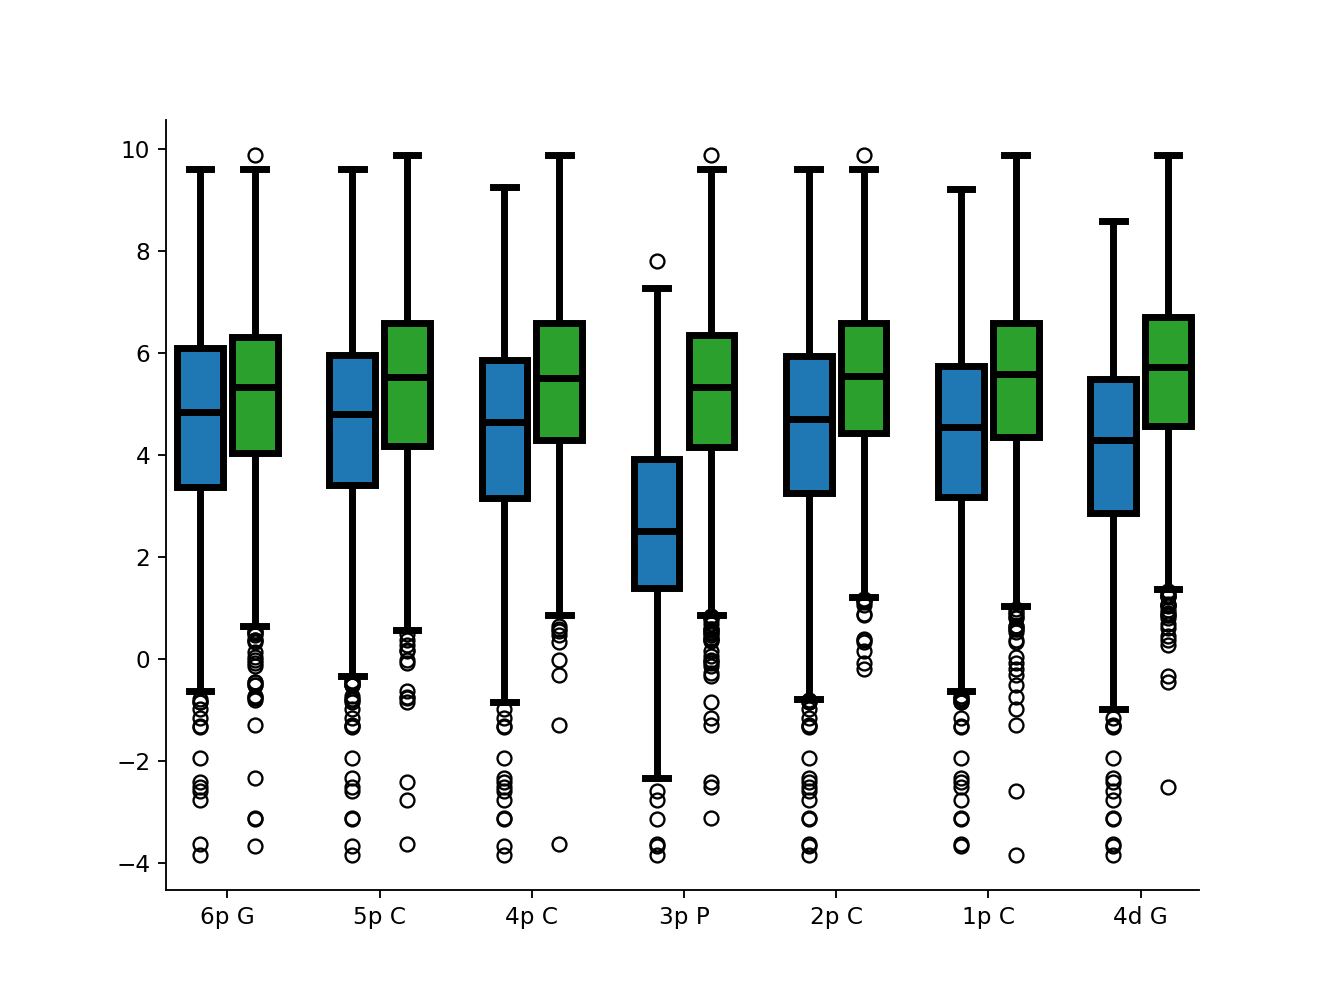

In [99]:
#FIGURE IS MADE USING 500 BP Model
x = list(w_feat.keys())
y1 = list(wo_feat.values())
y2 = list(w_feat.values())

plt.close()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
box1=axs.boxplot(y1,
            positions = [0.82, 1.82, 2.82, 3.82, 4.82, 5.82, 6.82],
            boxprops=dict(color='black', linewidth=3),
            whiskerprops=dict(color='black', linewidth=3),
            capprops=dict(color='black', linewidth=3),
            medianprops={'color': 'black', 'linewidth':3},
            showfliers=True,
            widths=0.3,
            label = 'Aim 1',
            patch_artist=True)
box2=axs.boxplot(y2,
            positions = [1.18, 2.18, 3.18, 4.18, 5.18, 6.18, 7.18],
            boxprops=dict(color='black', linewidth=3),
            whiskerprops=dict(color='black', linewidth=3),
            capprops=dict(color='black', linewidth=3),
            medianprops={'color': 'black', 'linewidth':3},
            showfliers=True,
            widths=0.3,
            label='Aim 2',
           patch_artist=True)

for patch in box1['boxes']:
    patch.set_facecolor('tab:blue')
for patch in box2['boxes']:
    patch.set_facecolor('tab:green')

axs.set_xticks([1, 2, 3, 4, 5, 6, 7], labels=windows)
#axs.set_ylim(0.5, 1)
axs.set_xlim(0.6, 7.38)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
#plt.legend()
#plt.legend(bbox_to_anchor = (0.6,1))
plt.show()

In [100]:
windows = ['6p G', '5p C', '4p C', '3p P', '2p C', '1p C', '4d G']
wo_feat = {k: [] for k in windows}
w_feat = {k: [] for k in windows}

for w in windows:
    for i in range(len(aug_df)):
        if aug_df[w].iloc[i] == 0:
            wo_feat[w].append(aug_df['Label'].iloc[i])
        elif aug_df[w].iloc[i] == 1:
            w_feat[w].append(aug_df['Label'].iloc[i])

<IPython.core.display.Javascript object>


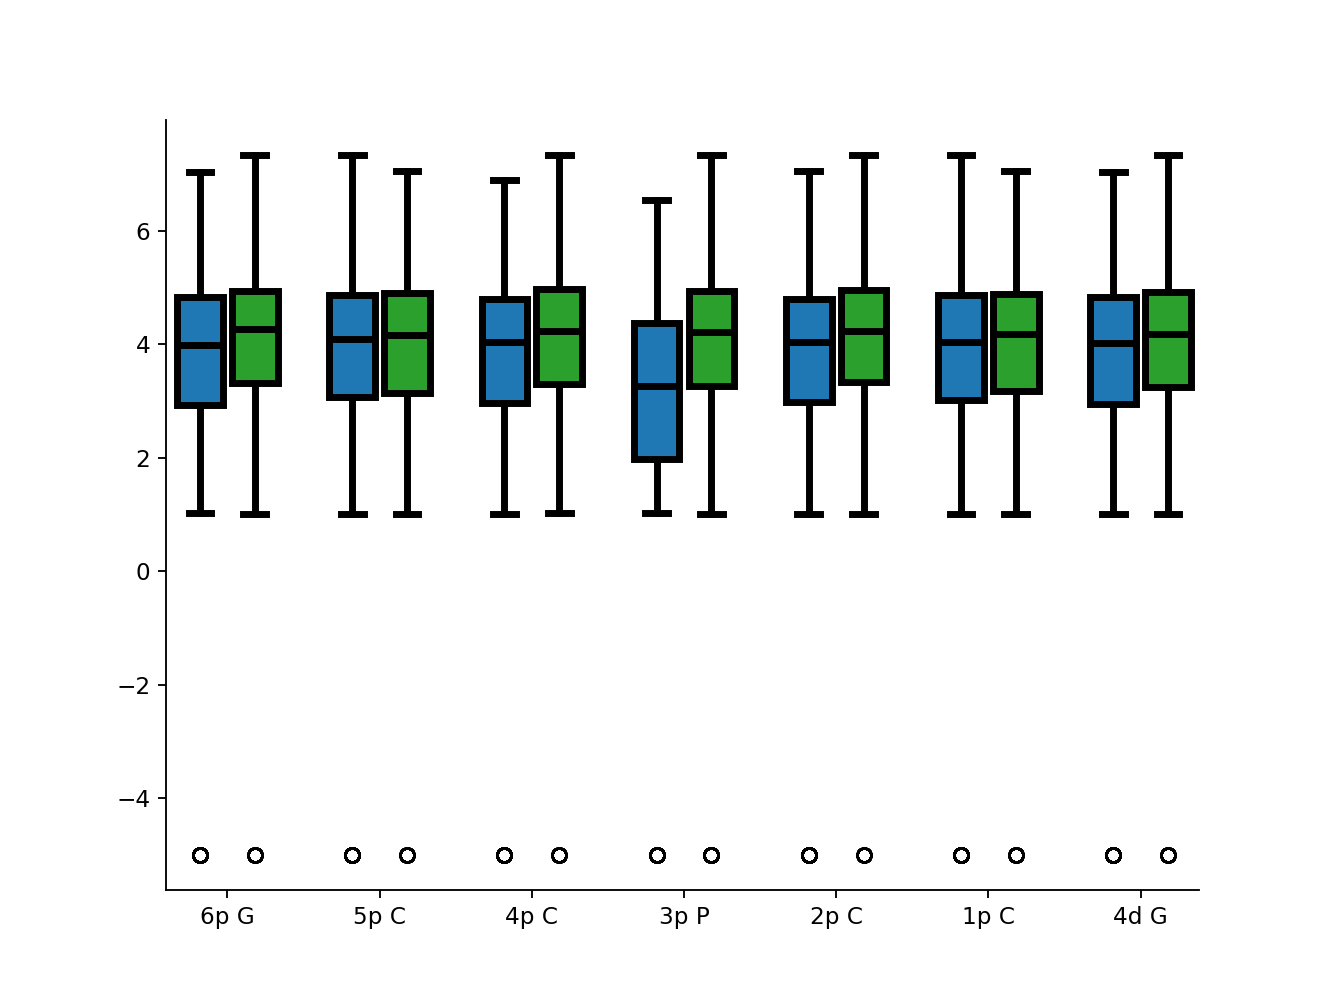

In [101]:
#FIGURE IS MADE USING 500 BP Model
x = list(w_feat.keys())
y1 = list(wo_feat.values())
y2 = list(w_feat.values())

plt.close()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
box1=axs.boxplot(y1,
            positions = [0.82, 1.82, 2.82, 3.82, 4.82, 5.82, 6.82],
            boxprops=dict(color='black', linewidth=3),
            whiskerprops=dict(color='black', linewidth=3),
            capprops=dict(color='black', linewidth=3),
            medianprops={'color': 'black', 'linewidth':3},
            showfliers=True,
            widths=0.3,
            label = 'Aim 1',
            patch_artist=True)
box2=axs.boxplot(y2,
            positions = [1.18, 2.18, 3.18, 4.18, 5.18, 6.18, 7.18],
            boxprops=dict(color='black', linewidth=3),
            whiskerprops=dict(color='black', linewidth=3),
            capprops=dict(color='black', linewidth=3),
            medianprops={'color': 'black', 'linewidth':3},
            showfliers=True,
            widths=0.3,
            label='Aim 2',
           patch_artist=True)

for patch in box1['boxes']:
    patch.set_facecolor('tab:blue')
for patch in box2['boxes']:
    patch.set_facecolor('tab:green')

axs.set_xticks([1, 2, 3, 4, 5, 6, 7], labels=windows)
#axs.set_ylim(0.5, 1)
axs.set_xlim(0.6, 7.38)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
#plt.legend()
#plt.legend(bbox_to_anchor = (0.6,1))
plt.show()

In [87]:
for w in windows:
    print(stats.ttest_ind(a=w_feat[w], b=wo_feat[w], equal_var=True)[1])

2.1575558206026583e-09
4.114566216216647e-18
1.6003127643413336e-40
1.734093456409066e-163
3.3515504990644656e-37
8.536966378702931e-41
7.648873567485752e-91


In [90]:
nug_df = dataset[(dataset['Start Codon'] == 'CTG')|(dataset['Start Codon'] == 'GTG')|(dataset['Start Codon'] == 'ACG')|(dataset['Start Codon'] == 'ATT')].copy()
nug_df = nug_df[nug_df['Transcript'] != 'random'].drop_duplicates(subset='Coordinate').copy()

In [91]:
nug_df['6p G'] = nug_df['Windowed Seq'].apply(lambda x: 1 if x[44] == 'G' else 0)
nug_df['5p C'] = nug_df['Windowed Seq'].apply(lambda x: 1 if x[45] == 'C' else 0)
nug_df['4p C'] = nug_df['Windowed Seq'].apply(lambda x: 1 if x[46] == 'C' else 0)
nug_df['3p P'] = nug_df['Windowed Seq'].apply(lambda x: 1 if (x[47] == 'G')|(x[47]=='A') else 0)
nug_df['2p C'] = nug_df['Windowed Seq'].apply(lambda x: 1 if x[48] == 'C' else 0)
nug_df['1p C'] = nug_df['Windowed Seq'].apply(lambda x: 1 if x[49] == 'C' else 0)
nug_df['4d G'] = nug_df['Windowed Seq'].apply(lambda x: 1 if x[53] == 'G' else 0)

In [92]:
windows = ['6p G', '5p C', '4p C', '3p P', '2p C', '1p C', '4d G']
wo_feat = {k: [] for k in windows}
w_feat = {k: [] for k in windows}

for w in windows:
    for i in range(len(nug_df)):
        if nug_df[w].iloc[i] == 0:
            wo_feat[w].append(nug_df['log2 odds'].iloc[i])
        elif nug_df[w].iloc[i] == 1:
            w_feat[w].append(nug_df['log2 odds'].iloc[i])

<IPython.core.display.Javascript object>


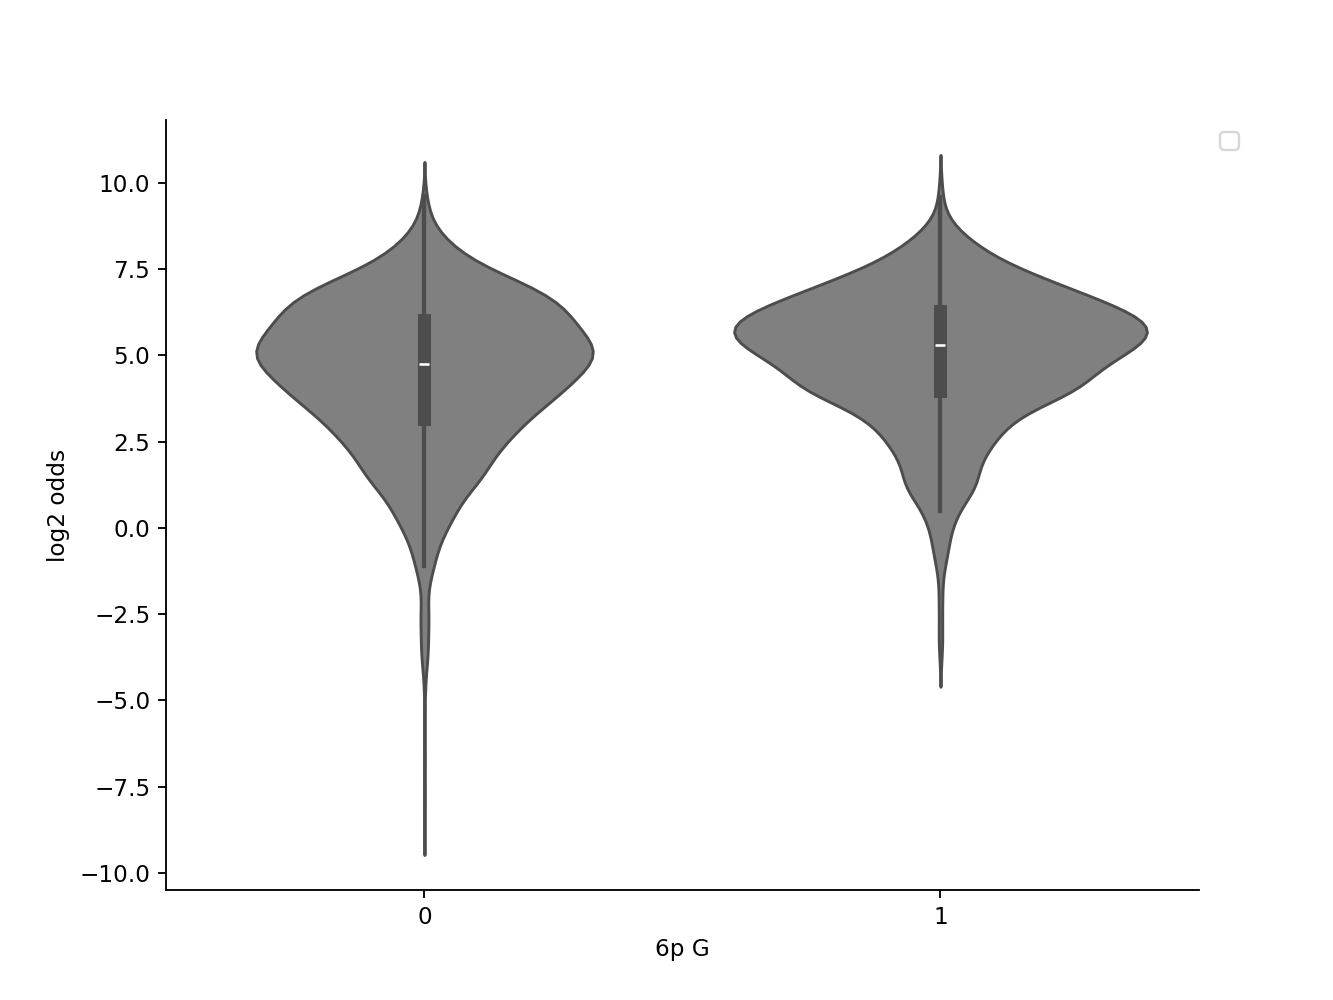

<IPython.core.display.Javascript object>


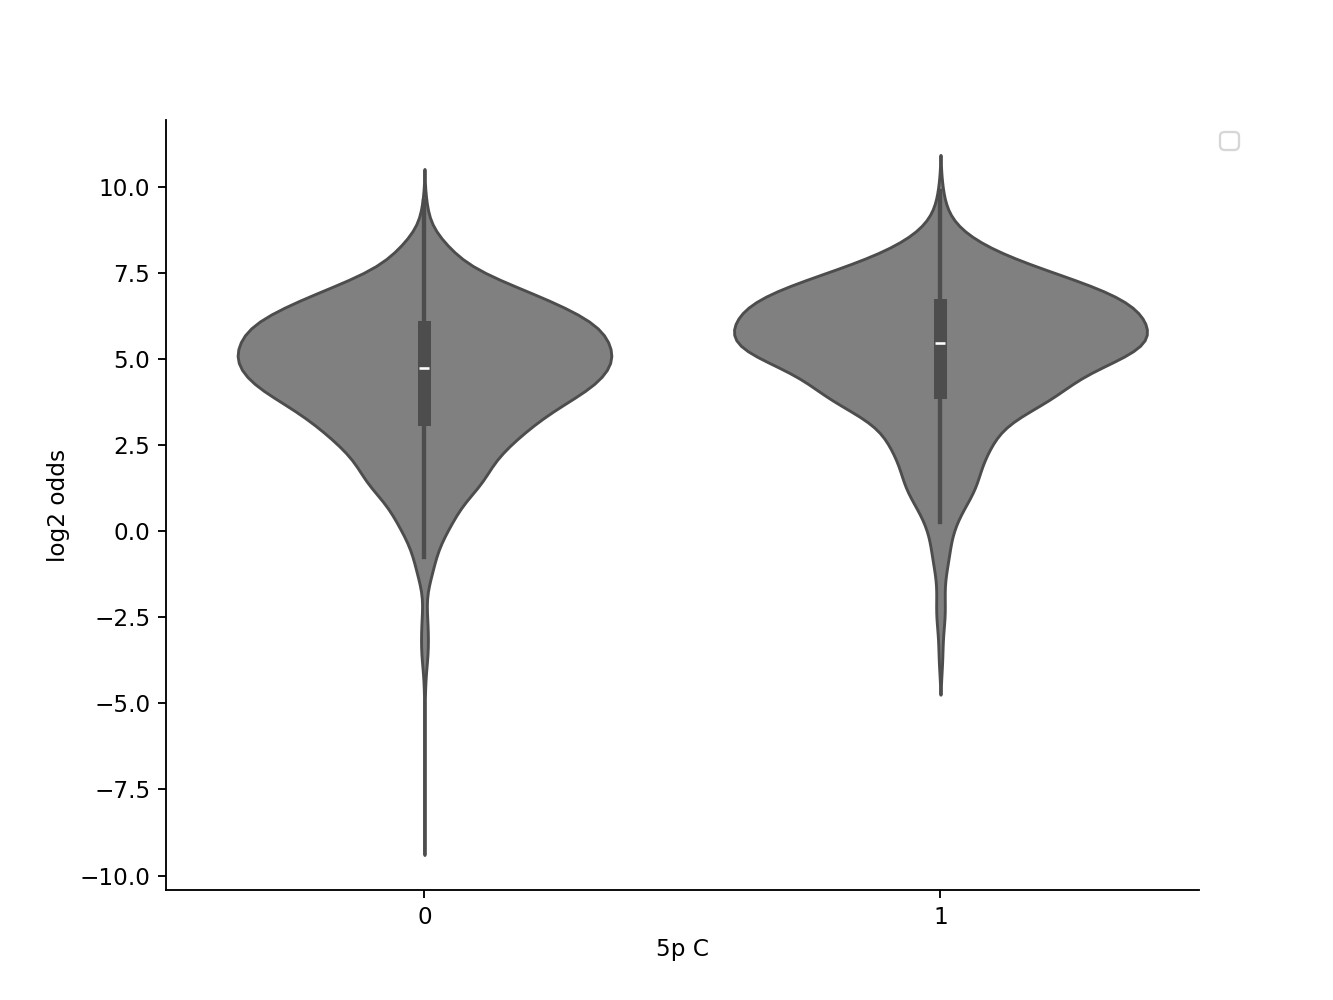

<IPython.core.display.Javascript object>


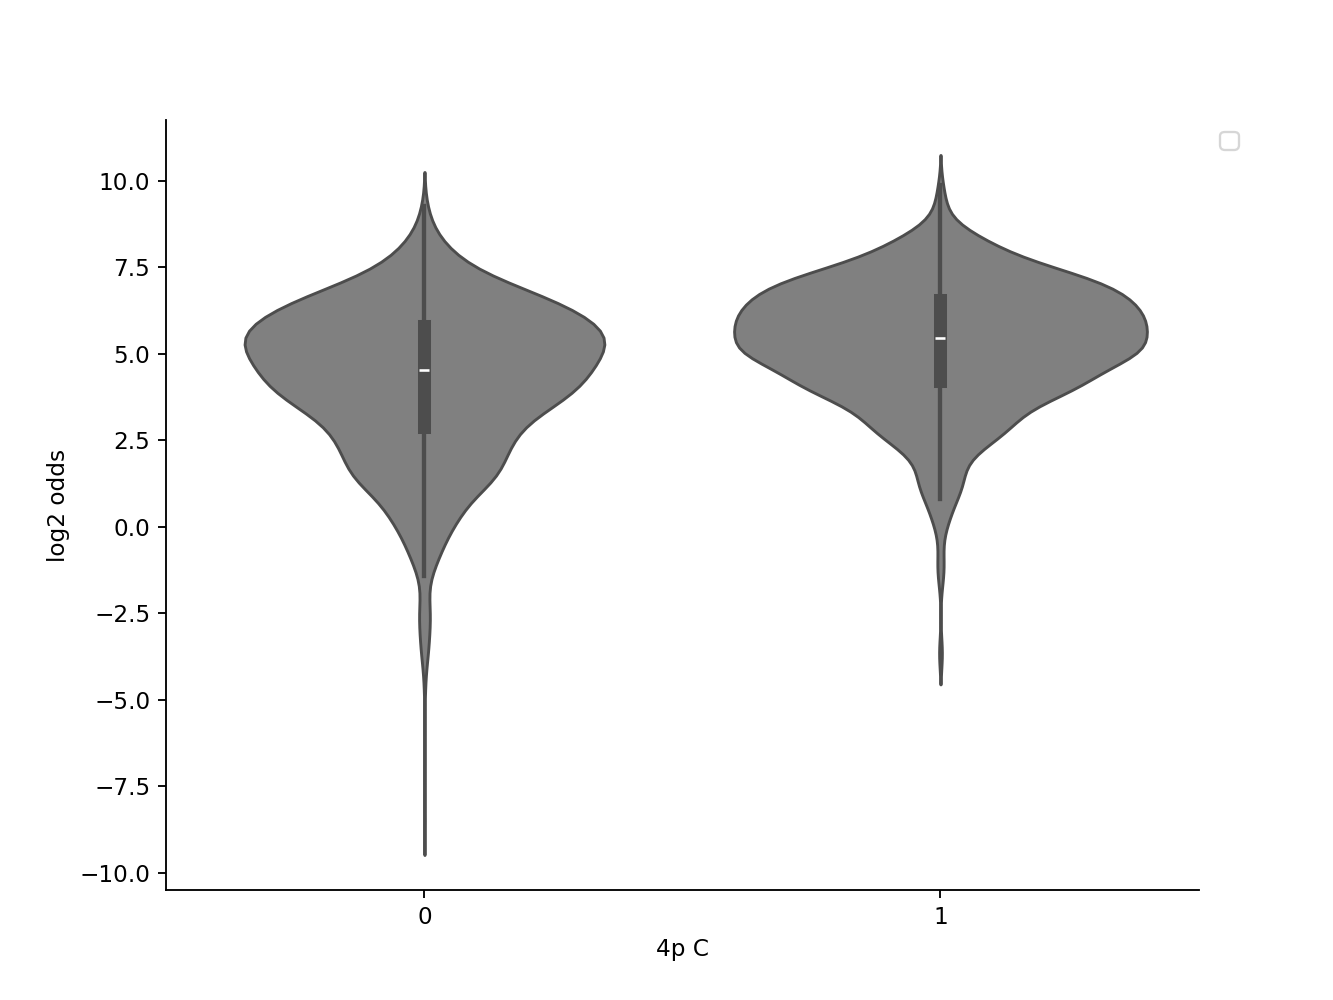

<IPython.core.display.Javascript object>


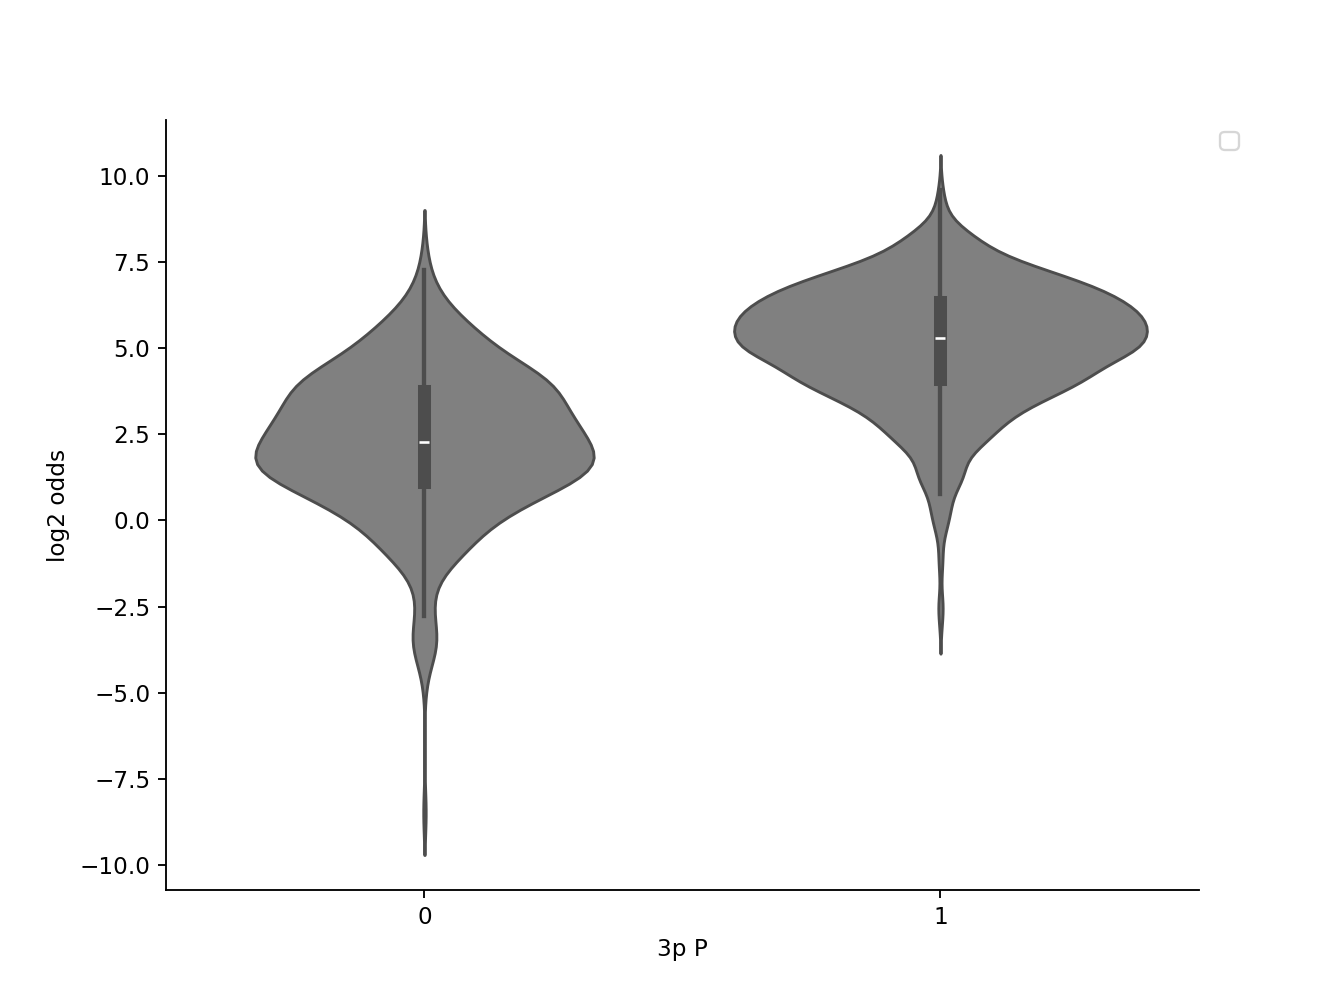

<IPython.core.display.Javascript object>


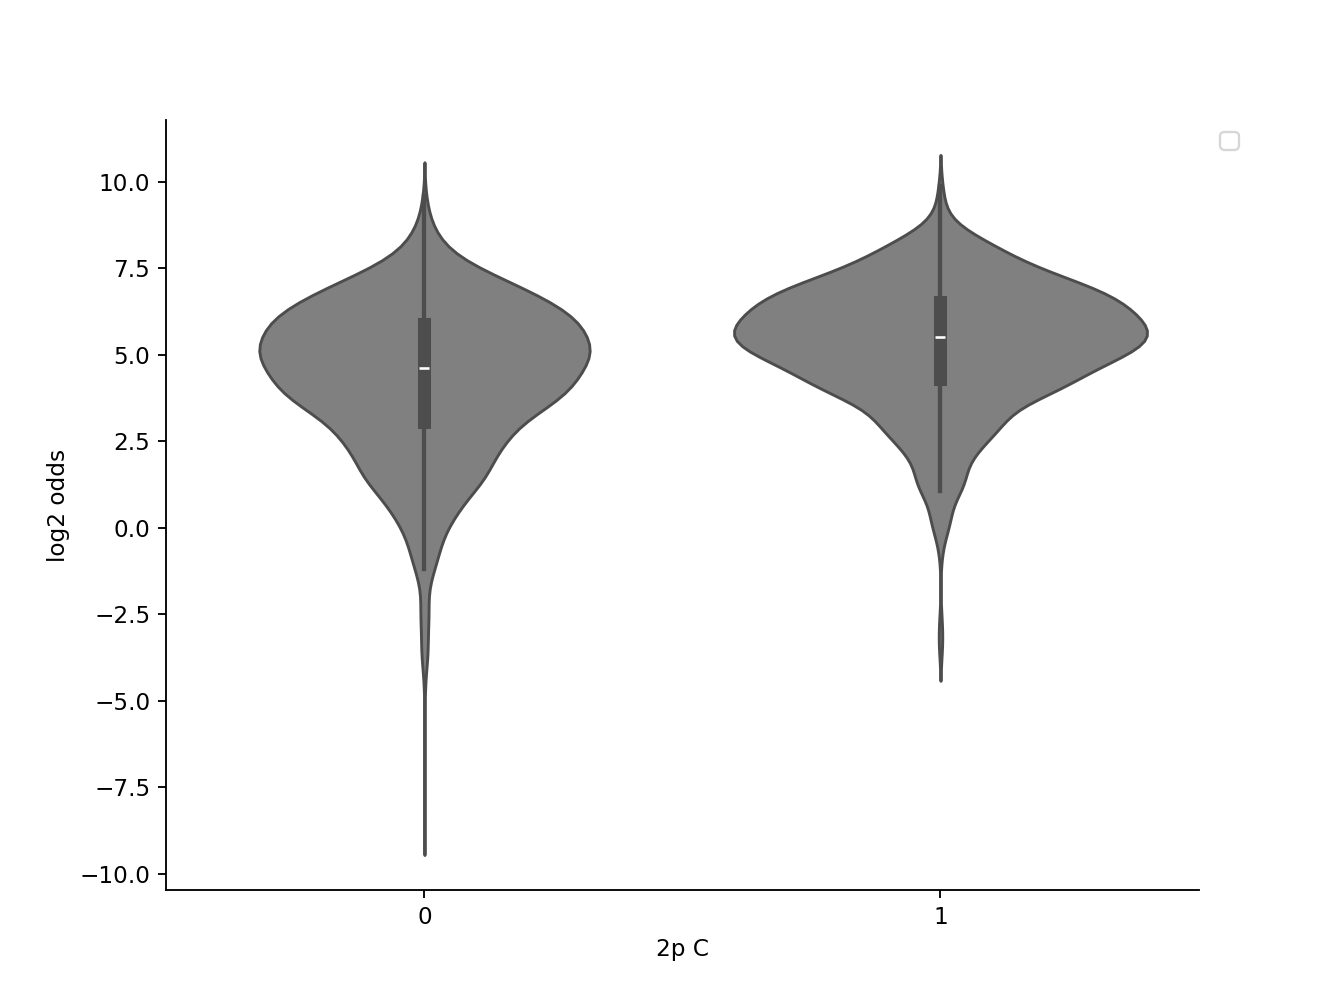

<IPython.core.display.Javascript object>


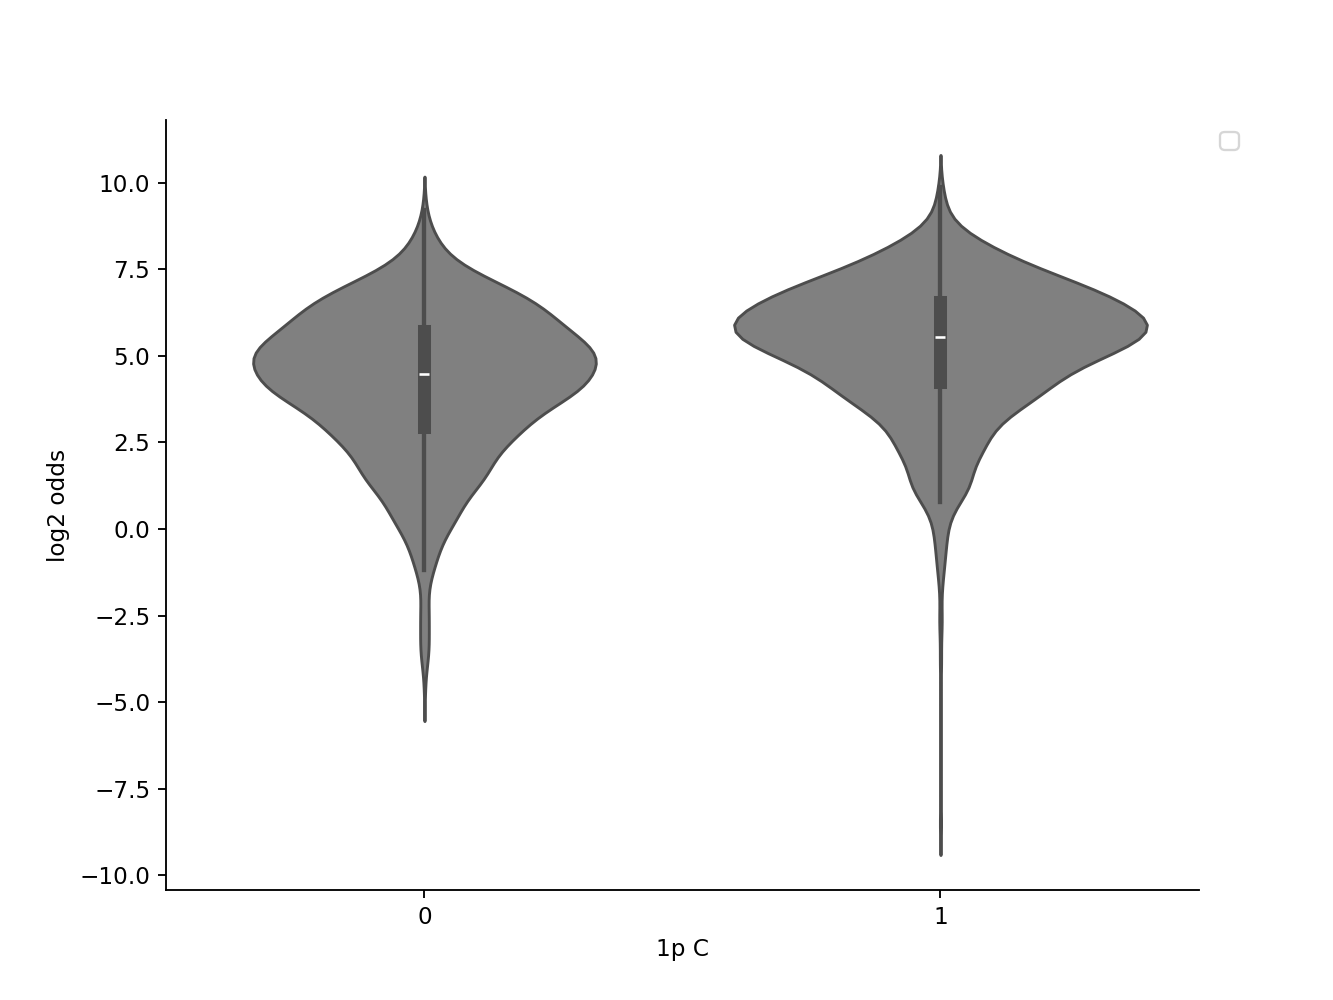

<IPython.core.display.Javascript object>


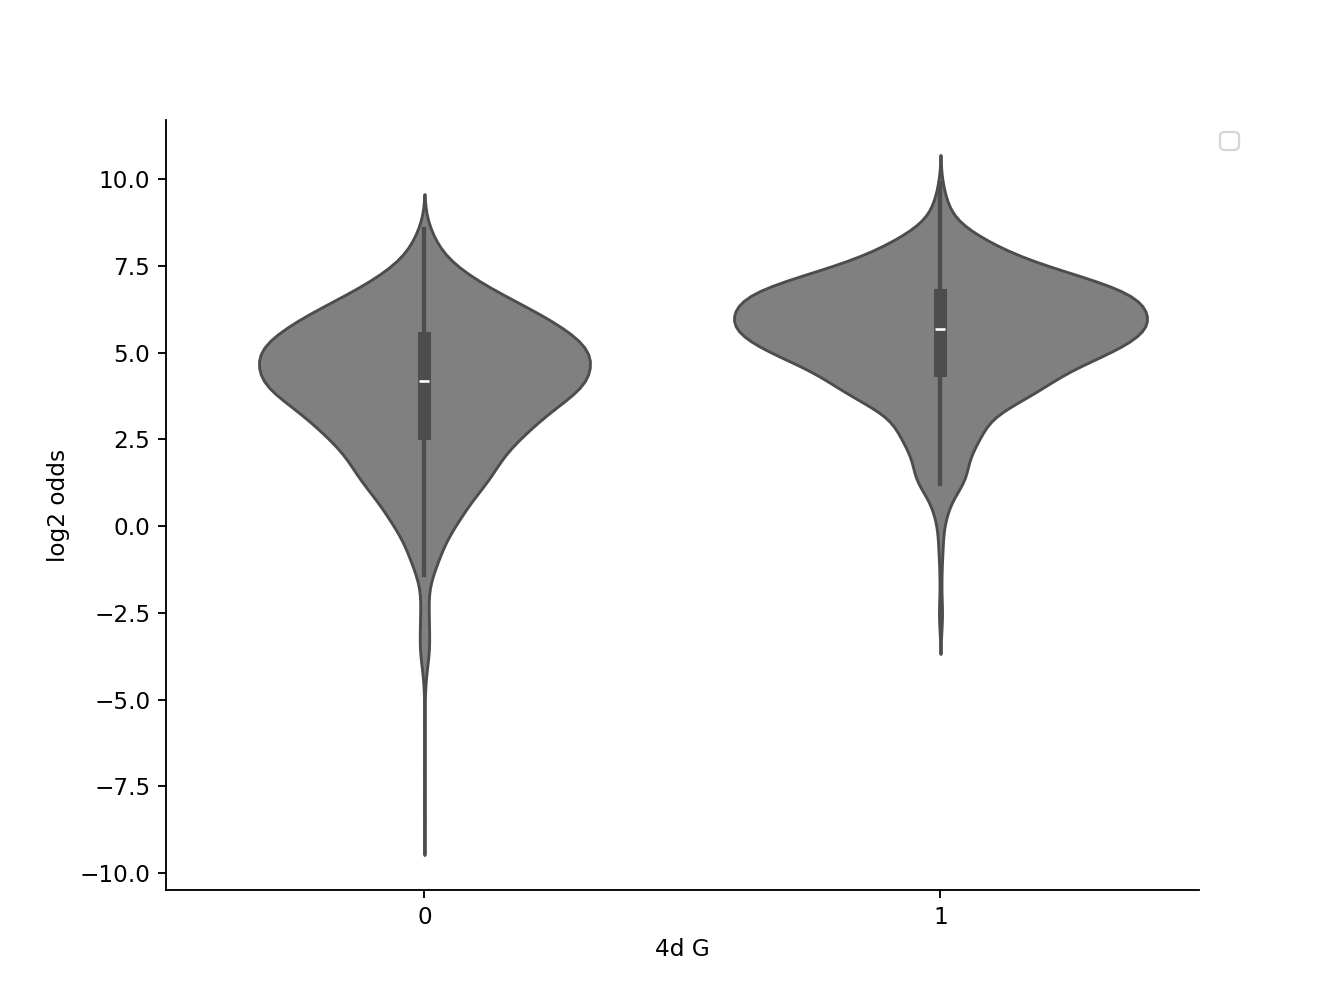

In [62]:
for w in windows:
    plt.close()
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    sns.violinplot(data=aug_df, x=w, y="log2 odds", color='grey')
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    plt.legend()
    plt.legend(bbox_to_anchor = (1.05,1))
    plt.show()

<IPython.core.display.Javascript object>


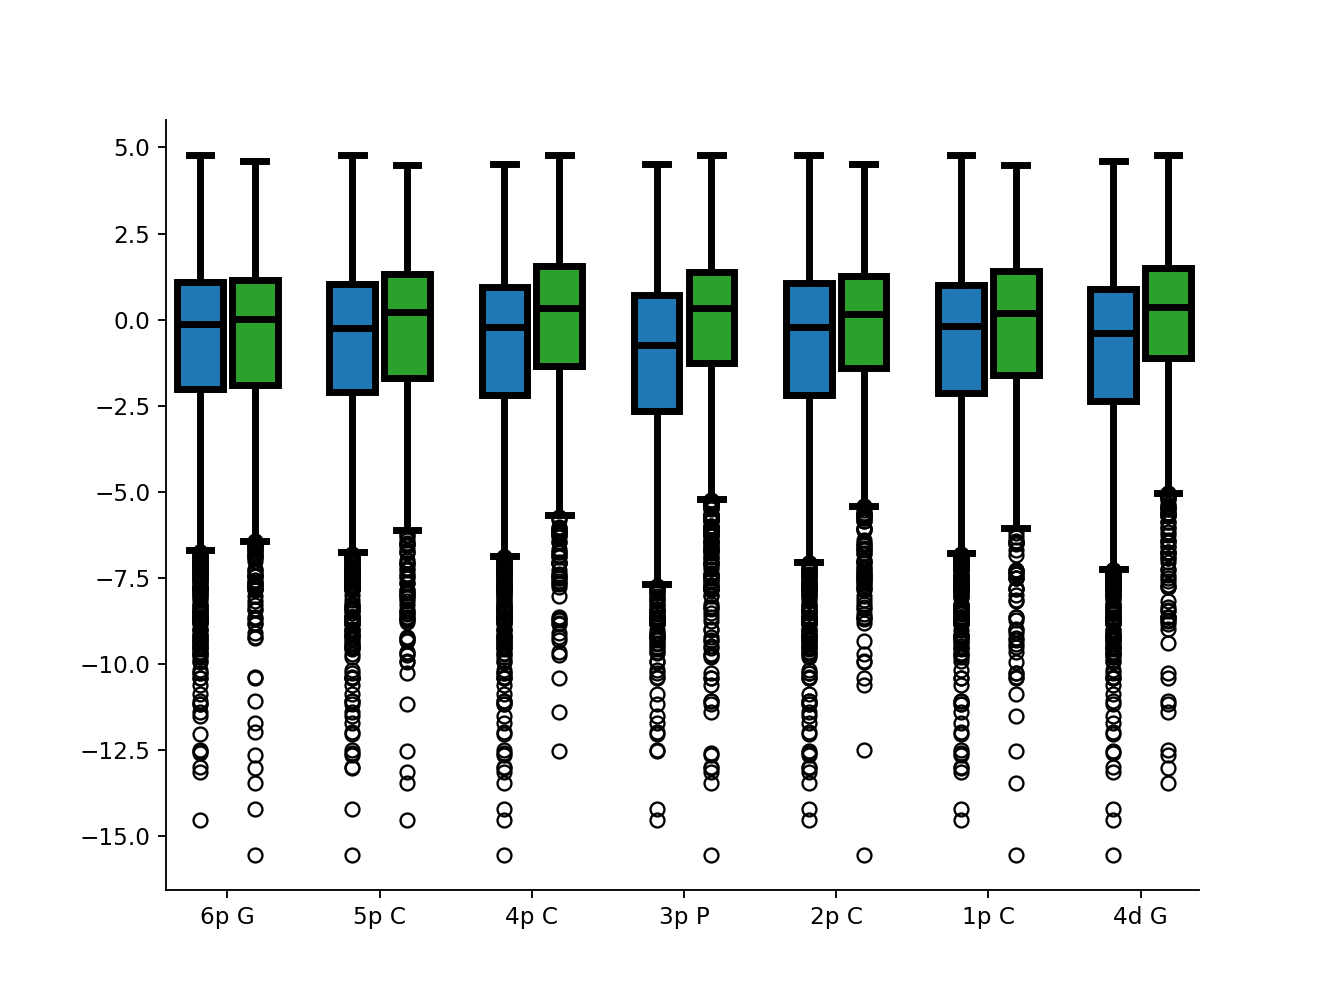

In [93]:
#FIGURE IS MADE USING 500 BP Model
x = list(w_feat.keys())
y1 = list(wo_feat.values())
y2 = list(w_feat.values())

plt.close()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
box1 = axs.boxplot(y1,
            positions = [0.82, 1.82, 2.82, 3.82, 4.82, 5.82, 6.82],
            boxprops=dict(color='black', linewidth=3),
            whiskerprops=dict(color='black', linewidth=3),
            capprops=dict(color='black', linewidth=3),
            medianprops={'color': 'black', 'linewidth':3},
            showfliers=True,
            widths=0.3,
            label = 'Aim 1',
            patch_artist=True)
box2 = axs.boxplot(y2,
            positions = [1.18, 2.18, 3.18, 4.18, 5.18, 6.18, 7.18],
            boxprops=dict(color='black', linewidth=3),
            whiskerprops=dict(color='black', linewidth=3),
            capprops=dict(color='black', linewidth=3),
            medianprops={'color': 'black', 'linewidth':3},
            showfliers=True,
            widths=0.3,
            label='Aim 2',
                  patch_artist=True)

for patch in box1['boxes']:
    patch.set_facecolor('tab:blue')
for patch in box2['boxes']:
    patch.set_facecolor('tab:green')

axs.set_xticks([1, 2, 3, 4, 5, 6, 7], labels=windows)
#axs.set_ylim(0.5, 1)
axs.set_xlim(0.6, 7.38)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
#plt.legend()
#plt.legend(bbox_to_anchor = (0.6,1))
plt.show()

In [94]:
for w in windows:
    print(stats.ttest_ind(a=w_feat[w], b=wo_feat[w], equal_var=True)[1])

0.4415455908660637
2.852783986290833e-06
6.37107408574256e-16
1.6448180424778674e-38
6.813693839166821e-10
8.893638350298966e-07
3.1273850845048256e-26


In [379]:
for w in windows:
    t = stats.ttest_ind(a=w_feat[w], b=wo_feat[w], equal_var=True)
    print(t.pvalue)
    print(t.confidence_interval(confidence_level=0.95))

8.130102232056704e-12
ConfidenceInterval(low=0.3858614970614077, high=0.694429108769787)
1.6360363380437574e-16
ConfidenceInterval(low=0.5260360453278983, high=0.8516681250737479)
6.031394849808805e-42
ConfidenceInterval(low=0.9090102867421274, high=1.2103289058231608)
7.067301003607438e-182
ConfidenceInterval(low=2.6753832864977323, high=3.0372046533854036)
9.665023479375436e-34
ConfidenceInterval(low=0.8240235524325702, high=1.137653837061394)
2.0146959967309643e-41
ConfidenceInterval(low=0.8979875457268195, high=1.1980114232271268)
3.2425527526980194e-90
ConfidenceInterval(low=1.3810810928324218, high=1.667443495779855)


In [387]:
(t.confidence_interval(confidence_level=0.95)[1] - t.confidence_interval(confidence_level=0.95)[0])/2

0.1431812014737166

<IPython.core.display.Javascript object>


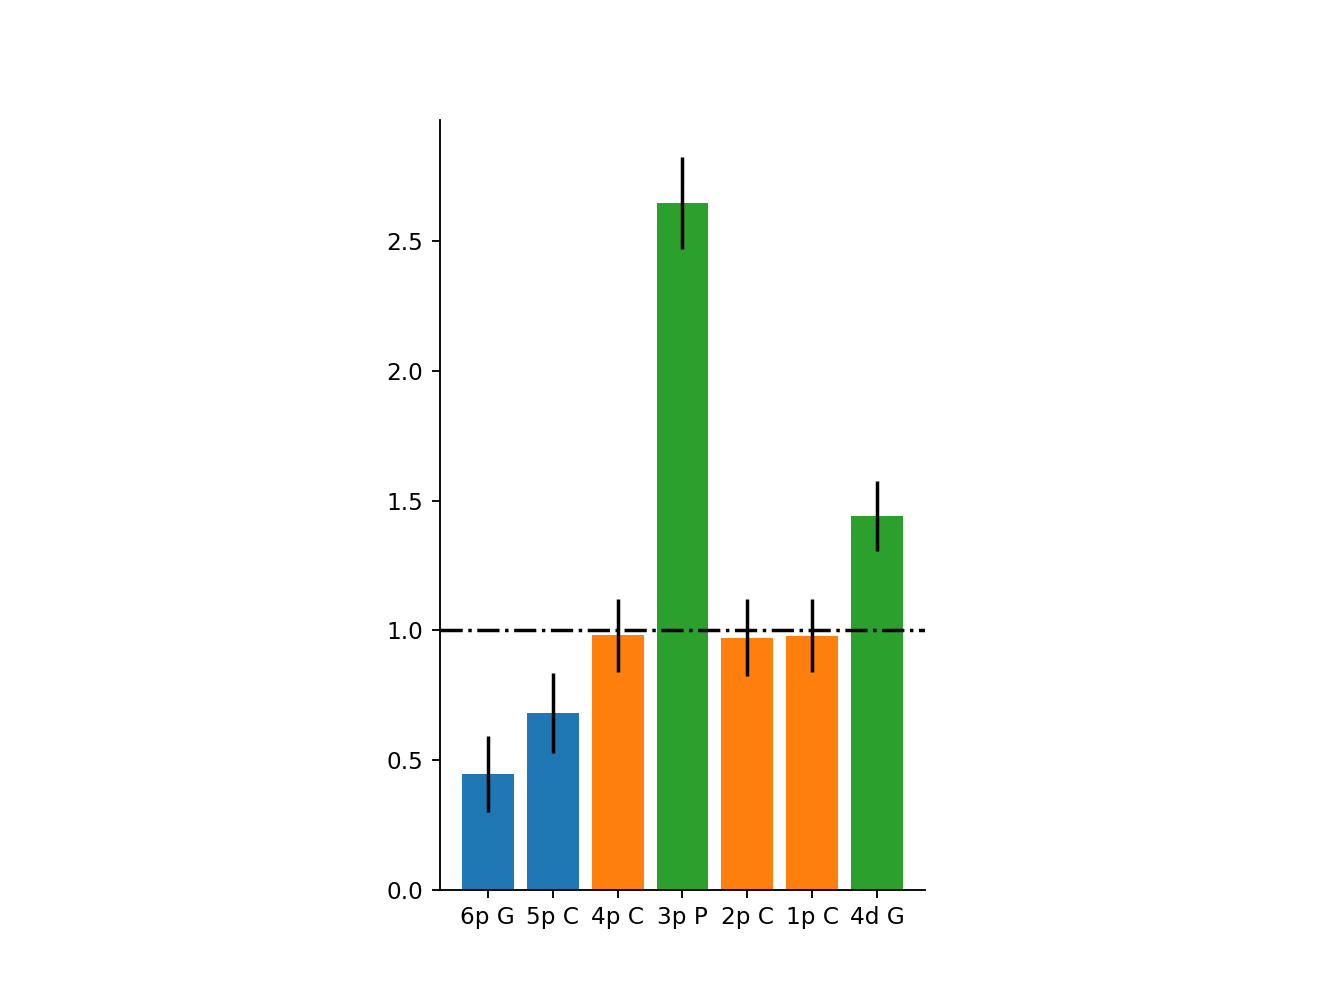

In [113]:
windows = ['6p G', '5p C', '4p C', '3p P', '2p C', '1p C', '4d G']
feat_diff = {k: [] for k in windows}
feat_ci = {k: [] for k in windows}

for w in windows:
    feat_diff[w] = np.mean(w_feat[w]) - np.mean(wo_feat[w])
    t = stats.ttest_ind(a=w_feat[w], b=wo_feat[w], equal_var=True)
    feat_ci[w] = (t.confidence_interval(confidence_level=0.95)[1] - t.confidence_interval(confidence_level=0.95)[0])/2

x = list(feat_diff.keys())
y1 = list(feat_diff.values())
y_err = list(feat_ci.values())
  
    
p = ['tab:blue', 'tab:blue', 'tab:orange', 'tab:green', 'tab:orange', 'tab:orange', 'tab:green']
    
plt.close()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
axs.bar([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], y1, -0.08 ,align='center', yerr=y_err, color=p, label='Prediction Increase')
axs.axhline(y=1, c='black', linestyle='dashdot')
axs.set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], labels=windows)
#axs.set_ylim(0.5, 1)
#axs.set_xlim(0.05, 0.25)
axs.set_aspect(0.4)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
plt.show()

In [221]:
windows = ['6p G', '5p C', '4p C', '3p P', '2p C', '1p C', '4d G']
feat_dict = {'no elements':[], 'Minor Elements':[], 'Major Elements':[]}

for i in range(len(aug_df)):
    if (aug_df['3p P'].iloc[i] == 1) | (aug_df['4d G'].iloc[i] == 1):
        feat_dict['Major Elements'].append(aug_df['log2 odds'].iloc[i])
    else:
        if (aug_df['6p G'].iloc[i] == 1) | (aug_df['5p C'].iloc[i] == 1) | (aug_df['4p C'].iloc[i] == 1) | (aug_df['2p C'].iloc[i] == 1) | (aug_df['1p C'].iloc[i] == 1):
            feat_dict['Minor Elements'].append(aug_df['log2 odds'].iloc[i])
        else:
            feat_dict['no elements'].append(aug_df['log2 odds'].iloc[i])

<IPython.core.display.Javascript object>


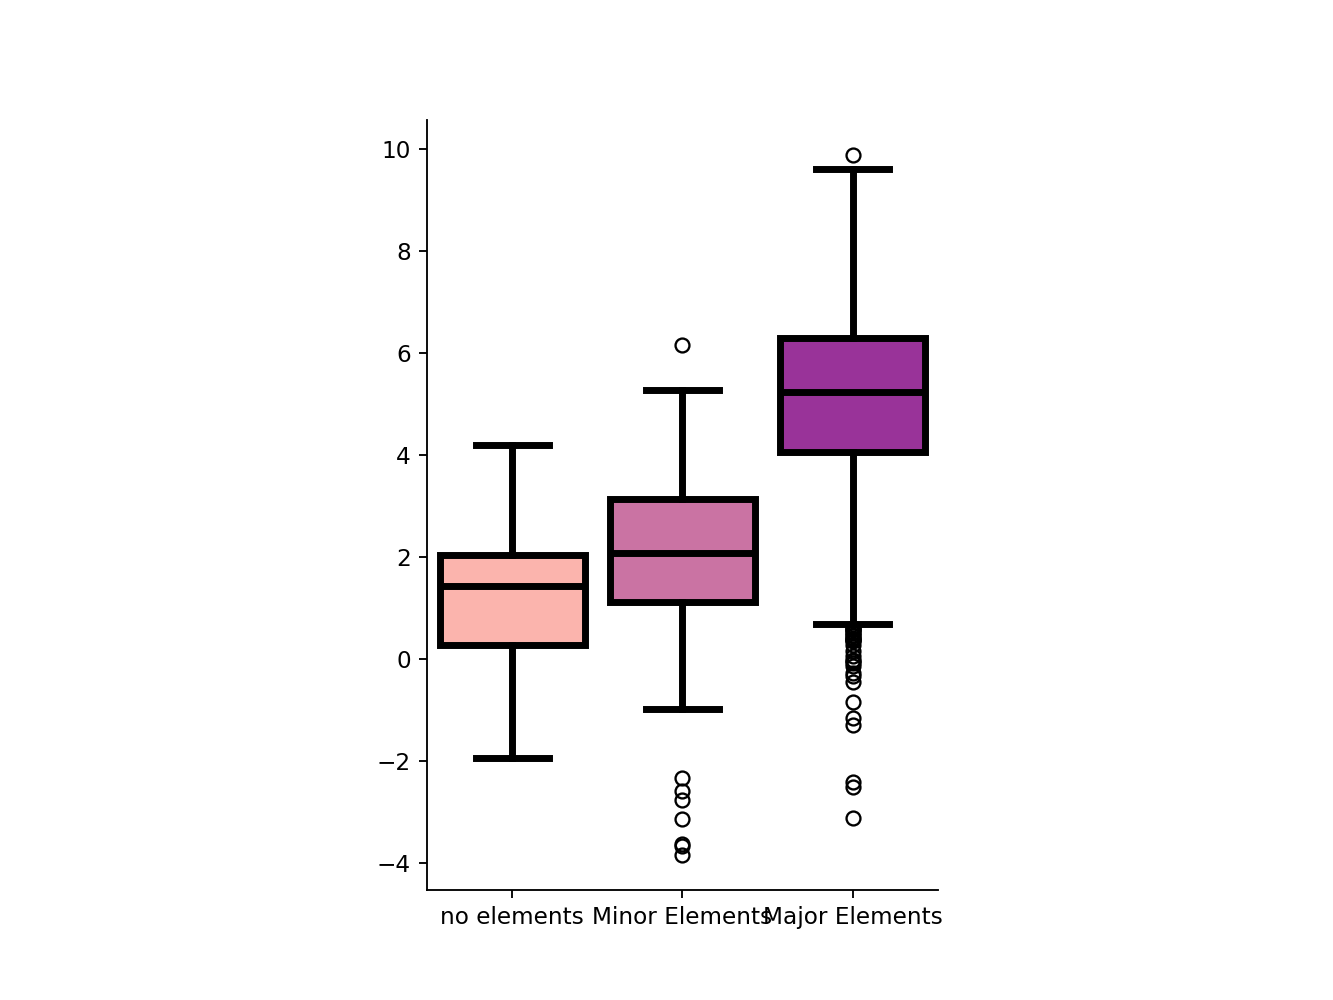

In [222]:
#FIGURE IS MADE USING 500 BP Model
x = list(feat_dict.keys())
y1 = list(feat_dict.values())

plt.close()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
box1 = axs.boxplot(y1,
            positions = [1, 2, 3],
            boxprops=dict(color='black', linewidth=3),
            whiskerprops=dict(color='black', linewidth=3),
            capprops=dict(color='black', linewidth=3),
            medianprops={'color': 'black', 'linewidth':3},
            showfliers=True,
            widths=0.85,
            label = 'Aim 1',
            patch_artist=True)

p = [(0.984, 0.705, 0.68), (0.792, 0.4525, 0.64), (0.6, 0.2, 0.6)]
for i in range(len(box1['boxes'])):
    patch = box1['boxes'][i]
    patch.set_facecolor(p[i])

axs.set_xticks([1, 2, 3], labels=x)
#axs.set_ylim(0.5, 1)
#axs.set_xlim(0.6, 3.38)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.set_aspect(0.3)
#plt.legend()
#plt.legend(bbox_to_anchor = (0.6,1))
plt.show()

In [142]:
[len(i) for i in y1]

[63, 189, 2545]

In [180]:
windows = ['6p G', '5p C', '4p C', '3p P', '2p C', '1p C', '4d G']
feat_dict = {'no elements':[], 'One Major Element': [], 'RDNAUGG':[], 'RCNAUGG':[]}

for i in range(len(aug_df)):
    if (aug_df['3p P'].iloc[i] == 1) & (aug_df['4d G'].iloc[i] == 1) & (aug_df['4p C'].iloc[i] == 1):
        feat_dict['RCNAUGG'].append(aug_df['log2 odds'].iloc[i])
    else:
        if (aug_df['6p G'].iloc[i] == 1) & (aug_df['4d G'].iloc[i] == 1):
            feat_dict['RDNAUGG'].append(aug_df['log2 odds'].iloc[i])
        else:
            if (aug_df['6p G'].iloc[i] == 1) | (aug_df['4d G'].iloc[i] == 1):
                feat_dict['One Major Element'].append(aug_df['log2 odds'].iloc[i])
            else:
                feat_dict['no elements'].append(aug_df['log2 odds'].iloc[i])

<IPython.core.display.Javascript object>


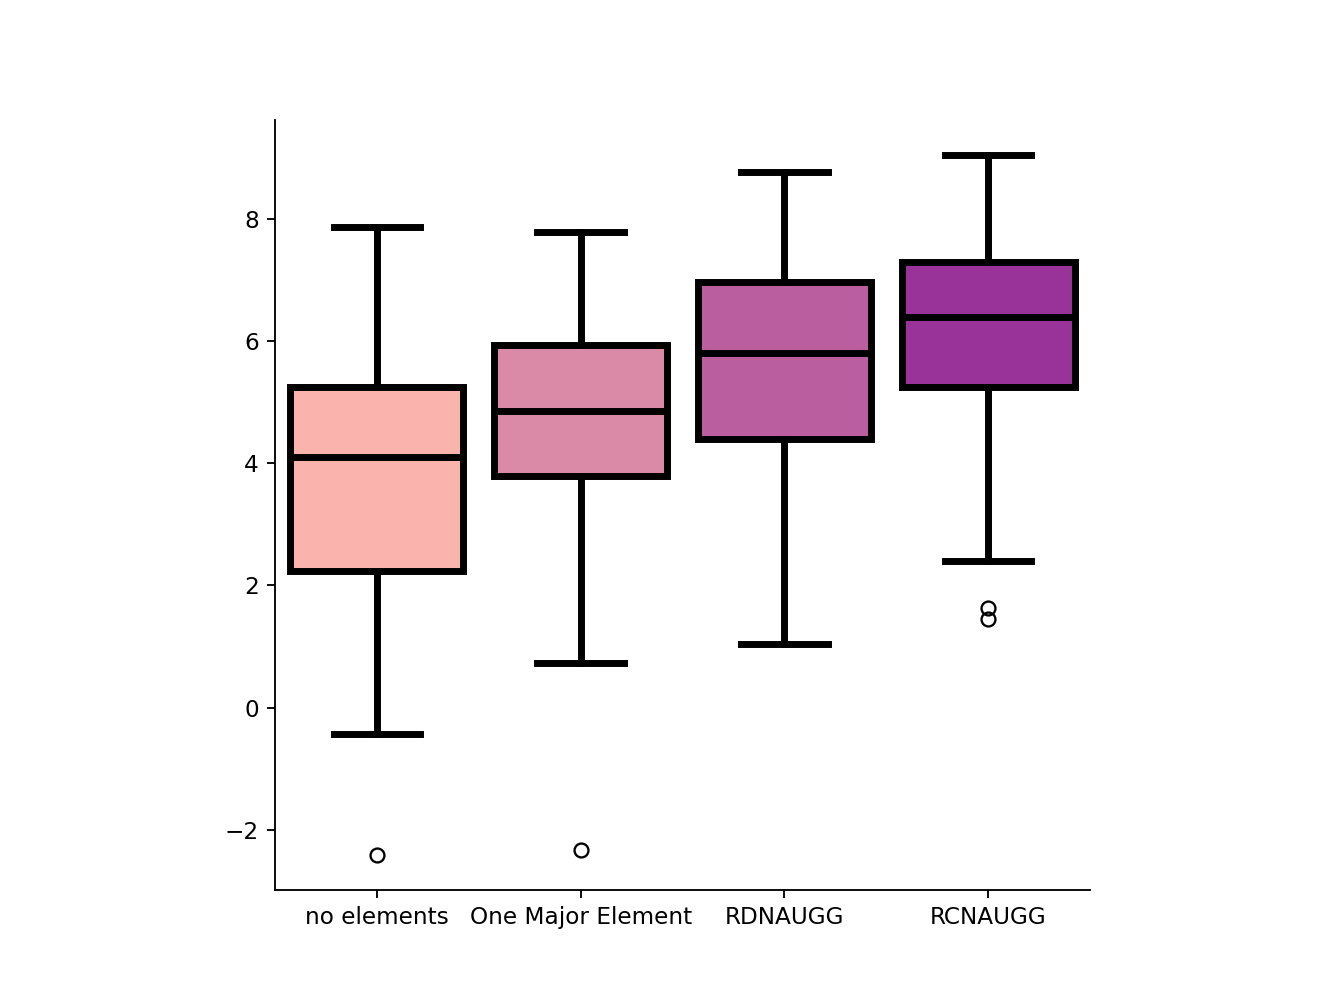

In [205]:
#FIGURE IS MADE USING 500 BP Model
x = list(feat_dict.keys())
y1 = list(feat_dict.values())
k = 100
y_final = [[], [], [], []]
for z in range(100):
    y2 = [random.sample(j, k) for j in y1]
    for i in range(len(y2)):
        y_final[i].append(np.median(y2[i]))

plt.close()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
box1 = axs.boxplot(y2,
            positions = [1, 2, 3, 4],
            boxprops=dict(color='black', linewidth=3),
            whiskerprops=dict(color='black', linewidth=3),
            capprops=dict(color='black', linewidth=3),
            medianprops={'color': 'black', 'linewidth':3},
            showfliers=True,
            widths=0.85,
            label = 'Aim 1',
            patch_artist=True)

p = [(0.984, 0.705, 0.68), (0.856, 0.5367, 0.6533), (0.728, 0.3683, 0.6267), (0.6, 0.2, 0.6)]
for i in range(len(box1['boxes'])):
    patch = box1['boxes'][i]
    patch.set_facecolor(p[i])

axs.set_xticks([1, 2, 3, 4], labels=x)
#axs.set_ylim(0.5, 1)
#axs.set_xlim(0.6, 3.38)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.set_aspect(0.3)
#plt.legend()
#plt.legend(bbox_to_anchor = (0.6,1))
plt.show()

In [182]:
[len(i) for i in y2]

[380, 380, 380, 380]

In [227]:
windows = ['6p G', '5p C', '4p C', '3p P', '2p C', '1p C', '4d G']
feat_dict = {'no elements':[], 'One Major Element': [], 'RDNAUGG':[], 'RCNAUGG':[]}

for i in range(len(aug_df)):
    if (aug_df['3p P'].iloc[i] == 1) & (aug_df['4d G'].iloc[i] == 1) & (aug_df['4p C'].iloc[i] == 1):
        feat_dict['RCNAUGG'].append(aug_df['Label'].iloc[i])
    else:
        if (aug_df['6p G'].iloc[i] == 1) & (aug_df['4d G'].iloc[i] == 1):
            feat_dict['RDNAUGG'].append(aug_df['Label'].iloc[i])
        else:
            if (aug_df['6p G'].iloc[i] == 1) | (aug_df['4d G'].iloc[i] == 1):
                feat_dict['One Major Element'].append(aug_df['Label'].iloc[i])
            else:
                feat_dict['no elements'].append(aug_df['Label'].iloc[i])

<IPython.core.display.Javascript object>


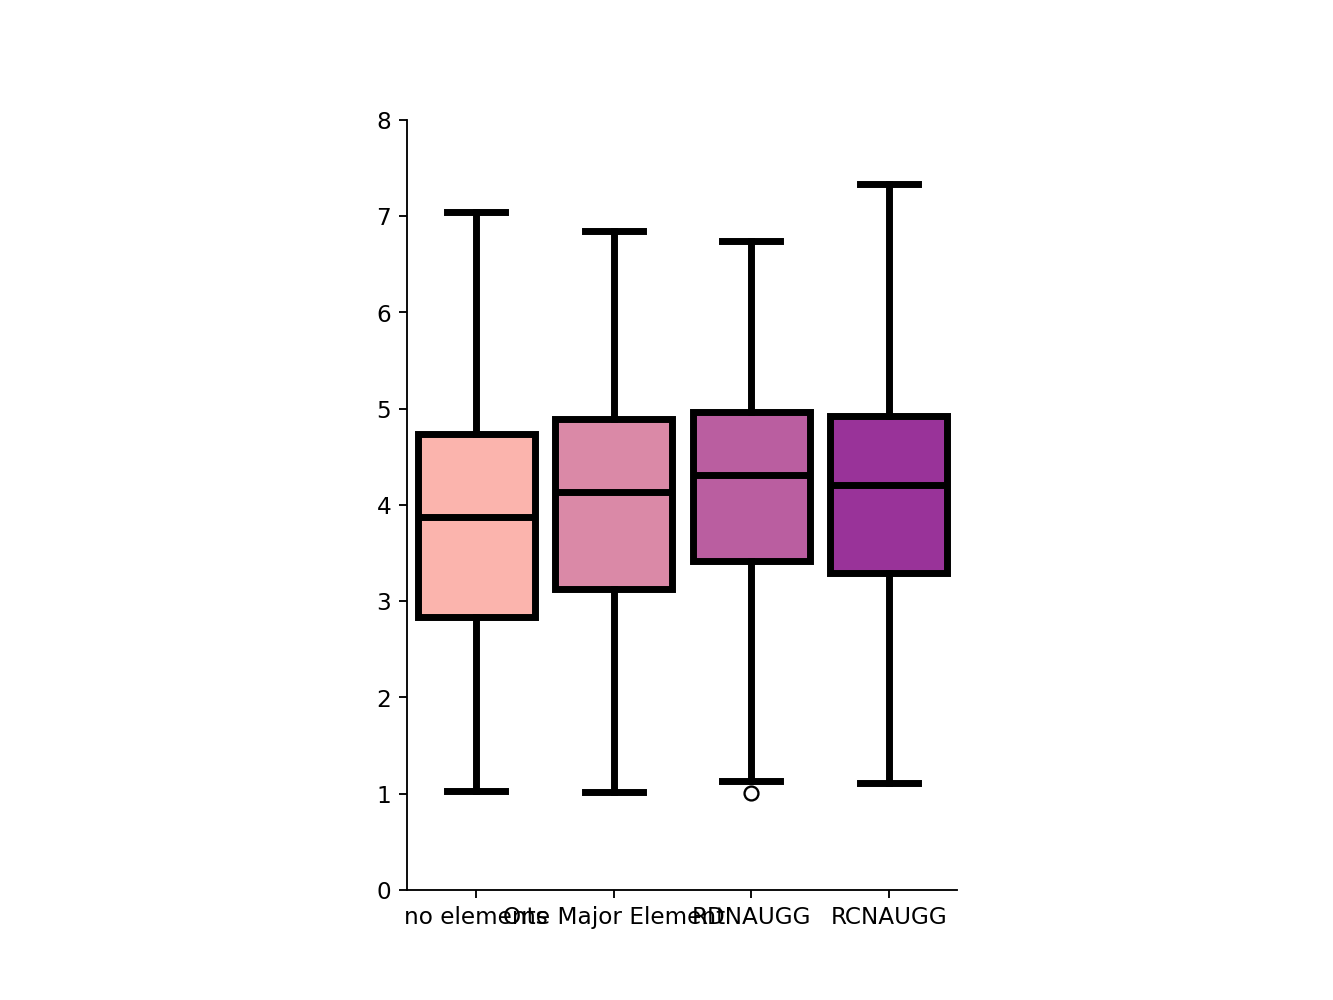

In [228]:
#FIGURE IS MADE USING 500 BP Model
x = list(feat_dict.keys())
y1 = list(feat_dict.values())

plt.close()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
box1 = axs.boxplot(y1,
            positions = [1, 2, 3, 4],
            boxprops=dict(color='black', linewidth=3),
            whiskerprops=dict(color='black', linewidth=3),
            capprops=dict(color='black', linewidth=3),
            medianprops={'color': 'black', 'linewidth':3},
            showfliers=True,
            widths=0.85,
            label = 'Aim 1',
            patch_artist=True)

p = [(0.984, 0.705, 0.68), (0.856, 0.5367, 0.6533), (0.728, 0.3683, 0.6267), (0.6, 0.2, 0.6)]
for i in range(len(box1['boxes'])):
    patch = box1['boxes'][i]
    patch.set_facecolor(p[i])

axs.set_xticks([1, 2, 3, 4], labels=x)
axs.set_ylim(0, 8)
#axs.set_xlim(0.6, 3.38)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.set_aspect(0.7)
#plt.legend()
#plt.legend(bbox_to_anchor = (0.6,1))
plt.show()

In [229]:
[len(i) for i in y1]

[803, 1106, 380, 508]

In [230]:
for i in range(len(x)):
    print('kw test for '+x[i])
    for j in range(len(x)):
        print(stats.kruskal(y1[i], y1[j]))

kw test for no elements
KruskalResult(statistic=0.0, pvalue=1.0)
KruskalResult(statistic=12.935532840140485, pvalue=0.00032240345399988995)
KruskalResult(statistic=23.95832370392104, pvalue=9.844375567437342e-07)
KruskalResult(statistic=17.27629744123591, pvalue=3.2319330571788754e-05)
kw test for One Major Element
KruskalResult(statistic=12.935532840140485, pvalue=0.00032240345399988995)
KruskalResult(statistic=0.0, pvalue=1.0)
KruskalResult(statistic=5.047421525661849, pvalue=0.024662613241792634)
KruskalResult(statistic=1.6492784087510313, pvalue=0.19905717197259445)
kw test for RDNAUGG
KruskalResult(statistic=23.95832370392104, pvalue=9.844375567437342e-07)
KruskalResult(statistic=5.047421525661849, pvalue=0.024662613241792634)
KruskalResult(statistic=0.0, pvalue=1.0)
KruskalResult(statistic=0.9552132622440008, pvalue=0.3283958467483934)
kw test for RCNAUGG
KruskalResult(statistic=17.27629744123591, pvalue=3.2319330571788754e-05)
KruskalResult(statistic=1.6492784087510313, pvalue=0

In [189]:
len(y1)

4

# Get predictions for unique genes with GTI-seq reads

In [3]:
dense_genes = pd.read_pickle('/projects/b1080/jc/rna_translation_initiation_dl_model/refseq_coding_genes_most_chx_cds.pkl')   

In [4]:
dense_genes

Transcript Chrom Strand     Start       End  CDS start   CDS End  \
75         NM_152486.4  chr1      +    925730    944574     925941    944153   
76         NM_015658.4  chr1      -    944202    959256     944693    959240   
80      XM_047419226.1  chr1      +    961267    964441     961341    964352   
83      XM_017002479.2  chr1      +    966481    972380     966531    972144   
100     XM_047426320.1  chr1      -    998963   1000097     999360    999973   
...                ...   ...    ...       ...       ...        ...       ...   
178718  XM_047442771.1  chrY      +  12709455  12860839   12720726  12859416   
178719  NM_001122665.3  chrY      +  12903998  12920478   12904936  12918122   
178846  XM_047442756.1  chrY      -  13297508  13480670   13297835  13479665   
178950  NM_001146705.2  chrY      -  19703864  19744726   19705994  19744534   
178967  NM_001278612.2  chrY      +  20575775  20593154   20575871  20592346   

        n_exons                                        exon_starts  \
75           14  925730,925921,930154,931038,935771,939039,9392...   
76           19  944202,945056,945517,946172,946401,948130,9484...   
80           10  961267,961628,961825,962285,962703,963108,9633...   
83            9  966481,966703,970276,970520,970685,971076,9713...   
100           4                       998963,999532,999691,999865,   
...         ...                                                ...   
178718       45  12709455,12714638,12720588,12722107,12725112,1...   
178719       18  12903998,12904934,12907536,12909359,12911838,1...   
178846       25  13297508,13302876,13305398,13306037,13306185,1...   
178950       28  19703864,19706440,19706793,19707146,19707933,1...   
178967        6  20575775,20579607,20582589,20588023,20589483,2...   

                                                exon_ends  \
75      925800,926013,930336,931089,935896,939129,9394...   
76      944800,945146,945653,946286,946545,948232,9486...   
80      961552,961750,962047,962471,962917,963253,9635...   
83      966614,966803,970423,970601,971006,971219,9714...   
100                         999432,999613,999787,1000097,   
...                                                   ...   
178718  12709543,12714789,12720737,12722187,12725225,1...   
178719  12904414,12904981,12907594,12909407,12911968,1...   
178846  13297848,13302991,13305547,13306112,13306250,1...   
178950  19706345,19706640,19706863,19707746,19708071,1...   
178967  20575887,20579691,20582693,20588105,20589575,2...   

                                             e_start_list  \
75      [925730, 925921, 930154, 931038, 935771, 93903...   
76      [944202, 945056, 945517, 946172, 946401, 94813...   
80      [961267, 961628, 961825, 962285, 962703, 96310...   
83      [966481, 966703, 970276, 970520, 970685, 97107...   
100                      [998963, 999532, 999691, 999865]   
...                                                   ...   
178718  [12709455, 12714638, 12720588, 12722107, 12725...   
178719  [12903998, 12904934, 12907536, 12909359, 12911...   
178846  [13297508, 13302876, 13305398, 13306037, 13306...   
178950  [19703864, 19706440, 19706793, 19707146, 19707...   
178967  [20575775, 20579607, 20582589, 20588023, 20589...   

                                               e_end_list  \
75      [925800, 926013, 930336, 931089, 935896, 93912...   
76      [944800, 945146, 945653, 946286, 946545, 94823...   
80      [961552, 961750, 962047, 962471, 962917, 96325...   
83      [966614, 966803, 970423, 970601, 971006, 97121...   
100                     [999432, 999613, 999787, 1000097]   
...                                                   ...   
178718  [12709543, 12714789, 12720737, 12722187, 12725...   
178719  [12904414, 12904981, 12907594, 12909407, 12911...   
178846  [13297848, 13302991, 13305547, 13306112, 13306...   
178950  [19706345, 19706640, 19706863, 19707746, 19708...   
178967  [20575887, 20579691, 20582693, 20588105, 20589...   

           

In [5]:
window_list = []
for i in range(len(dense_genes)):
    gene = dense_genes.iloc[i]
    if gene['Strand'] == '+':
        seq = gene['SeqX']
    elif gene['Strand'] == '-':
        seq = gene['SeqX'][::-1]
    window_seq = 'N'*50 + seq + 'N'*53
    window_list.append(window_seq)
dense_genes['Windowed Seq'] = window_list

def encode(seq):
    nt_dict = {'A':[1, 0, 0, 0], 'T':[0, 1, 0, 0], 'G':[0, 0, 1, 0], 'C':[0, 0, 0, 1], 'N':[0, 0, 0, 0]}
    encode = [nt_dict[i] for i in seq]
    return encode
dense_genes['Windowed Encoding'] = dense_genes['Windowed Seq'].apply(lambda x: encode(x))
dense_genes = dense_genes[~dense_genes['Transcript'].apply(lambda x: 'unassigned' in x)].copy()

In [6]:
dense_genes

Transcript Chrom Strand     Start       End  CDS start   CDS End  \
75         NM_152486.4  chr1      +    925730    944574     925941    944153   
76         NM_015658.4  chr1      -    944202    959256     944693    959240   
80      XM_047419226.1  chr1      +    961267    964441     961341    964352   
83      XM_017002479.2  chr1      +    966481    972380     966531    972144   
100     XM_047426320.1  chr1      -    998963   1000097     999360    999973   
...                ...   ...    ...       ...       ...        ...       ...   
178718  XM_047442771.1  chrY      +  12709455  12860839   12720726  12859416   
178719  NM_001122665.3  chrY      +  12903998  12920478   12904936  12918122   
178846  XM_047442756.1  chrY      -  13297508  13480670   13297835  13479665   
178950  NM_001146705.2  chrY      -  19703864  19744726   19705994  19744534   
178967  NM_001278612.2  chrY      +  20575775  20593154   20575871  20592346   

        n_exons                                        exon_starts  \
75           14  925730,925921,930154,931038,935771,939039,9392...   
76           19  944202,945056,945517,946172,946401,948130,9484...   
80           10  961267,961628,961825,962285,962703,963108,9633...   
83            9  966481,966703,970276,970520,970685,971076,9713...   
100           4                       998963,999532,999691,999865,   
...         ...                                                ...   
178718       45  12709455,12714638,12720588,12722107,12725112,1...   
178719       18  12903998,12904934,12907536,12909359,12911838,1...   
178846       25  13297508,13302876,13305398,13306037,13306185,1...   
178950       28  19703864,19706440,19706793,19707146,19707933,1...   
178967        6  20575775,20579607,20582589,20588023,20589483,2...   

                                                exon_ends  \
75      925800,926013,930336,931089,935896,939129,9394...   
76      944800,945146,945653,946286,946545,948232,9486...   
80      961552,961750,962047,962471,962917,963253,9635...   
83      966614,966803,970423,970601,971006,971219,9714...   
100                         999432,999613,999787,1000097,   
...                                                   ...   
178718  12709543,12714789,12720737,12722187,12725225,1...   
178719  12904414,12904981,12907594,12909407,12911968,1...   
178846  13297848,13302991,13305547,13306112,13306250,1...   
178950  19706345,19706640,19706863,19707746,19708071,1...   
178967  20575887,20579691,20582693,20588105,20589575,2...   

                                             e_start_list  \
75      [925730, 925921, 930154, 931038, 935771, 93903...   
76      [944202, 945056, 945517, 946172, 946401, 94813...   
80      [961267, 961628, 961825, 962285, 962703, 96310...   
83      [966481, 966703, 970276, 970520, 970685, 97107...   
100                      [998963, 999532, 999691, 999865]   
...                                                   ...   
178718  [12709455, 12714638, 12720588, 12722107, 12725...   
178719  [12903998, 12904934, 12907536, 12909359, 12911...   
178846  [13297508, 13302876, 13305398, 13306037, 13306...   
178950  [19703864, 19706440, 19706793, 19707146, 19707...   
178967  [20575775, 20579607, 20582589, 20588023, 20589...   

                                               e_end_list  \
75      [925800, 926013, 930336, 931089, 935896, 93912...   
76      [944800, 945146, 945653, 946286, 946545, 94823...   
80      [961552, 961750, 962047, 962471, 962917, 96325...   
83      [966614, 966803, 970423, 970601, 971006, 97121...   
100                     [999432, 999613, 999787, 1000097]   
...                                                   ...   
178718  [12709543, 12714789, 12720737, 12722187, 12725...   
178719  [12904414, 12904981, 12907594, 12909407, 12911...   
178846  [13297848, 13302991, 13305547, 13306112, 13306...   
178950  [19706345, 19706640, 19706863, 19707746, 19708...   
178967  [20575887, 20579691, 20582693, 20588105, 20589...   

           

In [9]:
dense_txt = pd.DataFrame({'Transcript': dense_genes['Transcript'].tolist(), 'Encoding': dense_genes['Windowed Encoding'].tolist()})

In [10]:
dense_txt

Transcript                                           Encoding
0         NM_152486.4  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...
1         NM_015658.4  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...
2      XM_047419226.1  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...
3      XM_017002479.2  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...
4      XM_047426320.1  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...
...               ...                                                ...
13203  XM_047442771.1  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...
13204  NM_001122665.3  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...
13205  XM_047442756.1  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...
13206  NM_001146705.2  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...
13207  NM_001278612.2  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...

[13208 rows x 2 columns]

In [11]:
dense_txt.to_csv('/projects/b1080/jc/rna_translation_initiation_dl_model/optimized_aim_1_model_1_27/dense_genes_encoded.txt', sep='\t', index=False)

In [12]:
pickle.dump(dense_txt, open('/projects/b1080/jc/rna_translation_initiation_dl_model/optimized_aim_1_model_1_27/dense_genes_encoded.pkl', 'wb'))

In [13]:
np.mean([0.999, 0.987, 0.7, 0.5])

0.7965

# Well Expressed Gene Analyses

In [31]:
dataset = pd.concat([train_df, val_df, test_df], axis=0)

In [80]:
len(dataset['Gene Name'].unique())

2326

In [33]:
pickle.dump(dataset, open('/projects/b1080/jc/rna_translation_initiation_dl_model/sample_train_val_test_combined_df.pkl', 'wb'))